# Краткий  tutorial по библиотеке seaborn
---
### Учимся быстро строить красивые графики

---
Всем привет! Я очень люблю визуализацию. На мой взгляд библиотека `seaborn` - это отличное решение, которое поможет визуализировать ваши данные. <br>Выбор графиков очень обширный, плюс они красивые по сравнению со стандартной библиотекой `matplotlib`, а это немаловажно:) 
Я постарался собрать различные примеры, которые мы рассмотрим ниже. Отмечу, что это не исчерпывающее руководство, так как каждый график имеет тонкую настройку и кучу параметров, что требует время и "курение" мануалов) Поэтому мы остановимся на основном, чтобы вы могли быстро и удобно строить графики.
Я надеюсь, что материал будет вам полезен, а ваши данные будут отлично визуализированы:) 
<br>Ура визуализации!

<div style= "background-color: #fc8381;padding: 20px">Важно!!<br> Прежде чем мы приступим, я хочу обратить внимание, что рассматривается версия библиотеки 0.9.0. В более поздних версиях изменен немного функционал и добавлены новые типы графиков. По ходу работы я буду по возможности комментировать изменения)
Кстати релиз библиотеки `seaborn` версии 0.11.0 состоялся только в сентябре 2020 г. В конце мы рассмотрим, что нового в последней версии библиотеки, какие появились графики и какие изменения коснулись существующих
</div>


---
### Содержание
1. [Коротко о библиотеке seaborn](#a)
2. [Выбираем палитру и цвета](#b)
3. [Работаем со стилями графиков](#c)
4. [Первый график.Гистограммы](#d)
5. [Boxplot и violinplot](#e)
6. [Линейные графики](#f)
7. [Barplot и countplot](#g)
8. [Диаграммы рассеяния](#h)
9. [Stripplot и swarmplot](#i)
10. [Сложные и множественные графики (pairplots,jointplots)](#j)
11. [Тепловые карты](#k)
12. [JointGrid и PairGrid](#l)
13. [FacetGrid](#m)
14. [Catplot](#n)
15. [Что нового в seaborn 0.11.0](#o)
16. [Заключение](#p)

### <a name='a'>Коротко о библиотеке seaborn</a>

Библиотека `matplotlib` очень мощная библиотека и при должных навыках можно строить действительно интересные графики. Но в тоже время для того, чтобы построить действительно интересный график, нужно написать много кода. Лично у меня начинается психологическая травма, когда для того, чтобы построить график с определенными параметрами, мне надо глубоко вникать в документацию `matplotlib` и тратить на это много времени. Мне надо построить быстро и сейчас) 
А еще мне хочется красивый график, но тратить как можно меньше времени на работу со стилями)
Для решения этих проблем есть прекрасная библиотека `seaborn`, которая базируется на библиотеке `matplotlib`. По сути, это интерфейс к библиотеке `matplotlib`, с помощью которого "из коробки" можно быстро строить сложные, интересные и красивые графики.


#### Полезные ссылки:
- [Официальный сайт с документацией и примерами](https://seaborn.pydata.org)
- [Введение в визуализацию данных с Seaborn](https://nagornyy.me/courses/data-science/intro-to-seaborn/)

Для анализа мы будем использовать датасет содержащий информацию о фильмах выходящих на стриминговых платформах, таких как Netflix,Disney+ и т.д. Датасет взят с площадки kaggle. Датасет, который здесь используется был предварительно очищен и модифицирован. Оригинальный датасет приведен по ссылке ниже.
<br>[Ссылка на оригинальный датасет](https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney)

Какие данные у нас есть:
- `id` - идентификатор фильома
- `title` - название фильма
- `year` - год выпуска
- `imdb` - рейтинг imdb
- `type` - тип фильма
- `directors` - режиссеры
- `genres` - жанры
- `country` - страна происхождения
- `language` - язык фильма
- `runtime` - длительность фильма в минутах
- `age+` - возрастной рейтинг
- `first genre` - первый жанр фильм

<img src='https://s27389.pcdn.co/wp-content/uploads/2019/08/AdobeStock_242255572.jpeg'>

Ну что, погнали:)

In [1]:
# Подключаем библиотеки и загружаем датасет
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats as st
from IPython import display
import warnings
warnings.filterwarnings('ignore')

data_movies = pd.read_csv('Movies.csv',index_col=0)

In [2]:
print(np.__version__)
print(sns.__version__)
print(pd.__version__)

1.19.2
0.9.0
1.1.3


In [3]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16743
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        16001 non-null  int64  
 1   id           16001 non-null  int64  
 2   title        16001 non-null  object 
 3   year         16001 non-null  int64  
 4   imdb         16001 non-null  float64
 5   type         16001 non-null  object 
 6   directors    15657 non-null  object 
 7   genres       16001 non-null  object 
 8   country      16001 non-null  object 
 9   language     15827 non-null  object 
 10  runtime      16001 non-null  float64
 11  age+         7219 non-null   float64
 12  first genre  16001 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.7+ MB


In [4]:
data_movies.head()

index  id                           title  year  imdb   type  \
0      0   1                       Inception  2010   8.8  Movie   
1      1   2                      The Matrix  1999   8.7  Movie   
2      2   3          Avengers: Infinity War  2018   8.5  Movie   
3      3   4              Back to the Future  1985   8.5  Movie   
4      4   5  The Good, the Bad and the Ugly  1966   8.8  Movie   

                        directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                          genres        country  \
0  ['Action', 'Adventure', 'Sci-Fi', 'Thriller']  United States   
1                           ['Action', 'Sci-Fi']  United States   
2              ['Action', 'Adventure', 'Sci-Fi']  United States   
3              ['Adventure', 'Comedy', 'Sci-Fi']  United States   
4                                    ['Western']          Italy   

                  language  runtime  age+ first genre  
0  English,Japanese,French    148.0  13.0      Action  
1                  English    136.0  18.0      Action  
2                  English    149.0  13.0      Action  
3                  English    116.0   7.0   Adventure  
4                  Italian    161.0  18.0     Western

<div style= "background-color: #fc8381;padding: 20px">Важно!! В процессе работы над графиками, мы будем иногда менять наш датасет, например делать срезы, группировать или строить сводные таблицы. Будьте внимательны) </div>

### <a name='b'>Выбираем палитру и цвета</a>

В первую очередь остановимся на выборе цветов наших графиков. Это немаловажно, так как правильно подобранные цвета улучшают восприятие ваших исследований. Не буду касаться вопросов как правильно подбирать цвета, какие цвета сочетаются и т.д. Остановимся просто на инструментарии `seaborn` по выбору палитр цветов 

Будем работать над простым графиком. Который приведен ниже. Пока не будем даваться в детали, но стоит пояснить, что я построил простой линейный график, где в параметрах ему передал два списка значений для обеих осей.

<AxesSubplot:>

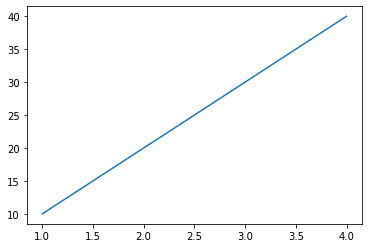

In [5]:
sns.lineplot([1,2,3,4],[10,20,30,40])

У Seaborn есть шесть вариантов цветовой палитры по умолчанию: `deep`, `muted`,`pastel`, `bright`, `dark` и `colorblind`. 

<img src='https://seaborn.pydata.org/_images/color_palettes_22_0.png'>

Для просмотра цветов палитры используется функцию `color_palette()` Он возвращает коды цветов

In [6]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Как видим, в скобках метода, указано название палитры. Чтобы просмотреть коды цветов в более удобном и привычном шестнадцатиричном формате, сделаем так:

In [7]:
sns.color_palette("dark").as_hex()

['#001c7f',
 '#b1400d',
 '#12711c',
 '#8c0800',
 '#591e71',
 '#592f0d',
 '#a23582',
 '#3c3c3c',
 '#b8850a',
 '#006374']

Кстати в новой версии библиотеки, вам сразу покажется цвета без кодов, при вызове функций, которые мы вызывали вверху)

Конечно же хотелось бы помимо кодов цветов увидеть, как выглядят эти цвета. Для этого в `seaborn` есть метод `palplot()`. Посмотрим, что у нас получится

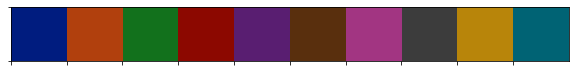

In [8]:
sns.palplot(sns.color_palette("dark"))

Естественно нам не хватает 6 стандартных палитр, поэтому у `seaborn` богатый выбор среди других палитр и хороший инструментарий по созданию собственных палитр. Рассмотрим пример с другой не стандартной палитрой:

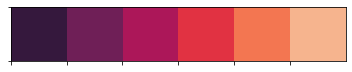

In [9]:
sns.palplot(sns.color_palette("rocket"))

Если вы хотите раскрасить график в более чем 6 стандартных цветов, можно в функции `color_palette()` указать параметр `n_colors`, отвечающий за количество цветов

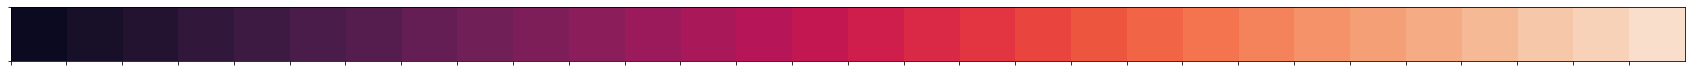

In [10]:
sns.palplot(sns.color_palette("rocket",n_colors=30))

Кстати, можно даже не указывать `n_colors` явно)

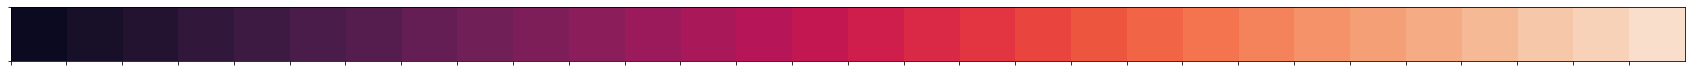

In [11]:
sns.palplot(sns.color_palette("rocket",30))

Ниже приведены основные палитры, которые используются в `seaborn`
Вообще палитры также делятся еще на несколько типов по способу представления в них цвета:
1. Diverging - происходит переход от одного цвета к другому
2. Sequential - оттенки доминирующего цвета в палитре
3. Qualitative - сеты из нескольких цветов
4. Сubehelix  - нестандартная система генерации оттенков цветов

<img src='https://content.codecademy.com/programs/dataviz-python/unit-5/seaborn-design-2/article2_image9.png'>

Но все это не предел! Во первых это не полный список, во вторых мы можем использовать свои собственные палитры:)

Ниже используя функцию `cubehelix_palette()` мы создали другую палитру своих цветов.

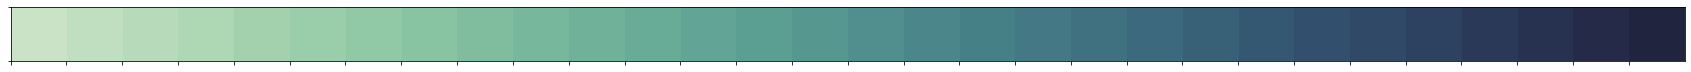

In [12]:
sns.palplot(sns.cubehelix_palette(start=.15, rot=-.5,n_colors=30))

Кстати используя параметр `reverse` мы можем использовать цвета в обратном порядке)

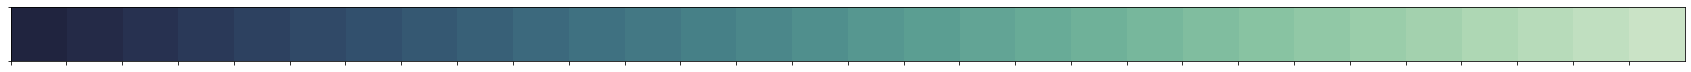

In [13]:
sns.palplot(sns.cubehelix_palette(start=.15, rot=-.5,n_colors=30,reverse=True))

Можем также взять и смешать опеределенные цвета. Для этого есть функция `blend_palette()` В параметрах функции можно явно передать названия смешиваемых цветов, а можно передать HEX-коды цветов)

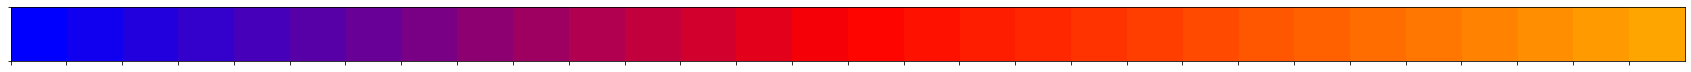

In [14]:
sns.palplot(sns.blend_palette(n_colors=30,colors=['blue','red','orange']))

Мы также можем менять яркость палитры, для этого есть функции `dark_palette()`, `light_palette()` и т.д.

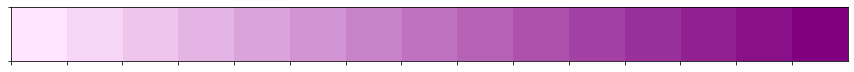

In [15]:
sns.palplot(sns.light_palette("purple",n_colors=15))

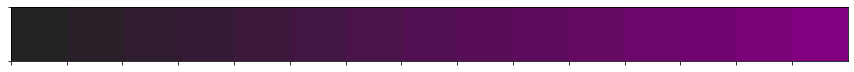

In [16]:
sns.palplot(sns.dark_palette("purple",n_colors=15))

Теперь, пришло время применить нашу палитру. Здесь можно пойти двумя путями: 
1. Каждый раз указывать в параметрах построения графика цветовую палитру
2. Применить единожды ее для всех графиков 


Для того, чтобы задать палитру для всех графиков, нужно использовать функцию `set_palette()`

In [17]:
sns.set_palette('inferno')

<AxesSubplot:>

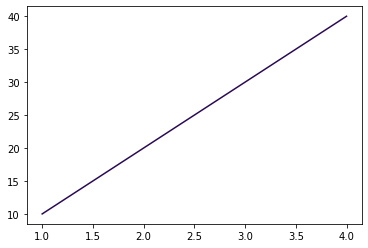

In [18]:
sns.lineplot([1,2,3,4],[10,20,30,40])

In [19]:
sns.set_palette('PRGn_r')

<AxesSubplot:>

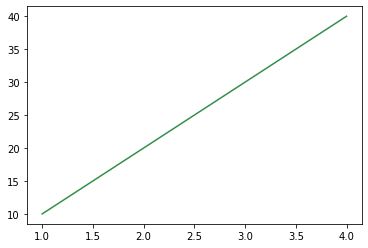

In [20]:
sns.lineplot([1,2,3,4],[10,20,30,40])

Сбросить палитру можно применив функцию  `reset_defaults()`

<AxesSubplot:>

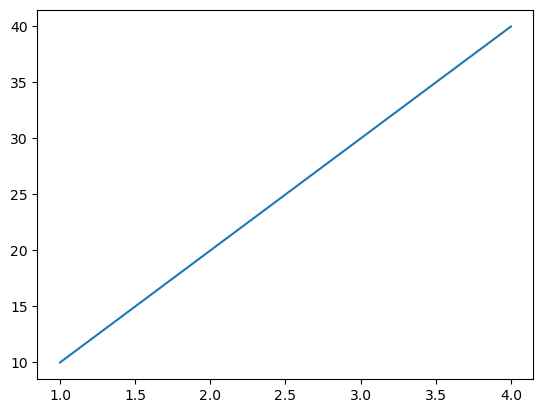

In [21]:
sns.reset_defaults()
sns.lineplot([1,2,3,4],[10,20,30,40])

Также цвет или палитру мы можем задать непосредственно при построении графика
Тут следует обратить внимание, если мы строим график не разбивая по какому либо категориальному признаку, то в параметре цвета необходимо указывать `color`. Если же мы бьем на категориальные признаки, то указываем `palette`

In [22]:
sns.set_palette('Blues')

<AxesSubplot:>

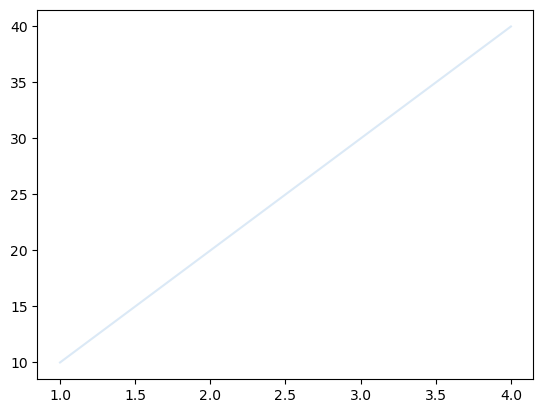

In [23]:
sns.lineplot([1,2,3,4],[10,20,30,40],palette='YlOrRd_r')

Как видим, цвет графика не меняется. Если же применить параметр `color`, то цвет поменяется

<AxesSubplot:>

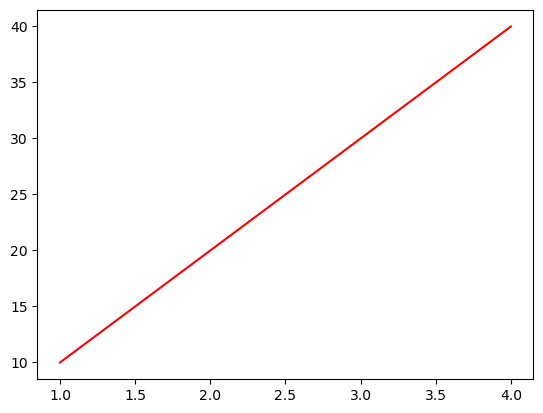

In [24]:
sns.lineplot([1,2,3,4],[10,20,30,40],color='red')

Можем указать явный цвет в HEX-формате, который можем выцепить из палитры)

<AxesSubplot:>

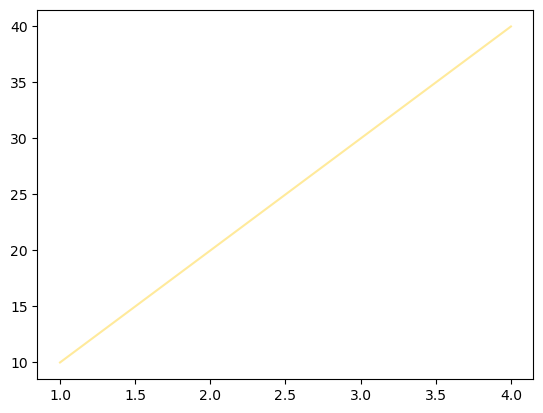

In [25]:
sns.lineplot([1,2,3,4],[10,20,30,40],color=sns.color_palette('YlOrRd_r').as_hex()[5])

Теперь если строить график сгруппированный по какому то категориальному признаку, мы можем наблюдать следующую картину:

In [26]:
sns.set_palette('GnBu_d',30)

<AxesSubplot:xlabel='first genre', ylabel='count'>

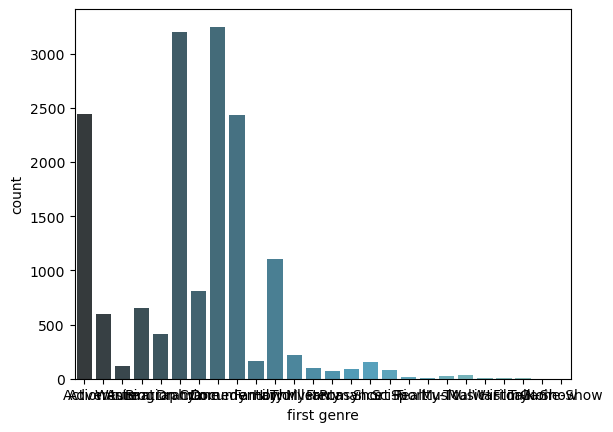

In [27]:
sns.countplot(data_movies['first genre'])

Как видим, наша палитра применилась по умолчанию к графику. Как уже упоминалось выше, мы можем насильно применить палитру к конкретному графику 

<div style= "background-color: #fc8381;padding: 20px">Подписи осей корявые) но чуть позже мы это исправим) </div>

<AxesSubplot:xlabel='first genre', ylabel='count'>

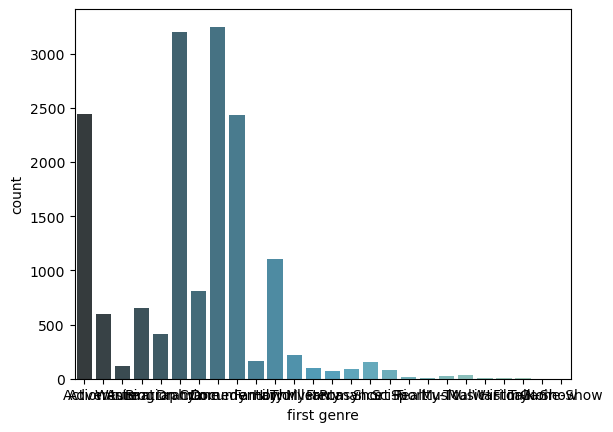

In [28]:
sns.countplot(data_movies['first genre'],palette='GnBu_d')

Хочется отметить такое не совсем однозначное явление, что если мы укажем в `set_palette` количество цветов, то возьмется количество цветов по умолчанию и если категорий будет больше, то построится график с дефолтной палитрой.  Пример приведен ниже. 

<AxesSubplot:xlabel='first genre', ylabel='count'>

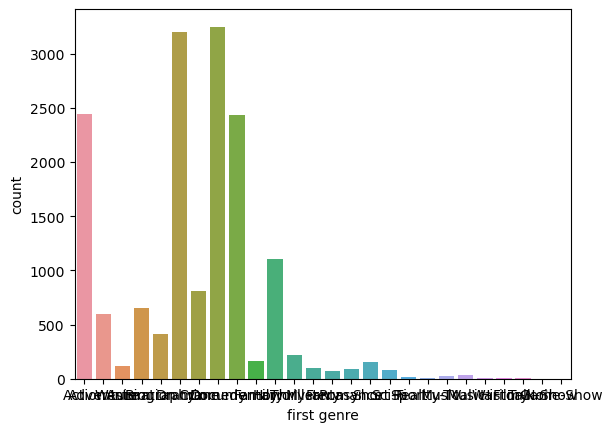

In [29]:
sns.set_palette('GnBu_d')
sns.countplot(data_movies['first genre'])

Чтобы избежать такого явления лучшего всего задавать палитру в параметрах при построении графика)

Я думаю, тему с цветами и палитрами стоит завершить. Мы, естественно, рассмотрели не все моменты, но для начала этого должно хватить. Остальные фишки можно почитать в документации) 

#### Полезные ссылки:
- [Официальная документация](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [Статья на medium, подробный гайд по палитрам seaborn,приведеных их цветовые схемы](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)
- [Цветовой круг для правильной подборки сочетаемости цветов](https://color.adobe.com/ru/create/color-wheel)
- [Еще один цветовой круг](https://colorscheme.ru/)
- [Статья на medium о подборе цветов](https://medium.com/%D1%86%D0%B2%D0%B5%D1%82/%D0%BF%D0%BE%D0%B4%D0%B1%D0%BE%D1%80-%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D1%8C%D0%BD%D1%8B%D1%85-%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D1%8B%D1%85-%D0%BF%D0%B0%D0%BB%D0%B8%D1%82%D1%80-%D0%B4%D0%BB%D1%8F-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-323735a4ceb2)
- [Подборка палитр](https://colorhunt.co/)

### <a name='c'> Работаем со стилями графиков</a>

`Seaborn` унаследовал все возможности оформления графиков от `matplotlib`. Плюс еще имеет свои фишки)
Чаще всего при построении графиков мне требуются следующие параметры:
- Заголовок
- Подписи осей
- Ориентация тиков
- Размер шрифта
- Размер графика
- Легенда
- Оформление осей и сетки


Начнем по порядку: добавим подписи осей и заголовок.

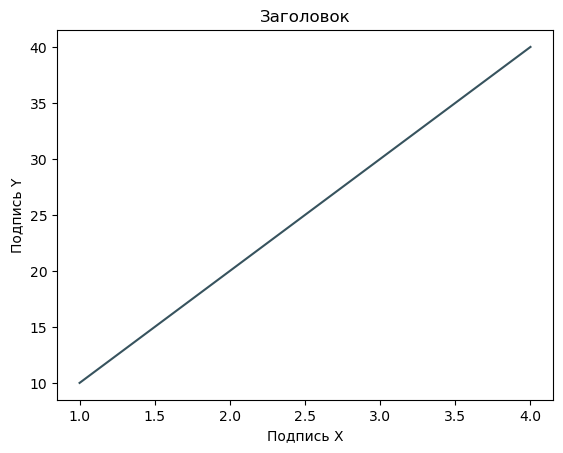

In [30]:
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Заголовок')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.show()

Как видите, я воспользовался функциями библиотеки `matplotlib` для вывода подписи и заголовка

Можно уменьшить размер графика вызвав стандартную функцию `matplotlib`


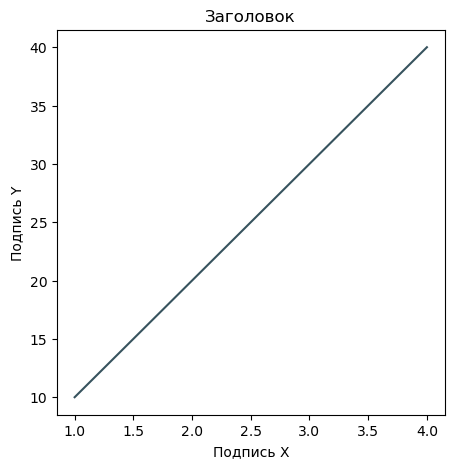

In [31]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Заголовок')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.show()

Можно изменить угол поворота тиков

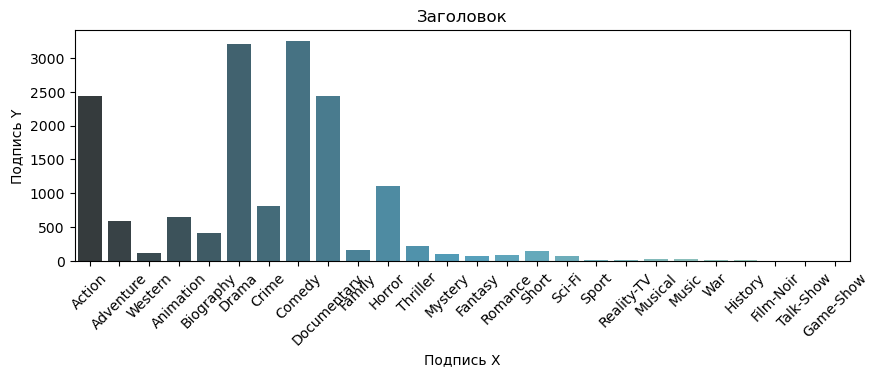

In [32]:
plt.figure(figsize=(10,3))
sns.countplot(data_movies['first genre'],palette='GnBu_d')
plt.title('Заголовок')
plt.xticks(rotation=45)
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.show()

Если вы строите график, который, например бьет ваши данные на категории, то легенда добавляется сама. Но зачастую названия в легенде нас могут не устроить. Поэтому мы можем сами изменить легенду добавим функцию `plt.legend`.

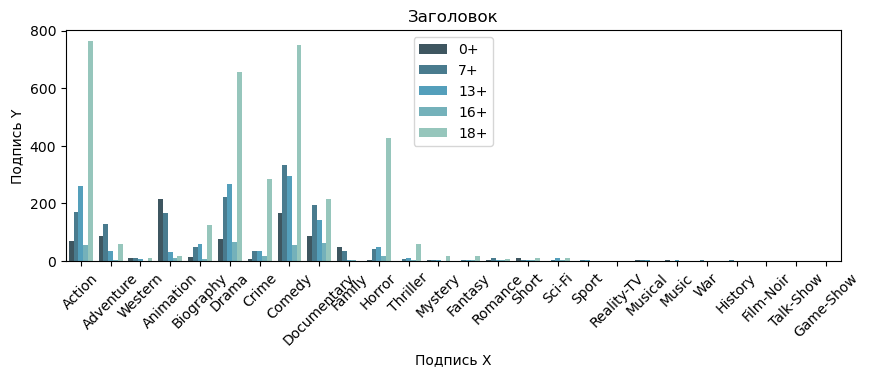

In [33]:
plt.figure(figsize=(10,3))
sns.countplot(data=data_movies,x='first genre',palette='GnBu_d',hue='age+')
plt.title('Заголовок')
plt.xticks(rotation=45)
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.legend(labels=['0+','7+','13+','16+','18+'])
plt.show()

Можно управлять размещением легенды. Для этого используется параметр `loc`

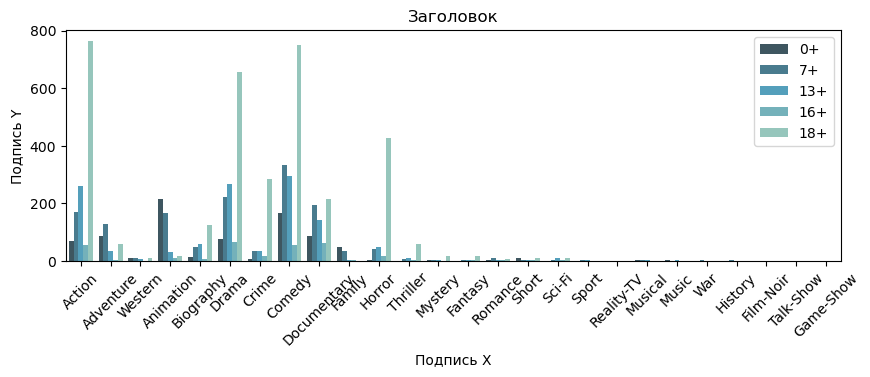

In [34]:
plt.figure(figsize=(10,3))
sns.countplot(data=data_movies,x='first genre',palette='GnBu_d',hue='age+')
plt.title('Заголовок')
plt.xticks(rotation=45)
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.legend(labels=['0+','7+','13+','16+','18+'],loc='upper right')
plt.show()

Также можно добавить заголовок легенде.

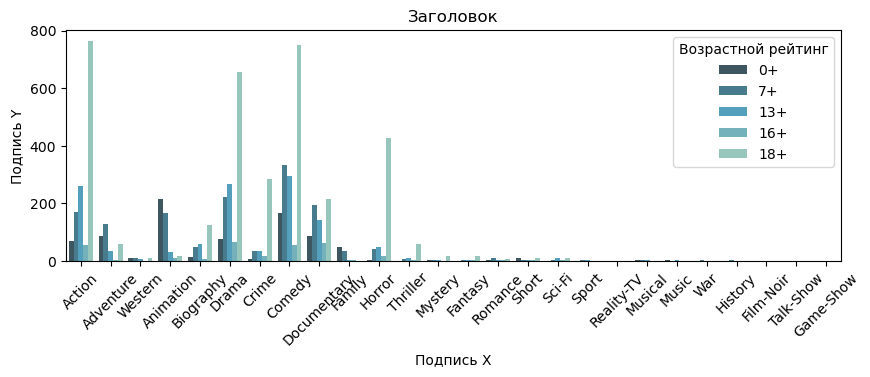

In [35]:
plt.figure(figsize=(10,3))
sns.countplot(data=data_movies,x='first genre',palette='GnBu_d',hue='age+')
plt.title('Заголовок')
plt.xticks(rotation=45)
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.legend(labels=['0+','7+','13+','16+','18+'],loc='upper right',title='Возрастной рейтинг')
plt.show()

Теперь перейдем к оформлению шрифтов. В принципе мы можем воспользоваться функционалом `matplotlib`. Ниже пример:

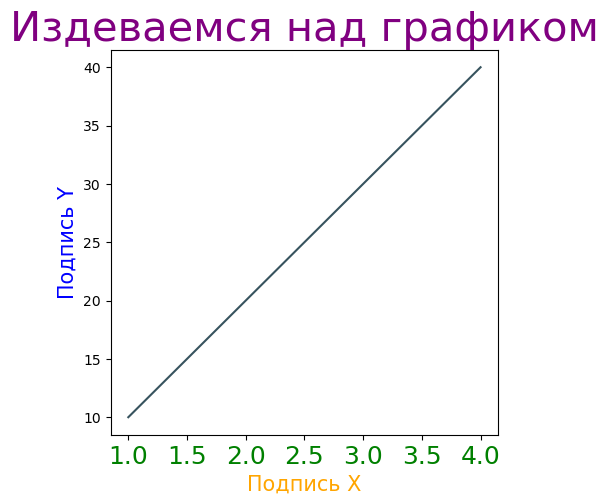

In [36]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Издеваемся над графиком',fontsize=30,color='purple')
plt.xlabel('Подпись X',fontsize=15,color='orange')
plt.ylabel('Подпись Y',fontsize=15,color='blue')
plt.xticks(fontsize=18,color='green')
plt.show()

Как видите, я добавил параметры `fontsize` и `color` для тиков, подписей и заголовков. Получился такой "вырвиглазный" график)

Однако ряд параметров шрифтов, размеров и т.д. можно задать через встроенную функцию `seaborn`, которая называется `set_style()`. Эта функция задаст параметры стиля для всех графиков. Посмотреть текущие параметры стиля можно вызвав функцию `axes_style()` 

In [37]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Как видите список настроек впечатляющий) Займемся дальше издевательством над стилем графика)

In [38]:
(sns.set_style({"axes.grid":True,
                "xtick.direction":'in',
                "xtick.color": 'red',
                "ytick.color":'yellow',
                'axes.edgecolor': '#1adbd5',
                'grid.color': '#db1acb',
                'grid.linestyle': '--',
                'axes.labelcolor': 'orange',
                "font.sans-serif":'Verdana'})
)

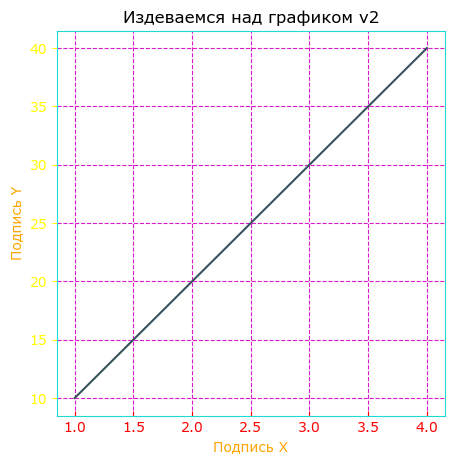

In [39]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Издеваемся над графиком v2')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.show()

Как видите часть параметров стиля мы определили сами. Если лениво подбирать параметры стиля самим, то в `seaborn` есть уже ряд готовых стилей. Их всего пять: `darkgrid`, `whitegrid`, `dark`, `white`, и `ticks`. Ниже пример:

In [40]:
sns.set_style('darkgrid')

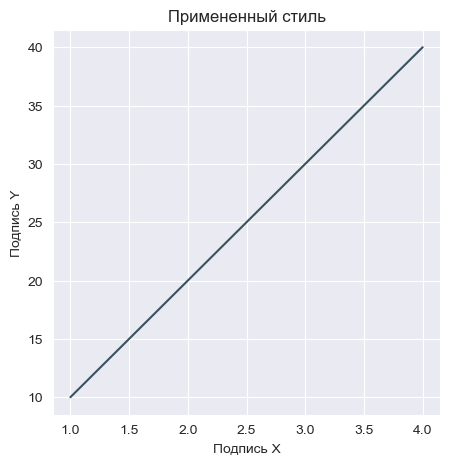

In [41]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Примененный стиль')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
plt.show()

Также мы можем оставить в графике только оси, для этого используется функция `despine()`

In [42]:
sns.set_style('white')

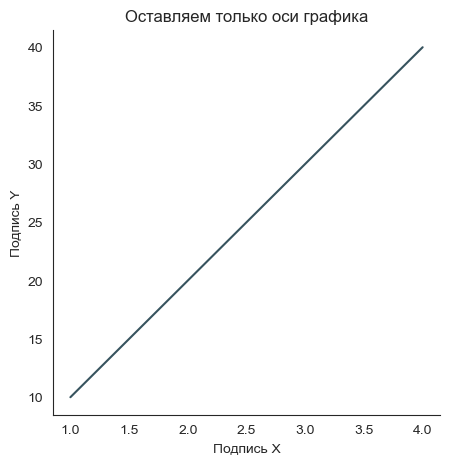

In [43]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Оставляем только оси графика')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
sns.despine()
plt.show()

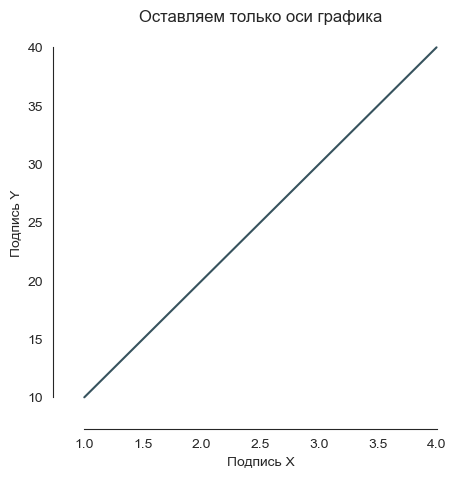

In [44]:
plt.figure(figsize=(5,5))
sns.lineplot([1,2,3,4],[10,20,30,40])
plt.title('Оставляем только оси графика')
plt.xlabel('Подпись X')
plt.ylabel('Подпись Y')
sns.despine(offset=10, trim=True)
plt.show()

На этом мы закончим со стилями и уже перейдем непосредственно к рассмотрению вопросов построения различных графиков

#### Полезные ссылки:
- [Официальная документация](https://seaborn.pydata.org/tutorial/aesthetics.html)
- [Официциальная документация](https://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)
- [Документация matplotlib](https://matplotlib.org/3.3.3/api/axes_api.html)
- [Документация matplotlib по тексту на графиках](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)


### <a name = 'd'>Первый график. Гистограммы</a>

Ну что пришло время строить графики) Начнем с гистограмм. Как известно гистограмма показывает распределение случайной величины с частотой ее наблюдения. За построение гистограмм отвечает функция `distplot()` Построим нашу первую гистограмму 

<div style= "background-color: #fc8381;padding: 20px"> Важно! В зависимости от версии `seaborn`построить графики на данных с пропусками либо можно либо нет) будьте внимательны) </div>

Так же проведем некоторые манипуляции по стилям и оформлению)

In [45]:
sns.reset_defaults()

In [46]:
sns.set_palette('GnBu_r')

In [47]:
pal = sns.color_palette('GnBu_r').as_hex()

Создадим вспомогательный датасет, которым будем пользоваться на протяжении всей работы. Датасет будет содержать фильмы, которые вышли в Испании и Италии

In [48]:
data_italy_spain = data_movies[(data_movies['country']=='Italy') | (data_movies['country']=='Spain')]

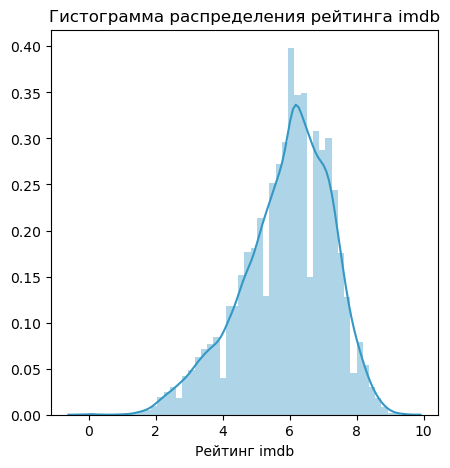

In [49]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'],color=pal[1])
plt.title('Гистограмма распределения рейтинга imdb')
plt.xlabel('Рейтинг imdb')
plt.show()

Как видим, по умолчанию график гистограммы также показывает плотность распределения вероятностей, отключить этот параметр можно указав `kde=False`

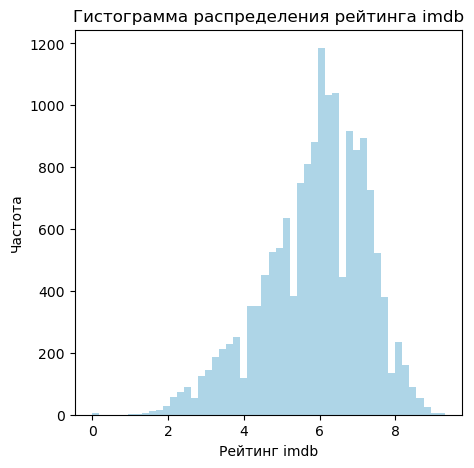

In [50]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'], kde=False,color=pal[1])
plt.title('Гистограмма распределения рейтинга imdb')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Частота')
plt.show()

Это еще не все) мы также можем указать количество корзин, используя знакомый параметр `bins`

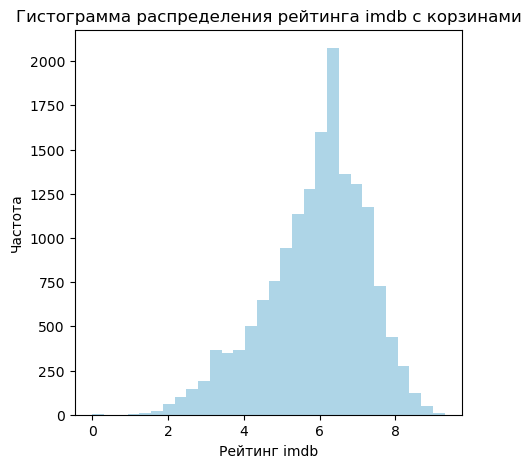

In [51]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'], kde=False, bins=30,color=pal[1])
plt.title('Гистограмма распределения рейтинга imdb c корзинами')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Частота')
plt.show()

При желании мы можем отключить гистограмму и оставить только плотность распределения вероятности

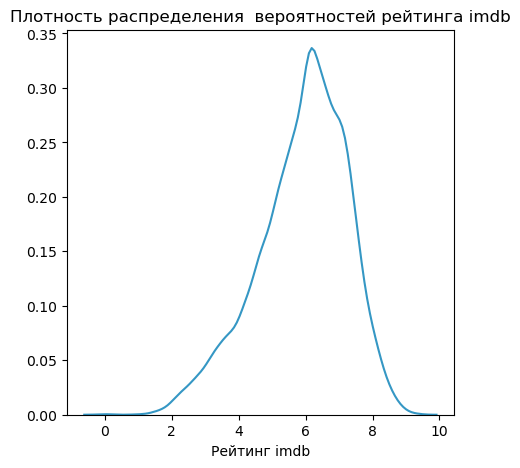

In [52]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'], hist=False, bins=30,color=pal[1])
plt.title('Плотность распределения  вероятностей рейтинга imdb')
plt.xlabel('Рейтинг imdb')
plt.show()

Можем строить совсем экзотичные графики, показывая на них плотность распределения в одномерной форме. За это отвечает параметр `rug`

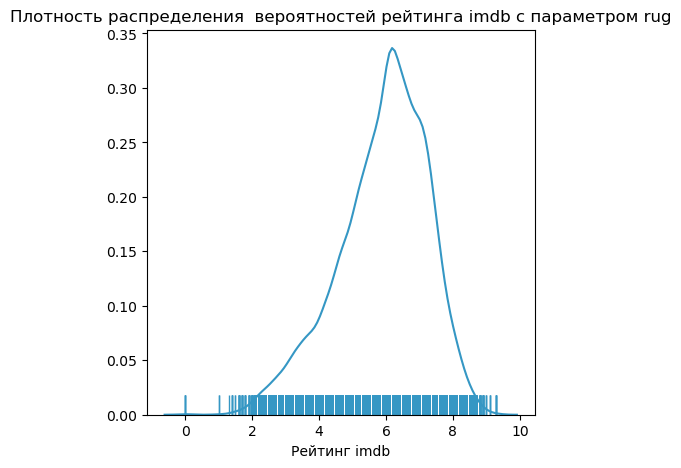

In [53]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'], rug=True, kde=True,hist=False,bins=30,color=pal[1])
plt.title('Плотность распределения  вероятностей рейтинга imdb с параметром rug')
plt.xlabel('Рейтинг imdb')
plt.show()

Кстати нам ничего не мешает размещать по несколько гистограмм на одном графике) Например посмотрим на итальянские и испанские фильмы)

In [54]:
spain_movie = data_movies[data_movies['country']=='Spain']
italy_movie = data_movies[data_movies['country']=='Italy']

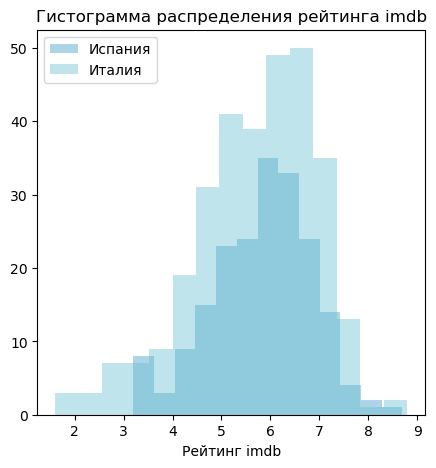

In [55]:
plt.figure(figsize=(5,5))
sns.distplot(spain_movie['imdb'], kde=False,  color=pal[1])
sns.distplot(italy_movie['imdb'], kde=False ,color=pal[2])
plt.title('Гистограмма распределения рейтинга imdb')
plt.xlabel('Рейтинг imdb')
plt.legend(['Испания','Италия'])
plt.show()

При желании мы можем оттюнинговать наши графики еще круче) Для этого можно воспользоваться параметром `hist_kws` или `kde_kws` Это словари в которых хранятся тонкие настройки вида отображаемой гистограммы. Родоначальник этих словарей наша любимая библиотека `matplotlib` 

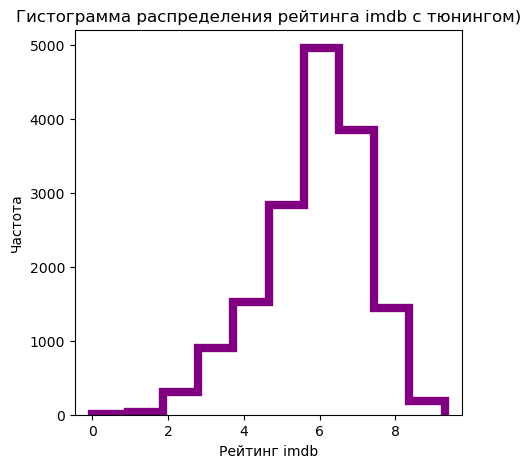

In [56]:
plt.figure(figsize=(5,5))
sns.distplot(data_movies['imdb'], kde=False, bins=10, hist_kws={"histtype": "step", "linewidth": 6,"alpha": 1, "color": "purple"})
plt.title('Гистограмма распределения рейтинга imdb с тюнингом)')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Частота')
plt.show()


Если мы не хотим заморачиваться с параметром `kind`, то есть специальный график, который строит распределение плотностей вероятности. Вызывается функцией `kdeplot()`

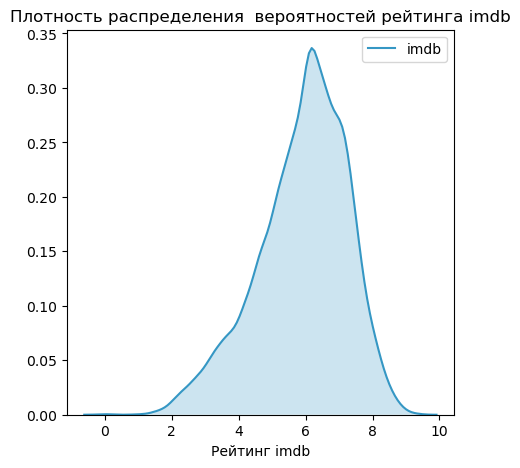

In [57]:
plt.figure(figsize=(5,5))
sns.kdeplot(data_movies['imdb'],color=pal[1],shade=True)
plt.title('Плотность распределения  вероятностей рейтинга imdb')
plt.xlabel('Рейтинг imdb')
plt.show()

Параметр `shade` закрашивает область или нет.

Можно построить плотность распределения вероятности для двух случайных величин


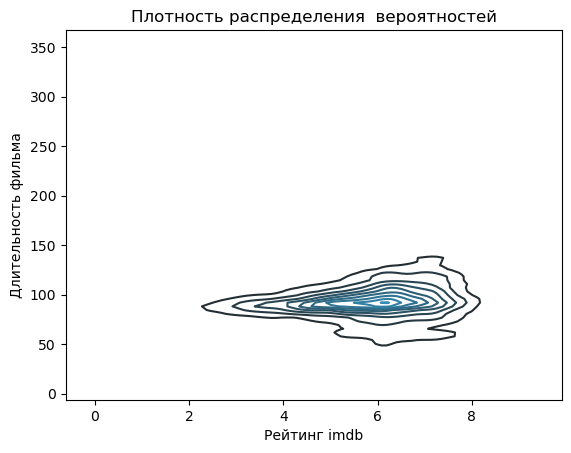

In [58]:
sns.kdeplot(data_movies['imdb'], data_movies['runtime'], shade=False,color=pal[1])
plt.title('Плотность распределения  вероятностей')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Длительность фильма')
plt.show()

<div style= "background-color: #fc8381;padding: 20px">Отмечу, что в версии `seaborn` 0.11.0, появились еще дополнительные графики histplot, ecdfplot и т.д. По сути это повторение стандартного`distplot`, но графики уже строятся строго по тому типу на который он ориентирован.</div>

#### Полезные ссылки:
* [Официальная документация по графикам распределения](https://seaborn.pydata.org/api.html#distribution-plots)
* [Документация по параметрам гистограммы в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist)

### <a name='e'>Boxplot и violinplot</a>

Теперь настало время для ящиков с усами) Для построения ящика с усами испольуется функция `boxplot()` Я особо не буду уделять внимание, что такое ящик с усами, просто оставлю картиночку)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png'>

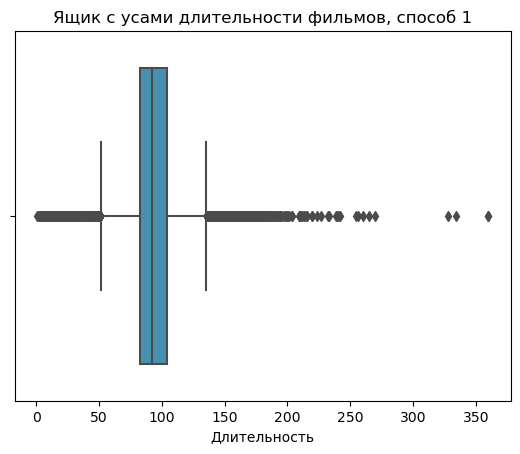

In [59]:
sns.boxplot(data_movies['runtime'], color=pal[1])
plt.title('Ящик с усами длительности фильмов, способ 1')
plt.xlabel('Длительность')
plt.show()

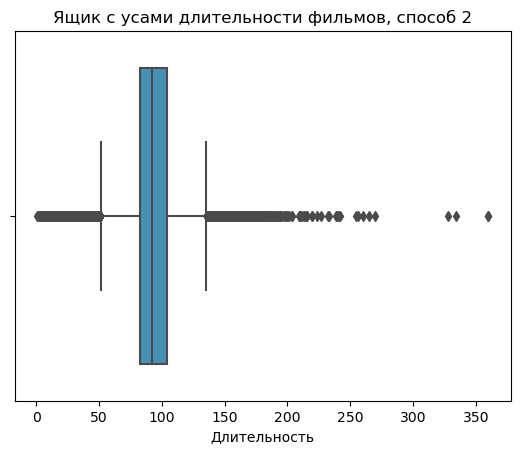

In [60]:
sns.boxplot(data=data_movies,x='runtime',color=pal[1])
plt.title('Ящик с усами длительности фильмов, способ 2')
plt.xlabel('Длительность')
plt.show()

Можем построить график вертикально:

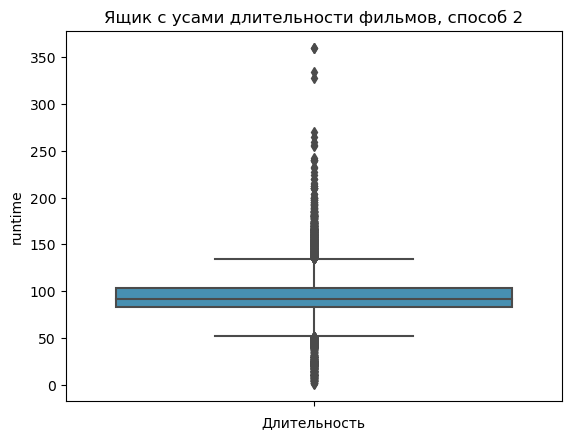

In [61]:
sns.boxplot(data=data_movies,y='runtime',color=pal[1])
plt.title('Ящик с усами длительности фильмов, способ 2')
plt.xlabel('Длительность')
plt.show()

Обратите внимание, выше два одинаковых графика построенных немного разным способом. В целом на мой взгляд правильнее использовать второй способ, так как потом при разбиении на категории нам все равно возвращаться к этому способу)

На самом деле у боксплота много параметров, но в целом нам для быстрого построения все не нужны. Остановимся на некоторых интересных. К слову сказать они все идут от `matplotlib`
Во первых мы можем убрать выбросы: параметр `showfliers`

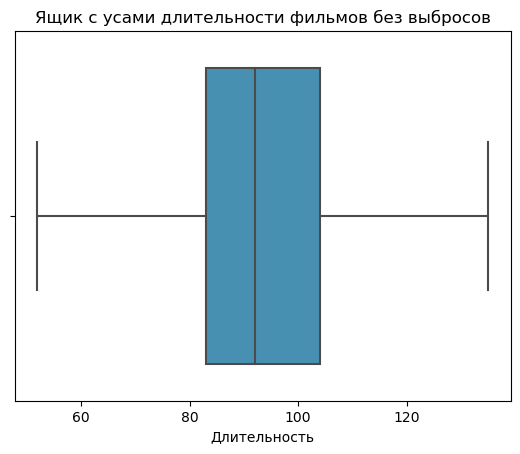

In [62]:
sns.boxplot(data_movies['runtime'], showfliers=False,color=pal[1])
plt.title('Ящик с усами длительности фильмов без выбросов')
plt.xlabel('Длительность')
plt.show()

Мы можем указать среднее значение на графике, параметр `showmeans`

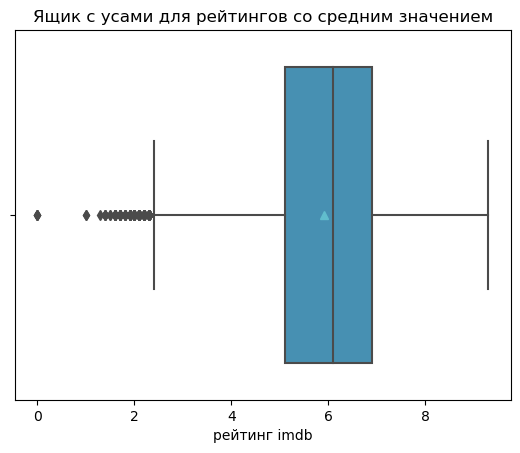

In [63]:
sns.boxplot(data_movies['imdb'], showmeans=True,color=pal[1])
plt.title('Ящик с усами для рейтингов со средним значением')
plt.xlabel('рейтинг imdb')
plt.show()

Можем изменить IQR. За это отвечает параметр `whis`

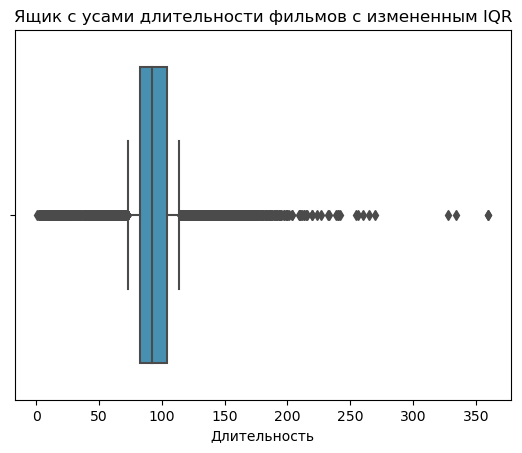

In [64]:
sns.boxplot(data_movies['runtime'], whis=0.5,color=pal[1])
plt.title('Ящик с усами длительности фильмов c измененным IQR')
plt.xlabel('Длительность')
plt.show()

Что самое замечательное мы можем построить ящики с усами по одной величине, разбив их по категориальному признаку. Делается это немного по другому. Смотрите ниже)

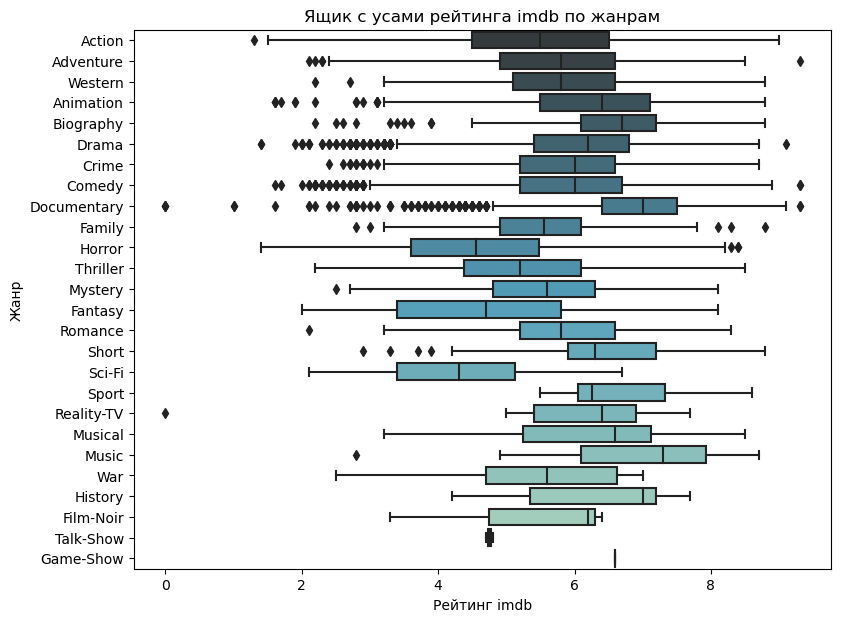

In [65]:
plt.figure(figsize=(9,7))
sns.boxplot(data=data_movies,x='imdb',y='first genre',palette='GnBu_d')
plt.title('Ящик с усами рейтинга imdb по жанрам')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Жанр')
plt.show()

Как видим, здесь нам понадобились параметры x и y. Кстати если вам нужно снизить ширину ящика, то это не проблема) достаточно воспользоваться параметром `width`

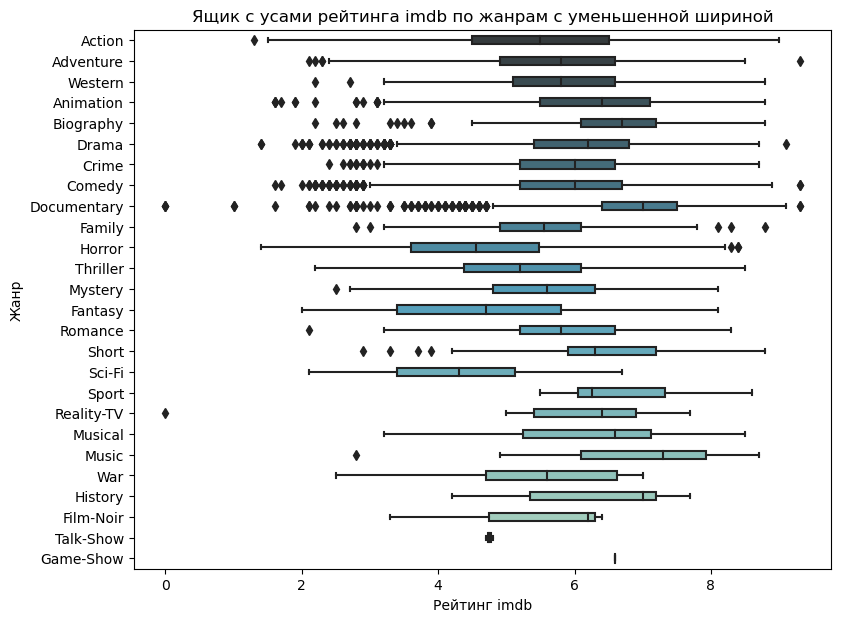

In [66]:
plt.figure(figsize=(9,7))
sns.boxplot(data=data_movies,x='imdb',y='first genre',palette='GnBu_d',width=0.4)
plt.title('Ящик с усами рейтинга imdb по жанрам с уменьшенной шириной')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Жанр')
plt.show()

Если этого нам мало) и мы хотим еще добавить категориальных признаков, то не беда) Для этого есть волшбеный параметр `hue`, к которому мы ни раз вернемся.

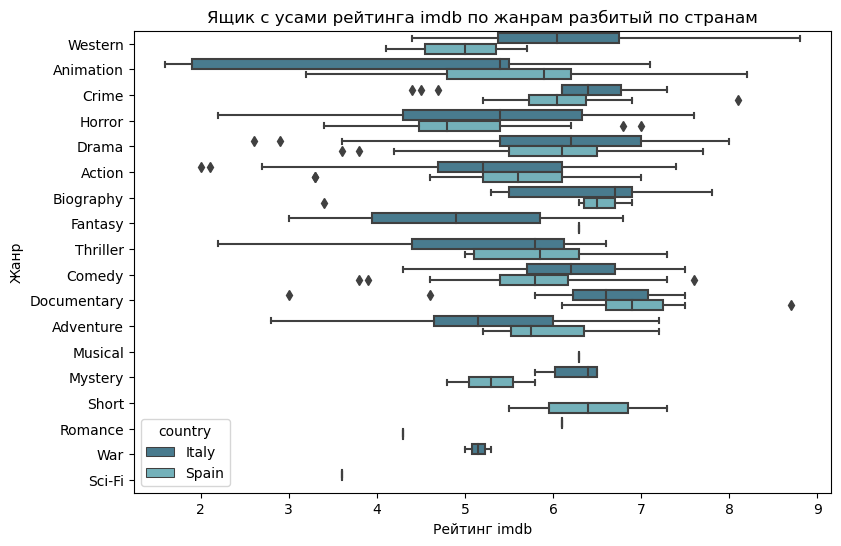

In [67]:
plt.figure(figsize=(9,6))
sns.boxplot(data=data_italy_spain,x='imdb',y='first genre',palette='GnBu_d', hue='country')
plt.title('Ящик с усами рейтинга imdb по жанрам разбитый по странам')
plt.xlabel('Рейтинг imdb')
plt.ylabel('Жанр')
plt.show()

Как интересно) итальянские и испанские фильмы почти не имеют аномальных значений в рейтингах)

Хочу также отметить еще один тип ящика с усами, который строится функцией `boxenplot()`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


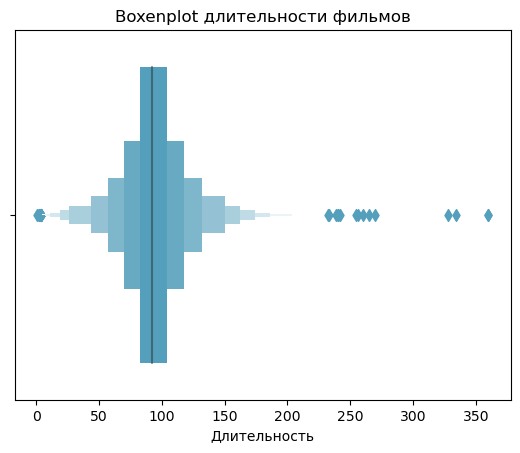

In [68]:
sns.boxenplot(data_movies['runtime'], palette='GnBu_d')
plt.title('Boxenplot длительности фильмов')
plt.xlabel('Длительность')
plt.show()

Что интересно, данный график строит больше квантилей для более точной оценки распределения случайной величины. 

На этом закончим с ящиками с усами и перейдем к другому графику, который называется `violinplot` или скрипичный график. График достаточно интересный и охватывает сразу несколько показателей случайной величины 

<img src='https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png'>

<img src='https://miro.medium.com/max/4208/1*dLw-Ib14E5VNSR_w1eIFug.png'>

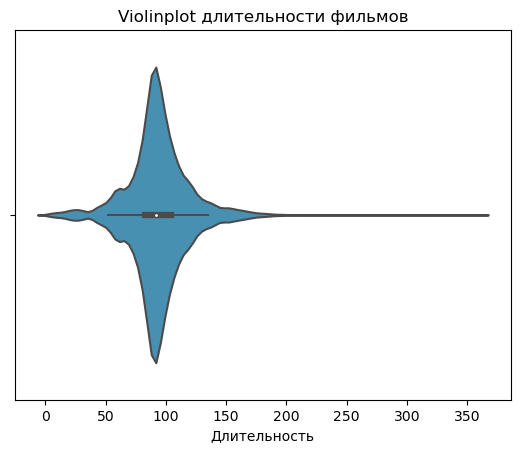

In [69]:
sns.violinplot(data=data_movies,x='runtime',color = pal[1])
plt.title('Violinplot длительности фильмов')
plt.xlabel('Длительность')
plt.show()

По умолчанию внутри графика находится боксплот, но мы можем поменять содержимое используя параметр `inner`

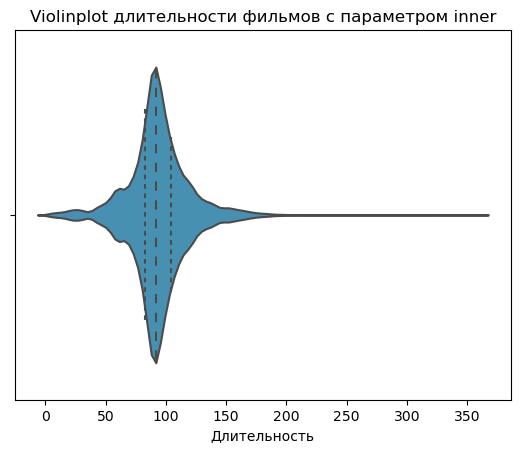

In [70]:
sns.violinplot(data=data_movies,x='runtime',inner='quartile',color = pal[1])
plt.title('Violinplot длительности фильмов с параметром inner')
plt.xlabel('Длительность')
plt.show()

Естественно мы можем разбить по категориальному признаку:

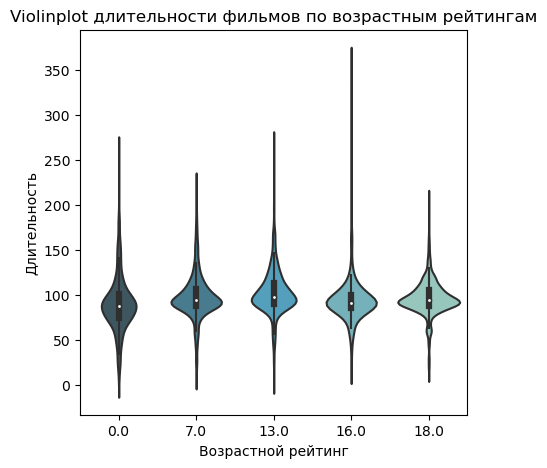

In [71]:
plt.figure(figsize=(5,5))
sns.violinplot(data=data_movies,y='runtime',x='age+',palette='GnBu_d')
plt.title('Violinplot длительности фильмов по возрастным рейтингам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Длительность')
plt.show()

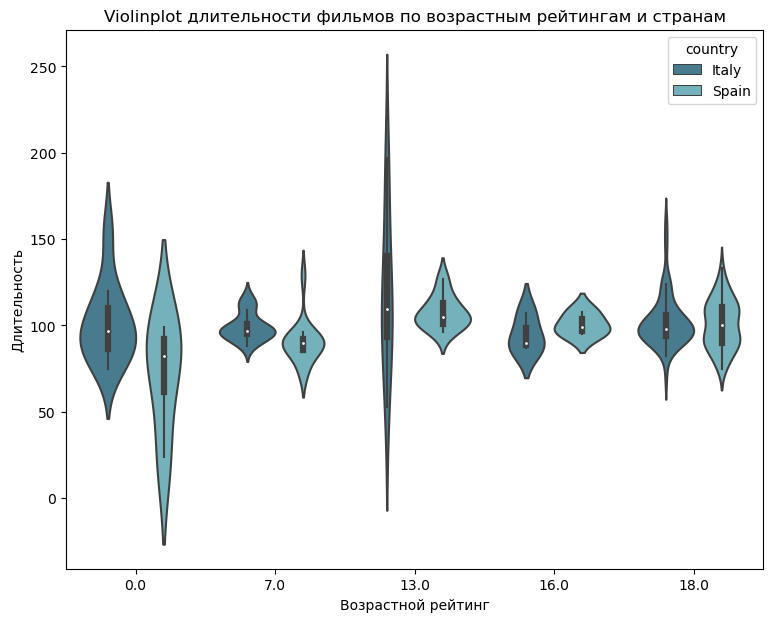

In [72]:
plt.figure(figsize=(9,7))
sns.violinplot(data=data_italy_spain,y='runtime',x='age+',hue='country',palette='GnBu_d')
plt.title('Violinplot длительности фильмов по возрастным рейтингам и странам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Длительность')
plt.show()

Что интересно мы можем сократить размер графика, используя параметр `split` В таком случае каждая из сторон скрипичного графика будет принадлежать одной из категорий

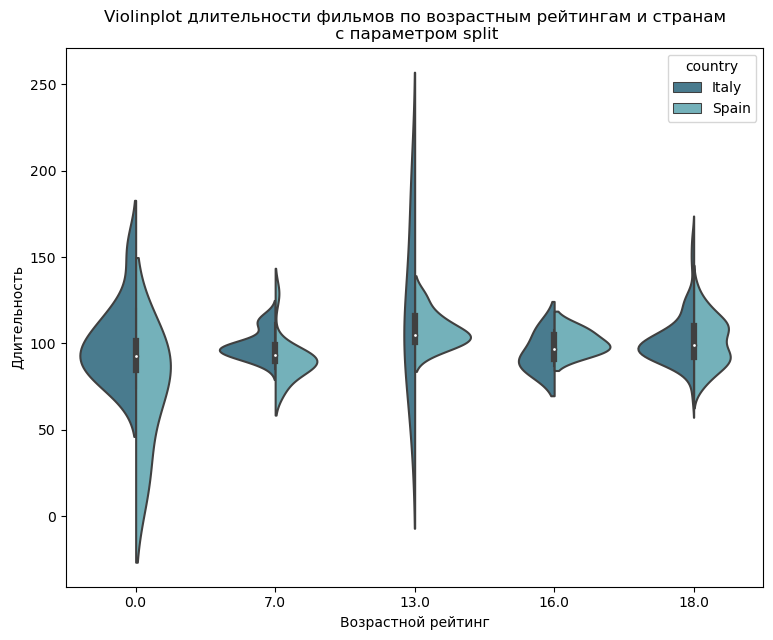

In [73]:
plt.figure(figsize=(9,7))
sns.violinplot(data=data_italy_spain,y='runtime',x='age+',hue='country',palette='GnBu_d',split=True)
plt.title('Violinplot длительности фильмов по возрастным рейтингам и странам\n с параметром split')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Длительность')
plt.show()

На этом заканчиваем с данными графиками и переходим к следующим.

#### Полезные ссылки:
* [Официальная документация по графикам boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* [Официальная документация по графикам violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)
* [Документация по параметрам boxplot в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot)
* [Немного о ящике с усами](https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html)
* [Немного о скрипичном графике](https://datavizcatalogue.com/RU/metody/skripicnyj_grafik.html)
* [О визуализации распределений](https://medium.com/@anastasiyakuznetsova_97575/%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9-3c5ea02613c4)

### <a name='f'>Линейные графики</a>

Теперь приступим к таким часто используемым графикам, как линейные графики. Такой тип графика как правило удобно строить если мы хотим показать изменение какой либо величины за какой то период времени.

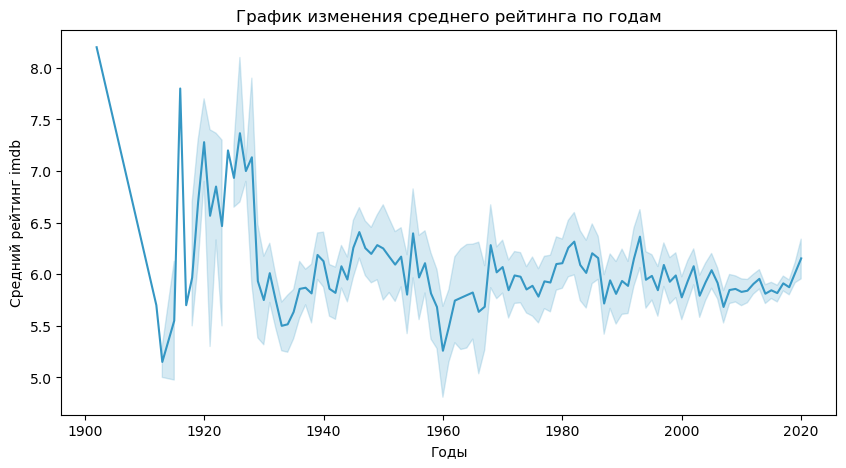

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='imdb',color = pal[1])
plt.title('График изменения среднего рейтинга по годам')
plt.xlabel('Годы')
plt.ylabel('Средний рейтинг imdb')
plt.show()

Здесь следует обратить внимание на несколько моментов:
1. Во-первых в параметрах графика мы указывали, что откладываем по оси X и Y
2. Если данные не агрегированы, то строится по умолчанию среднее значение наблюдаемой величины
3. По умолчанию на график добавляется доверительный интервал для случайно величины 


Ну а теперь подробнее о доверительном интервале. За него отвечает параметр `ci`. Его можно изменить:

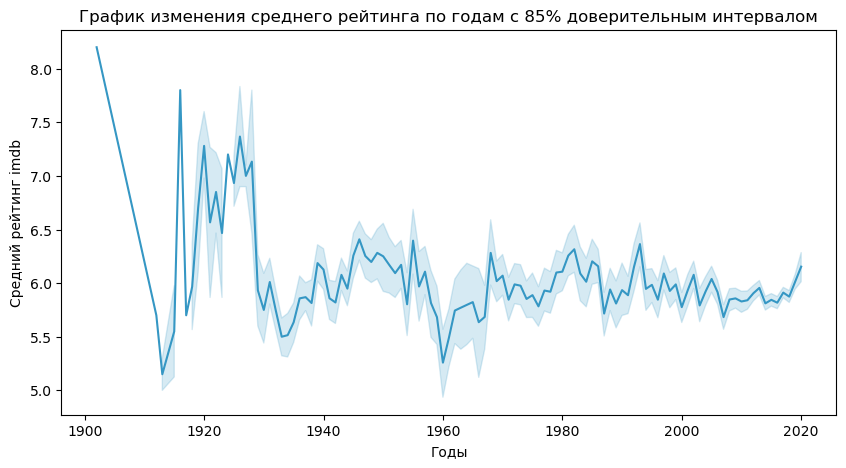

In [75]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='imdb',ci=85,color = pal[1])
plt.title('График изменения среднего рейтинга по годам c 85% доверительным интервалом')
plt.xlabel('Годы')
plt.ylabel('Средний рейтинг imdb')
plt.show()

А можно убрать:

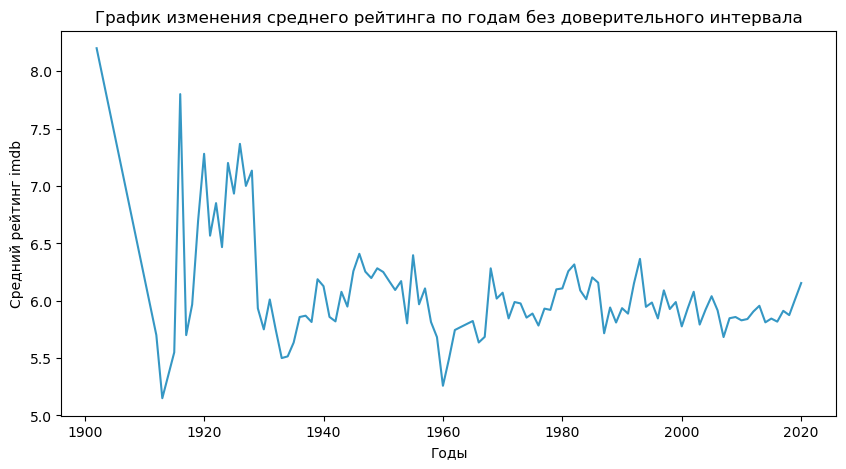

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='imdb',ci=None,color=pal[1])
plt.title('График изменения среднего рейтинга по годам без доверительного интервала')
plt.xlabel('Годы')
plt.ylabel('Средний рейтинг imdb')
plt.show()

Как уже говорилось выше, по умолчанию строится среднее значение. Агрегирующую функцию тоже можно изменить. За это отвечает параметр `estimator`

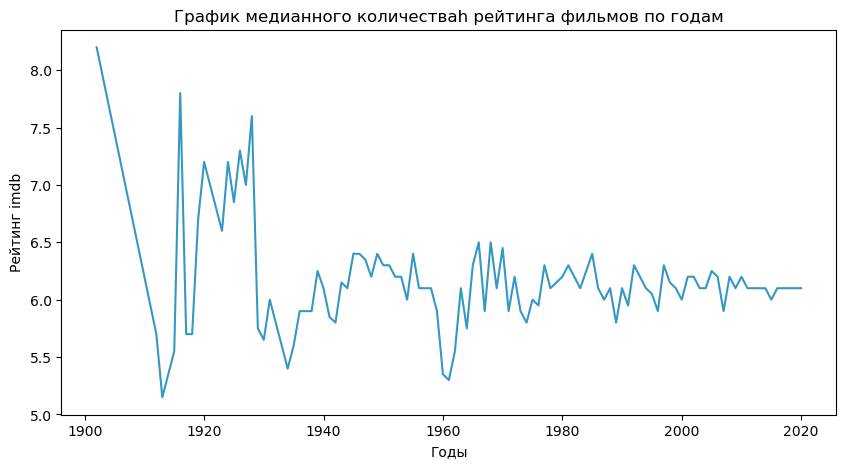

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='imdb',ci=None, estimator=np.median,color=pal[1])
plt.title('График медианного количестваh рейтинга фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Рейтинг imdb')
plt.show()

Если в `estimator` уазать `len` или `count`, то мы получим просто количество наблюдений величины

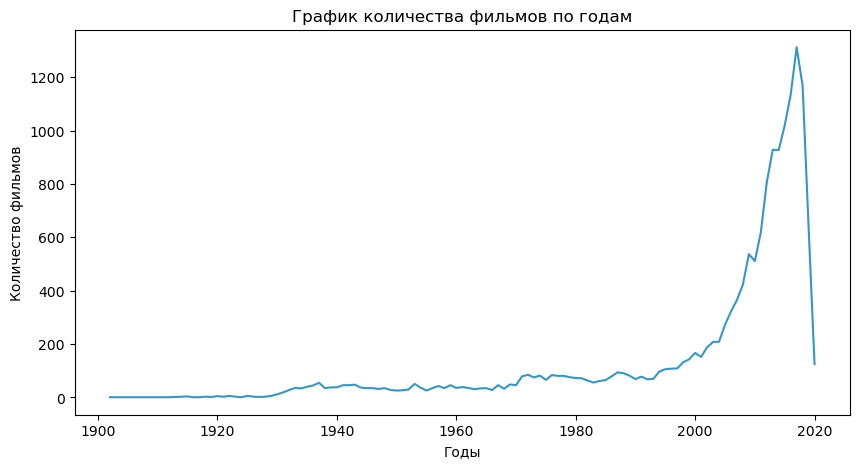

In [78]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='id',ci=None, estimator='count',color=pal[1])
plt.title('График количества фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')
plt.show()

Для сравнения, ниже я построил график с агрегированными данными. Как видите результат идентичен) 

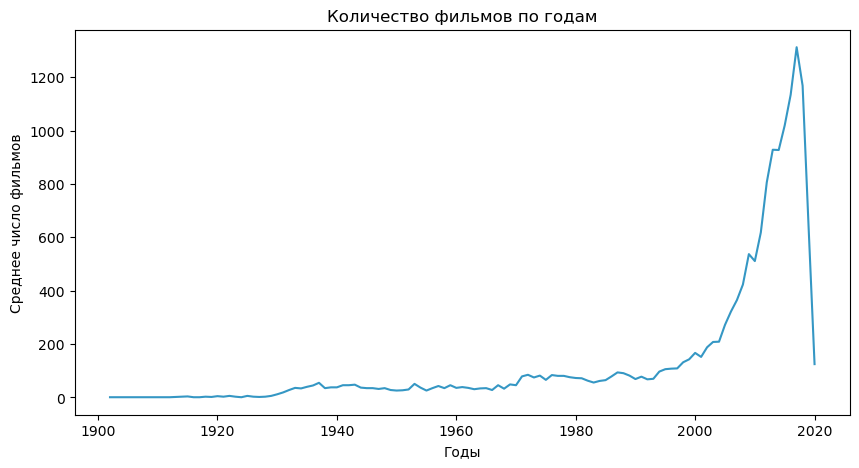

In [79]:
data_year_group = data_movies.groupby('year')['id'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=data_year_group,x='year',y='id',color=pal[1])
plt.title('Количество фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Среднее число фильмов')
plt.show()

<div style= "background-color: #fc8381;padding: 20px"> Важно!! Как видите выше, я строил графики изменения рейтинга и т.д. Зачастую многие ошибаются пытаясь построить среднее количество наблюдений величины, подсовывая какие-нибудь идентификаторы события и т.д. Так делать нельзя, так как как правило идентификатор это некое целое число и среднее будет искажено. Будьте внимательны. Ниже я привел пример</div> 

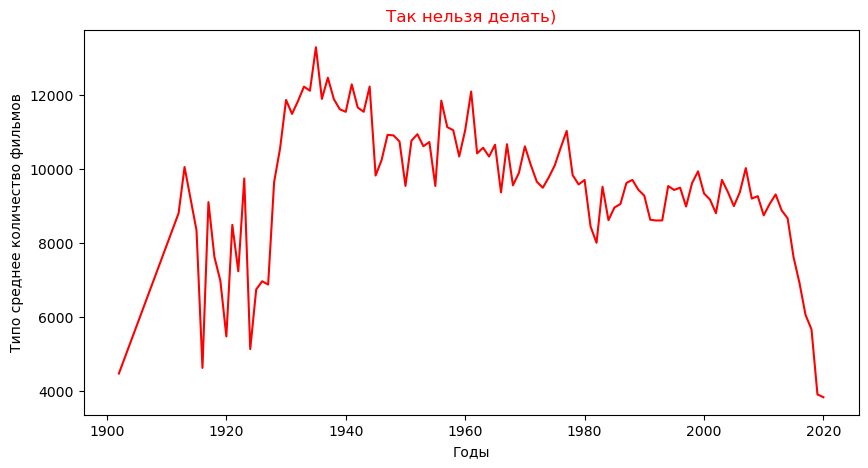

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_movies,x='year',y='id',ci=None,color='red')
plt.title('Так нельзя делать)',color='red')
plt.xlabel('Годы')
plt.ylabel('Типо среднее количество фильмов')
plt.show()

Как видите получились огромные цифры.Это при невнимательности может исказить результаты исследования:(

Продолжим дальше. Так же мы можем добавить точки на график. Для этого служит параметр `marker`

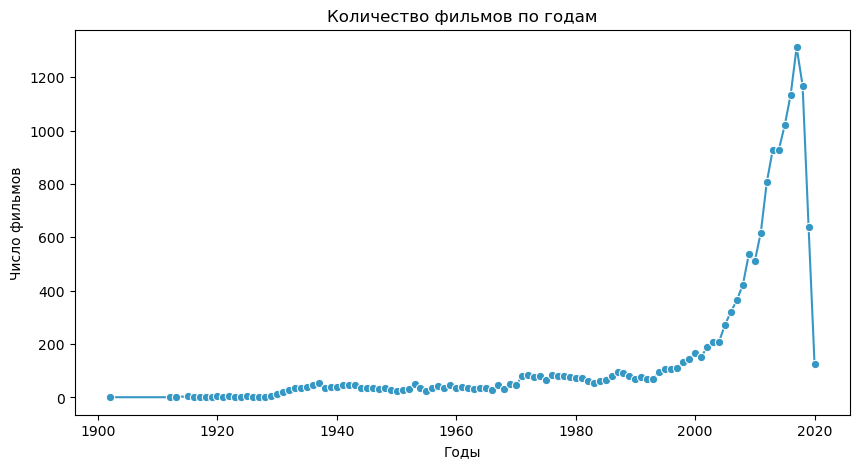

In [81]:
data_year_group = data_movies.groupby('year')['id'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=data_year_group,x='year',y='id', marker='o',color=pal[1] )
plt.title('Количество фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Число фильмов')
plt.show()

Кстати нам ничего не мешает добавлять на линейный график (и вообще на любой)графики другого типа. Например добавим здесь гистограмму количества фильмов по годам. 

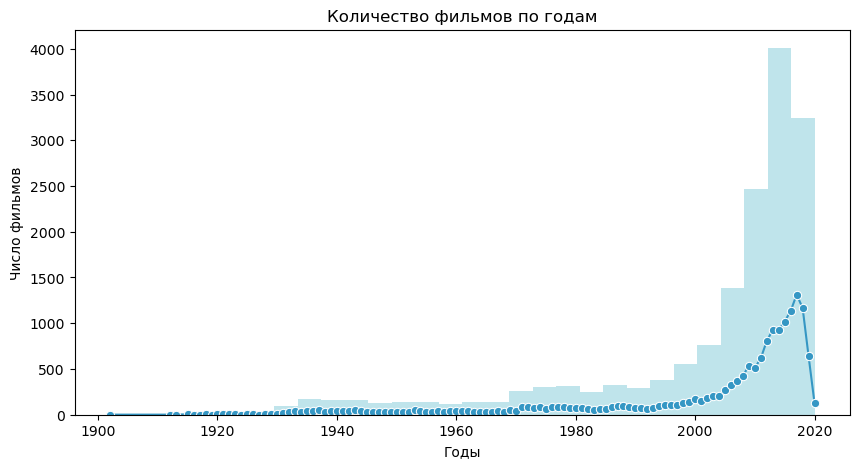

In [82]:
data_year_group = data_movies.groupby('year')['id'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=data_year_group,x='year',y='id', marker='o',color=pal[1])
sns.distplot(data_movies['year'], kde=False,bins=30,color = pal[2])
plt.title('Количество фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Число фильмов')
plt.show()

Ну и конечно же мы можем построить наш график сгруппировав его по категориальным признакам. Например, построим график количества фильмов по годам для каждого жанра. Как нам уже известно за это отвечает параметр `hue`

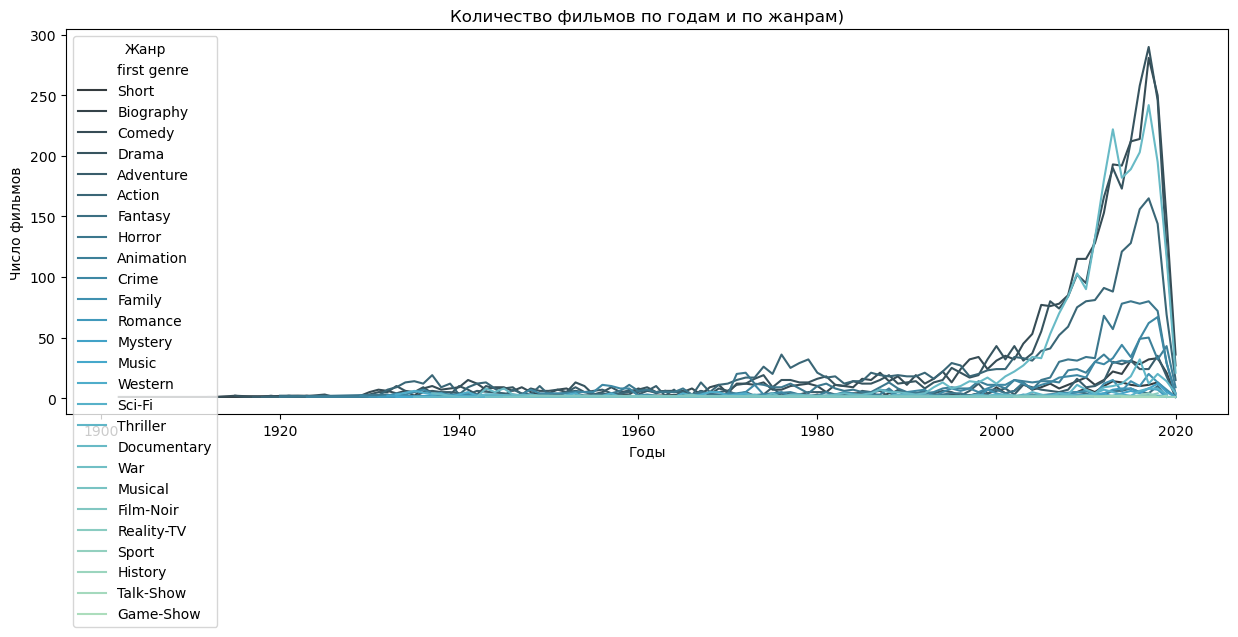

In [83]:
data_year_group = data_movies.groupby(['year','first genre'])['id'].count().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(data=data_year_group,x='year',y='id',hue='first genre',palette='GnBu_d')
plt.title('Количество фильмов по годам и по жанрам)')
plt.xlabel('Годы')
plt.ylabel('Число фильмов')
plt.legend(loc='upper left',title='Жанр')
plt.show()

Мы можем изменить типы наших линий. Вернемся к датафрейму с фильмами Испании и Италии. Изменить линию можно задав параметр `style`

In [84]:
data_italy_spain.reset_index(inplace=True)

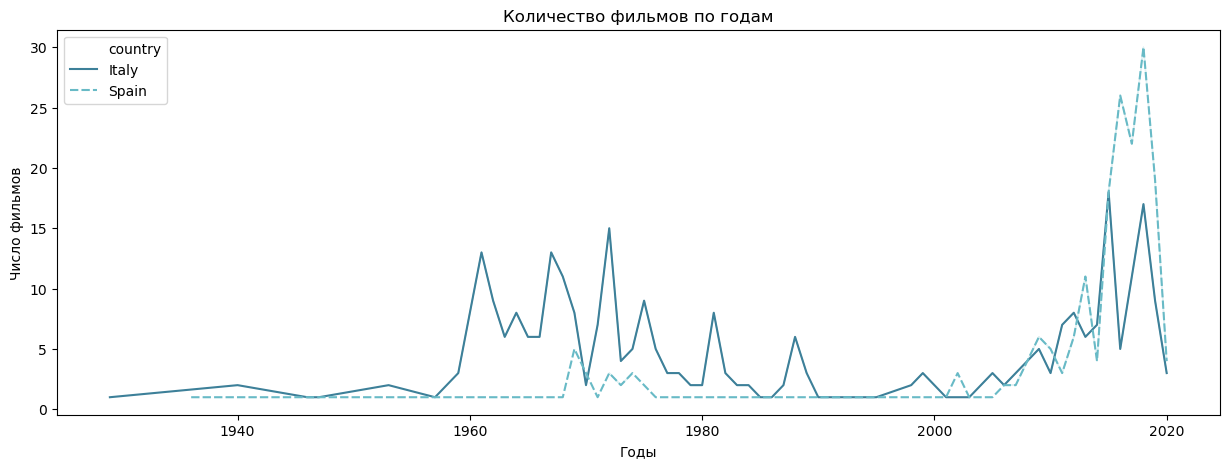

In [85]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data_italy_spain,x='year',y='id',hue='country',palette='GnBu_d',style='country',estimator=len)
plt.title('Количество фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Число фильмов')
plt.legend(loc='upper left')
plt.show()

У вас автоматически применятся стили для различных категорий.

Так же мы можем использовать параметры библиотеки `matplotlib` для изменения толщицы линий, их типа и т.д.

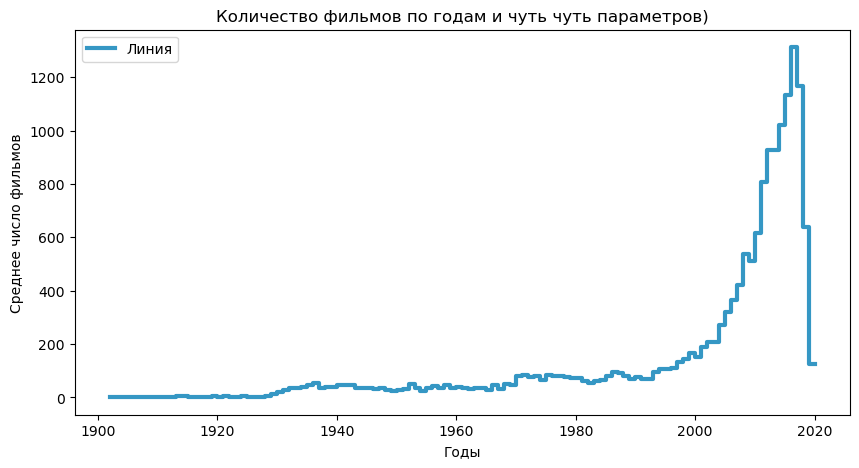

In [86]:
data_year_group = data_movies.groupby('year')['id'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=data_year_group,x='year',y='id',linestyle='-.',linewidth=3,label='Линия',drawstyle='steps',color=pal[1])
plt.title('Количество фильмов по годам и чуть чуть параметров)')
plt.xlabel('Годы')
plt.ylabel('Среднее число фильмов')
plt.show()

Закончим с линейными графиками и перейдем к следующим графикам)

#### Полезные ссылки:
* [Официальная документация по линейный графикам](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)
* [Документация по параметрам линий и осей в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)
* [Документация по линейным графикам в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

### <a name='g'>Barplot и countplot</a>

Теперь пришло время поработать со столбчатыми диаграммами. В `seaborn` есть два типа графиков для построения столбчатых диаграмм, при всей своей схожести они отличаются достаточно сильно по функционалу. Начнем с countplot-а  

Countplot подсчитывает количество наблюдений какого-либо категориального признака. 

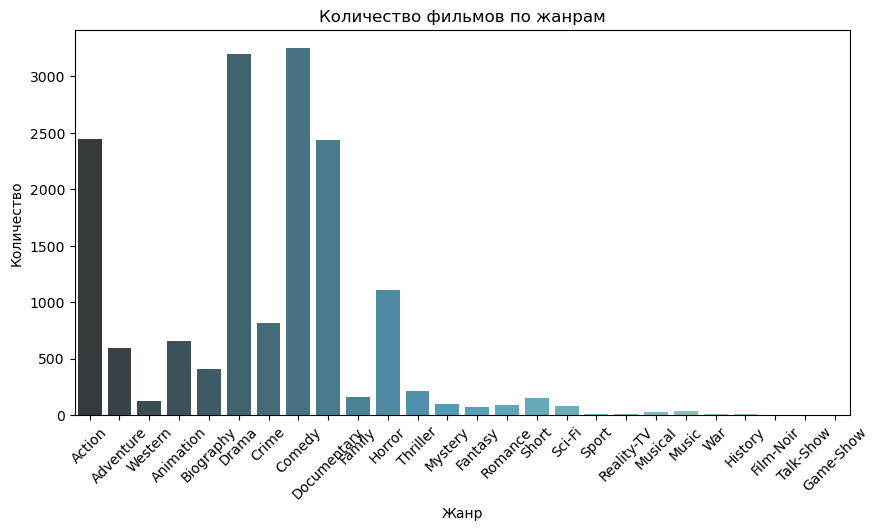

In [87]:
plt.figure(figsize=(10,5))
plt.title('Количество фильмов по жанрам')
sns.countplot(data=data_movies,x='first genre',palette='GnBu_d')
plt.xlabel('Жанр')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.show()


Что мы можем тут улучшить? Например, когда много признаков, можно отобразить столбцы горизонтально

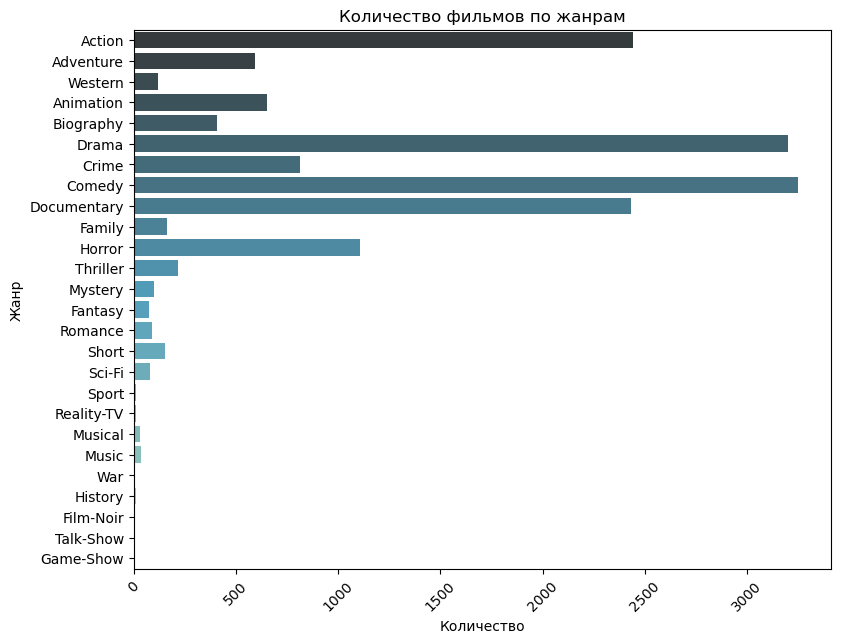

In [88]:
plt.figure(figsize=(9,7))
plt.title('Количество фильмов по жанрам')
sns.countplot(data=data_movies,y='first genre',palette='GnBu_d')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество')
plt.show()

Бывает так, что на вход графика мы подаем уже отсортированные данные. В нашем же случае отсортировать данные мы можем используя параметр `order`

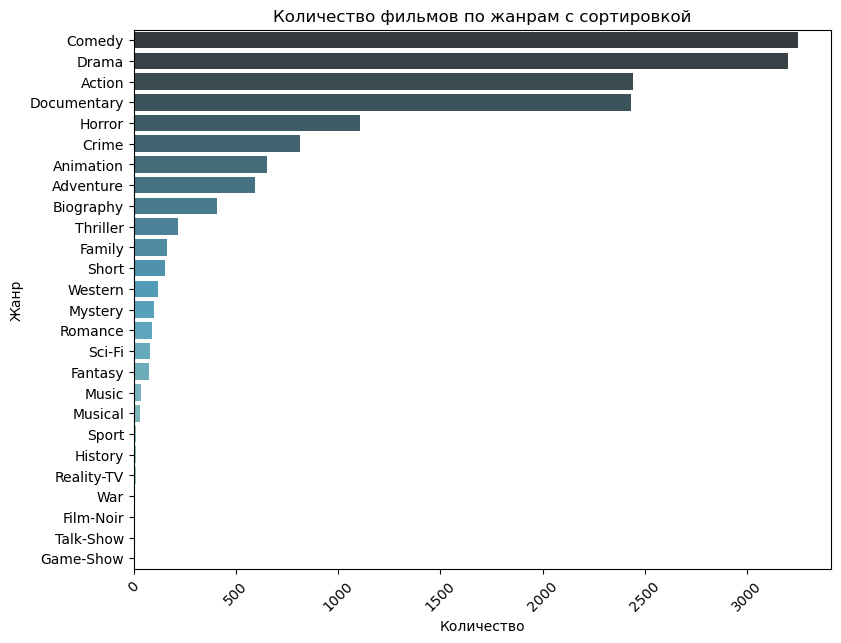

In [89]:
plt.figure(figsize=(9,7))
plt.title('Количество фильмов по жанрам с сортировкой')
sns.countplot(data=data_movies,y='first genre',palette='GnBu_d',order=data_movies['first genre'].value_counts().index)
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество')
plt.show()

Как всегда, используя параметр `hue`, мы можем разбить наши подсчитанные значения еще по какому-либо признаку. Посмотрим, что получилось: 

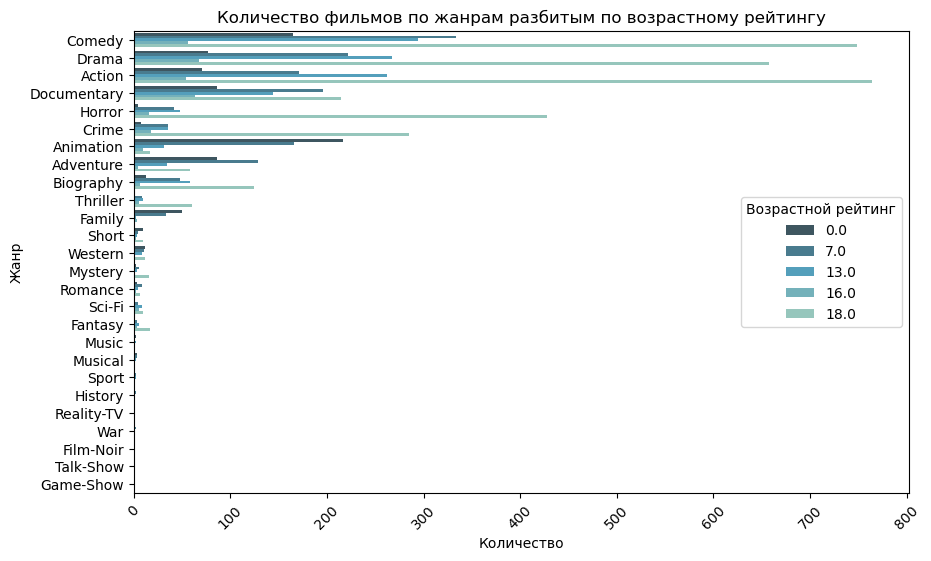

In [90]:
plt.figure(figsize=(10,6))
plt.title('Количество фильмов по жанрам разбитым по возрастному рейтингу')
(sns.countplot(data=data_movies,y='first genre',
               palette='GnBu_d',
               order=data_movies['first genre'].value_counts().index,
              hue='age+')
)
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество')
plt.legend(title='Возрастной рейтинг')
plt.show()

Интересно, что в жанре криминал, есть фильмы с рейтином 0+:)

Как всегда мы можем добавить несколько барчартов на один график

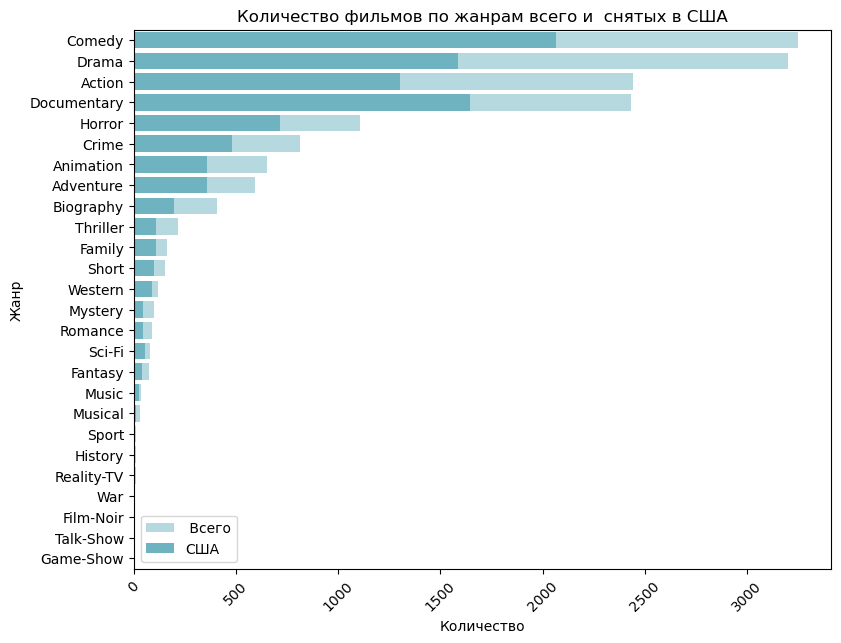

In [91]:
plt.figure(figsize=(9,7))
plt.title('Количество фильмов по жанрам всего и  снятых в США')
sns.countplot(data=data_movies,y='first genre',color=pal[2],order=data_movies['first genre'].value_counts().index,alpha=0.5)
sns.countplot(data=data_movies.query('country=="United States"'),y='first genre',color=pal[2],order=data_movies['first genre'].value_counts().index)
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество')
plt.legend(labels=[' Всего','США'])
plt.show()

И как всегда мы можем дополнять наши графики, используя параметры из библиотеки `matplotlib`

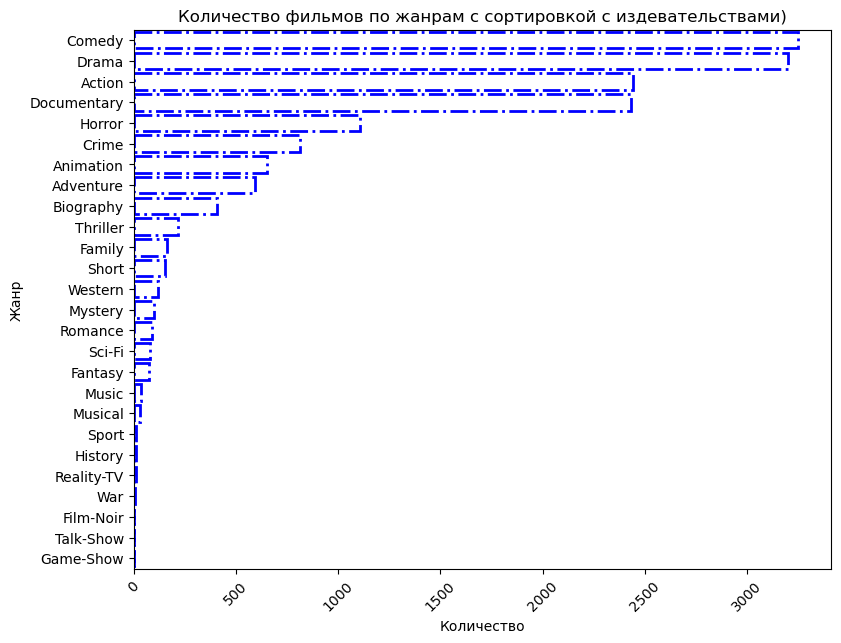

In [92]:
plt.figure(figsize=(9,7))
plt.title('Количество фильмов по жанрам с сортировкой c издевательствами)')
(sns.countplot(data=data_movies,y='first genre',
               palette='GnBu_d',
               order=data_movies['first genre'].value_counts().index,
              edgecolor='blue',linewidth=2.0,linestyle='-.',facecolor=(0, 0, 0, 0))
)
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество')
plt.show()

Следующий тип графика `barplot()` он очень похож на `countplot()`, но позволяет подсчитать не только количество, а проагрегировать данные и построить доверительные интервалы. И так приступим) 

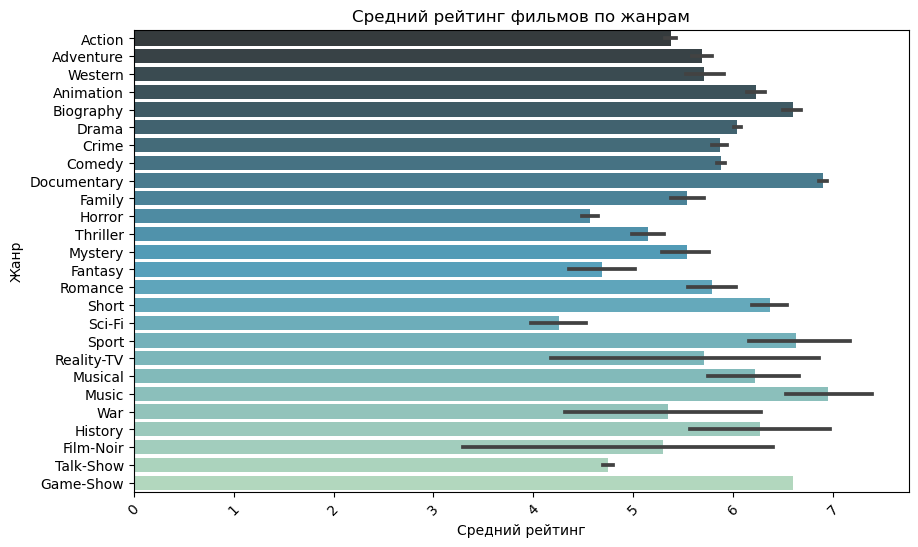

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d')
plt.title('Средний рейтинг фильмов по жанрам')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Средний рейтинг')
plt.show()

Как видим, у каждого бара есть доверительный интервал. Его можно изменить или отключить, используя параметр `ci`

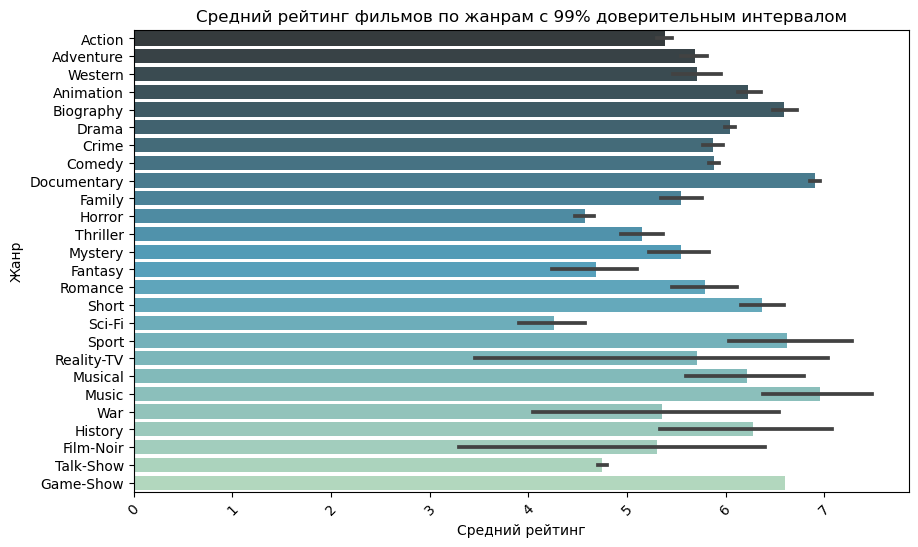

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d',ci=99)
plt.title('Средний рейтинг фильмов по жанрам c 99% доверительным интервалом')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Средний рейтинг')
plt.show()

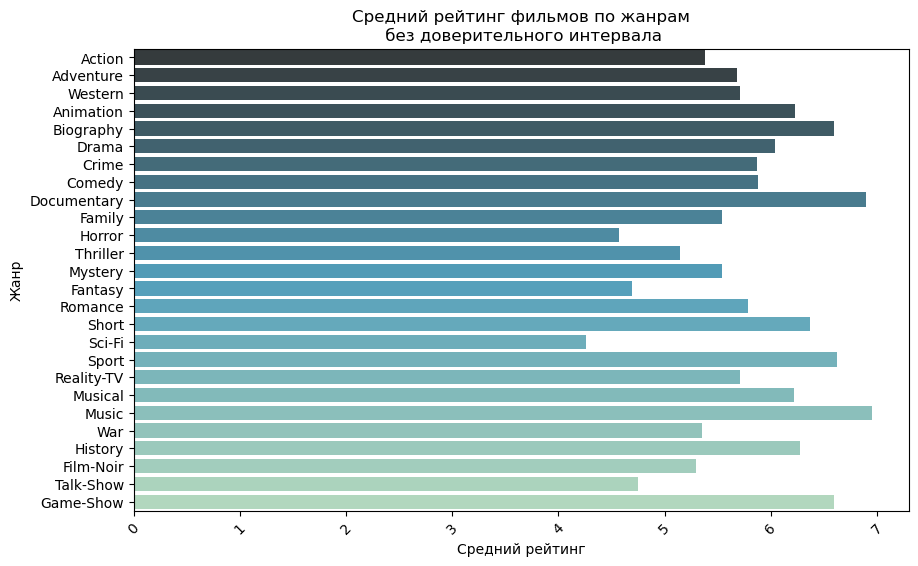

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d', ci=None)
plt.title('Средний рейтинг фильмов по жанрам\n без доверительного интервала')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Средний рейтинг')
plt.show()

За агрегацию данных отвечает параметр `estimator`. В нем можно указать, как ваши данные будут агрегироваться. По умолчанию считается среднее. Рассмотрим более подробно, например мы хотим построить медианное значение:

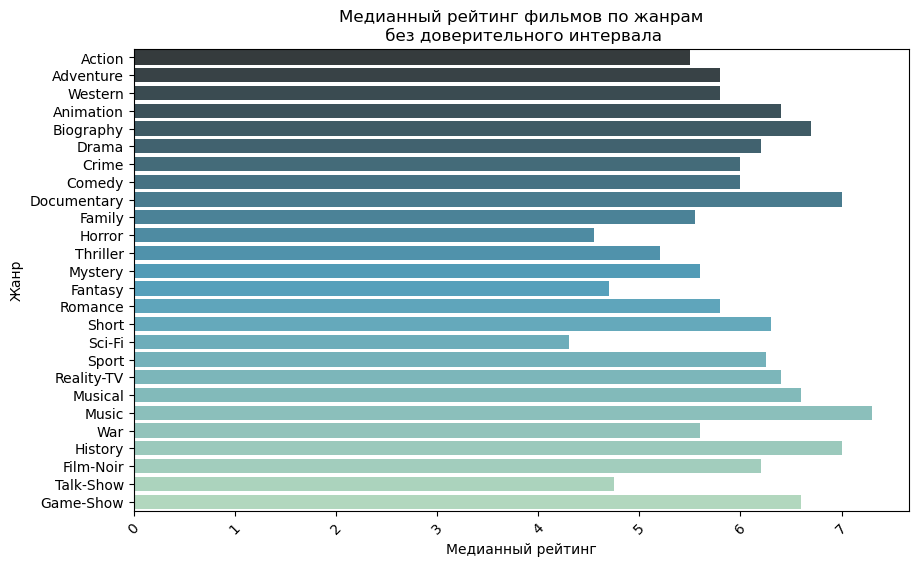

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d', ci=None,estimator=np.median)
plt.title('Медианный рейтинг фильмов по жанрам\n без доверительного интервала')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Медианный рейтинг')
plt.show()

Или например хотим вывести максимальное значение

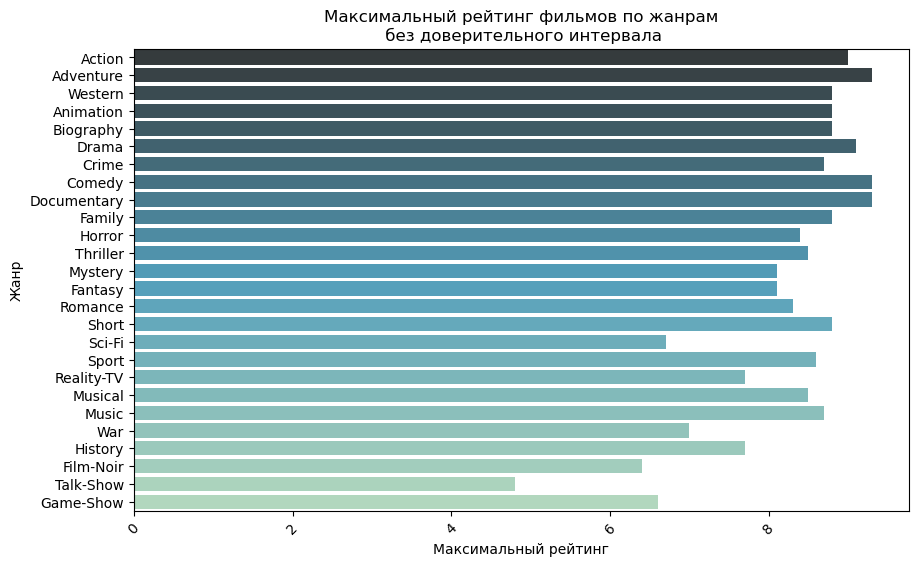

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d', ci=None,estimator=max)
plt.title('Максимальный рейтинг фильмов по жанрам\n без доверительного интервала')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Максимальный рейтинг')
plt.show()

Если в `estimator` мы укажим len, то наш `barplot` превратится в `countplot`)

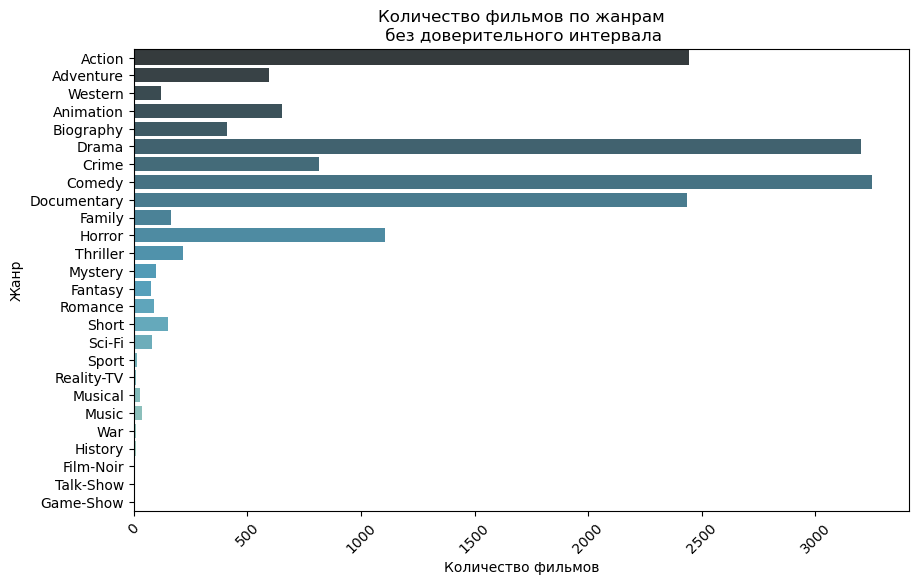

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d', ci=None,estimator=len)
plt.title('Количество фильмов по жанрам\n без доверительного интервала')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Количество фильмов')
plt.show()

Кстати никто нам не запрещает в `estimator` использовать свои собственные функции. Например посчитаем долю фильмов каждого жанра от общего числа фильмов:

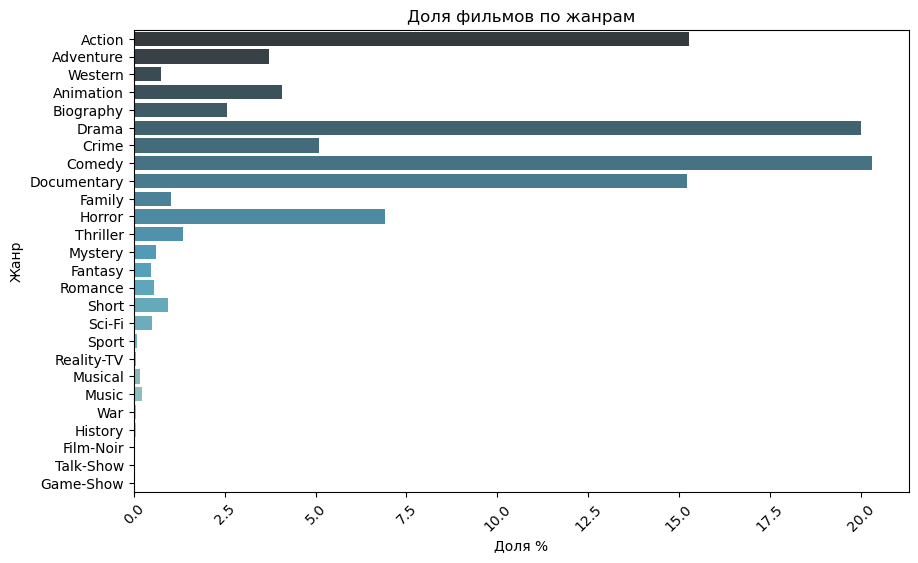

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_movies,y='first genre',x='imdb',palette='GnBu_d', ci=None,estimator=lambda x:len(x)/len(data_movies)*100)
plt.title('Доля фильмов по жанрам')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Доля %')
plt.show()

Ну и конечно же мы как всегда можем применить параметр `hue`

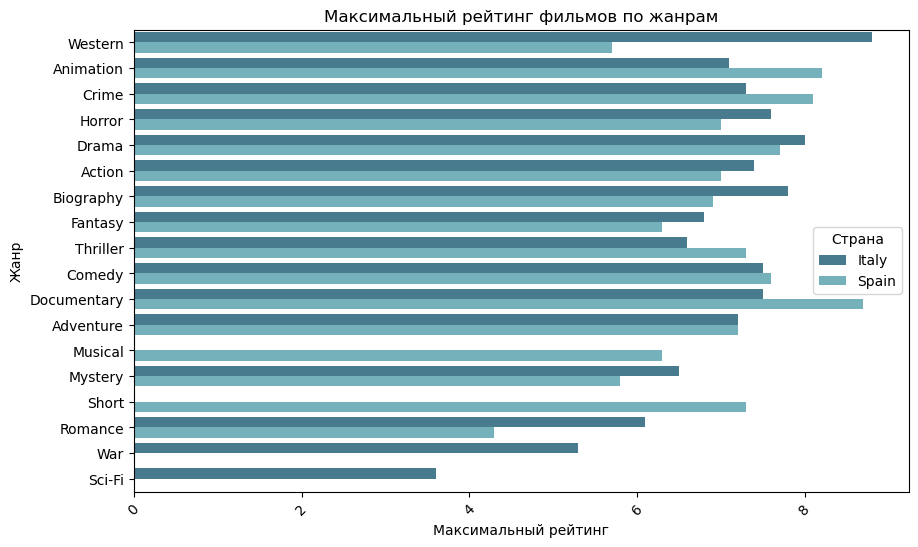

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_italy_spain,y='first genre',x='imdb',palette='GnBu_d', ci=None,estimator=max,hue='country')
plt.title('Максимальный рейтинг фильмов по жанрам')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.xlabel('Максимальный рейтинг')
plt.legend(title='Страна')
plt.show()

Не любят в Испании фильмы жанра Sci-Fi:(

На этом мы закончим здесь и перейдем к диаграммам рассеяния

#### Полезные ссылки:
* [Официальная документация по барчартам](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
* [Официальная документация по coutplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
* [Документация по параметрам барчартов в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar)

### <a name='h'>Диаграммы рассеяния</a>

Диаграммы рассеяния незаменимый инструмент, если нам нужно сравнить зависимость между двумя величинами. Строится такой график функцией `scatterplot()`

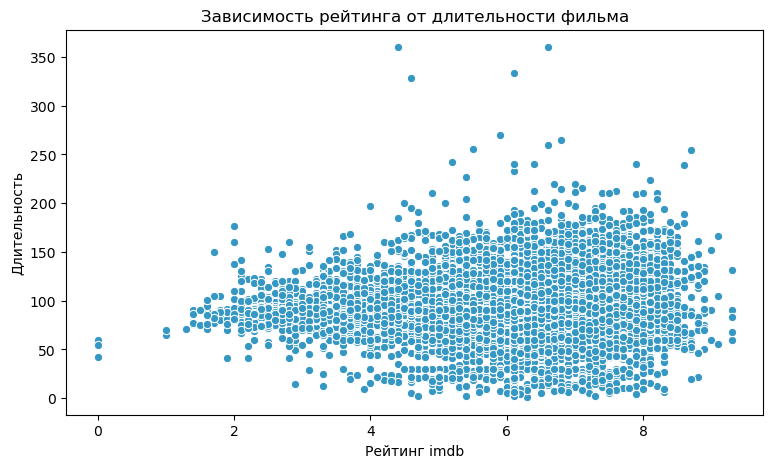

In [101]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_movies, y='runtime', x='imdb',color=pal[1])
plt.title('Зависимость рейтинга от длительности фильма')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.show()

Мы можем поменять тип маркеров:

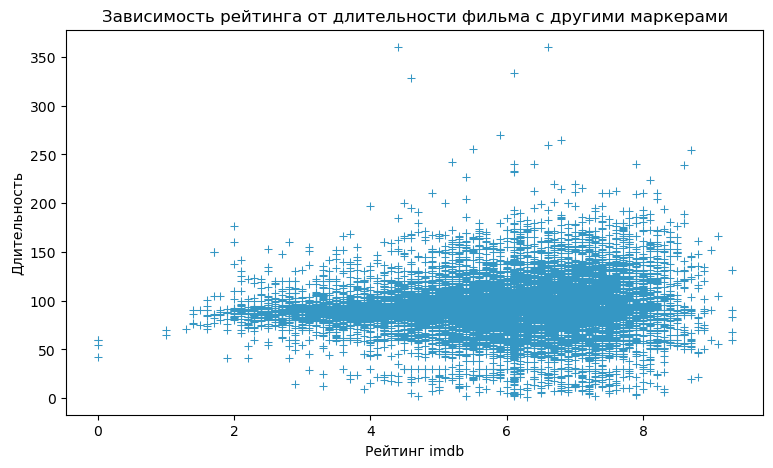

In [102]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_movies, y='runtime', x='imdb',color=pal[1],marker='+')
plt.title('Зависимость рейтинга от длительности фильма c другими маркерами')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.show()

Также мы можем поменять размер точек, за это отвечает параметр `size`

In [103]:
data_movies_grouped = (data_movies.groupby(['first genre','year']).
 agg({'id':'count','runtime':'mean','imdb':'mean'}).
                       sort_values('id',ascending=False).reset_index()
                      )


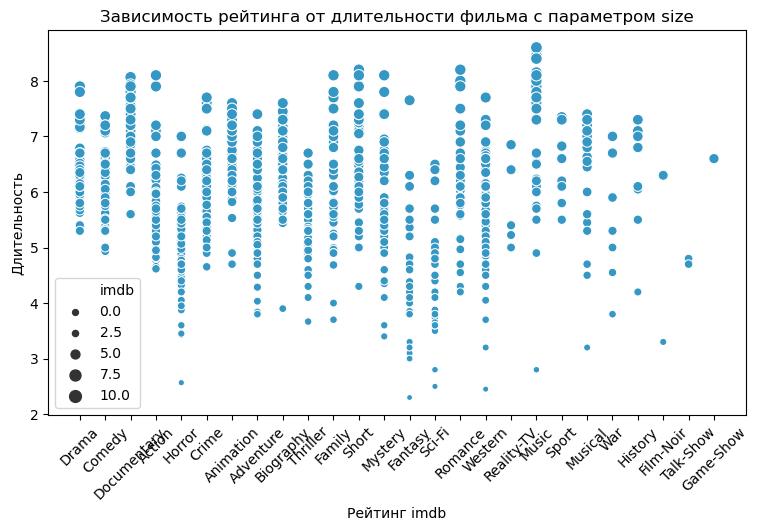

In [104]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_movies_grouped, y='imdb', x='first genre',color=pal[1], size='imdb')
plt.title('Зависимость рейтинга от длительности фильма с параметром size')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.xticks(rotation=45)
plt.show()

Размер можно выставить вручную. Для этого используется параметр `sizes`

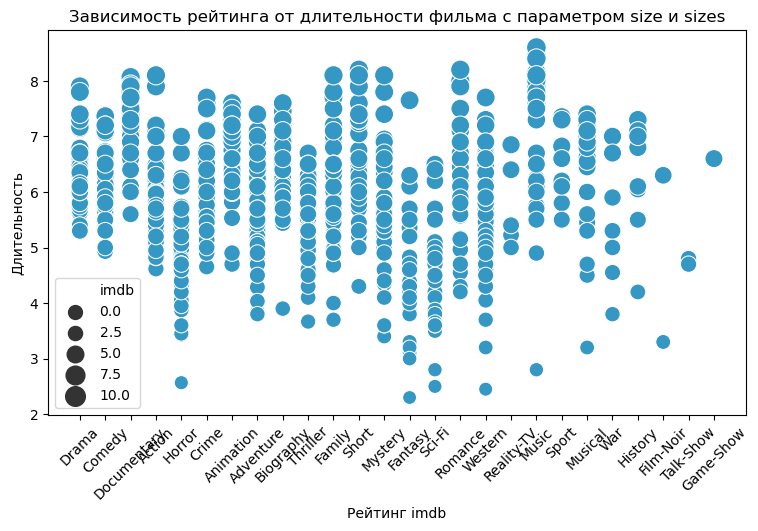

In [105]:
plt.figure(figsize=(9,5))
(sns.scatterplot(data=data_movies_grouped,
                 y='imdb', x='first genre',
                 color=pal[1], 
                 size='imdb',sizes=(100,200))
)
plt.title('Зависимость рейтинга от длительности фильма с параметром size и sizes')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.xticks(rotation=45)
plt.show()

И традиционно параметр `hue`:)

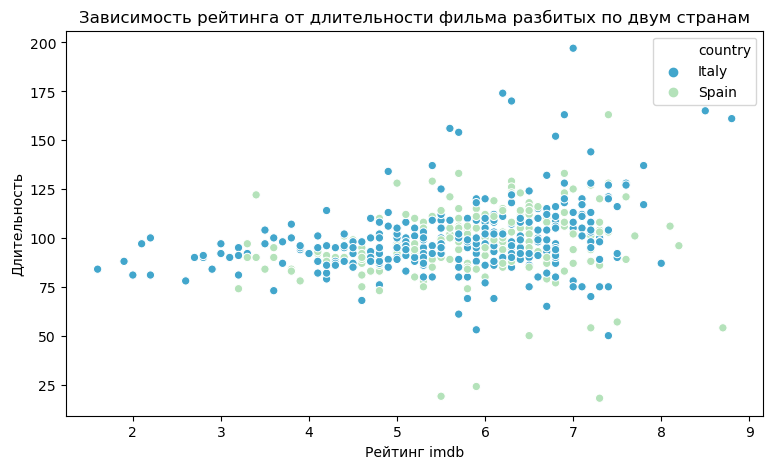

In [106]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_italy_spain, y='runtime', x='imdb',palette='GnBu_r', hue='country')
plt.title('Зависимость рейтинга от длительности фильма разбитых по двум странам')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.show()

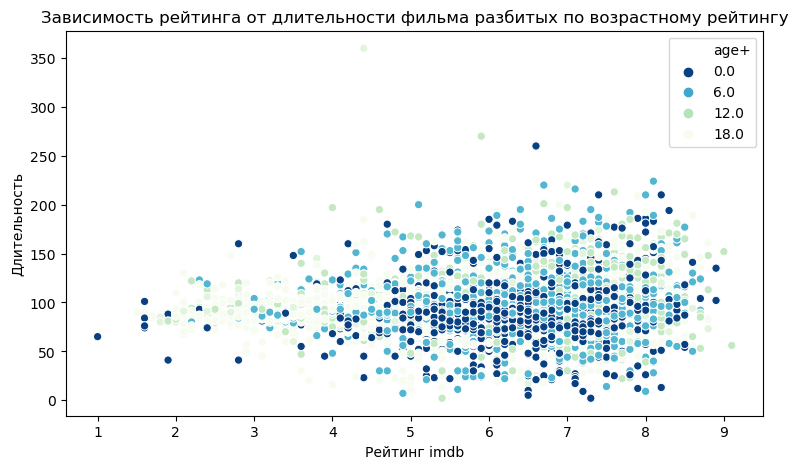

In [107]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_movies, y='runtime', x='imdb',palette='GnBu_r', hue='age+')
plt.title('Зависимость рейтинга от длительности фильма разбитых по возрастному рейтингу')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.show()

Можно поменять типы маркеров в зависимости от признака

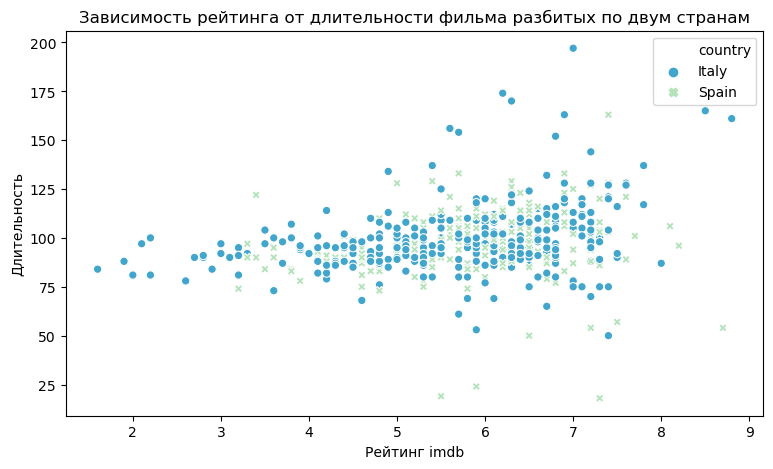

In [108]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data_italy_spain, y='runtime', x='imdb',palette='GnBu_r', hue='country',style='country')
plt.title('Зависимость рейтинга от длительности фильма разбитых по двум странам')
plt.ylabel('Длительность')
plt.xlabel('Рейтинг imdb')
plt.show()

Отмечу, что диаграмму рассеяния не всегда используют для оценки зависимости между двумя признаками. Иногда ее можно использовать таким образом:

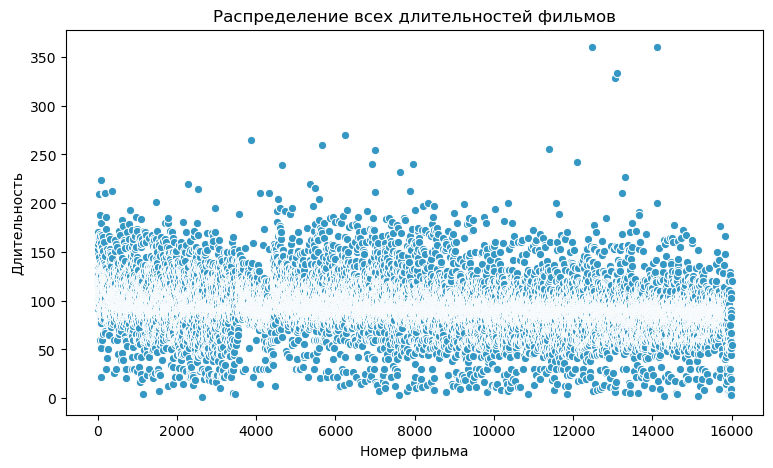

In [109]:
plt.figure(figsize=(9,5))
x_values = pd.Series(range(0,len(data_movies['runtime']))) 
sns.scatterplot(data=data_movies,x=x_values,y='runtime',color=pal[1])
plt.title('Распределение всех длительностей фильмов')
plt.ylabel('Длительность')
plt.xlabel('Номер фильма')
plt.show()

Если обратить внимание на график выше, то видно, что мы для каждого фильма отобразили его длительность и растянули по всей оси икс. На таком графики удобно наблюдать выбросы. Мы видим, что большая масса фильмов сосредоточена в одном значении, но есть и неприлично длинные фильмы:)

Кстати нам ничего не мешает добавить еще например линию показывающую среднюю длительность всех фильмов)

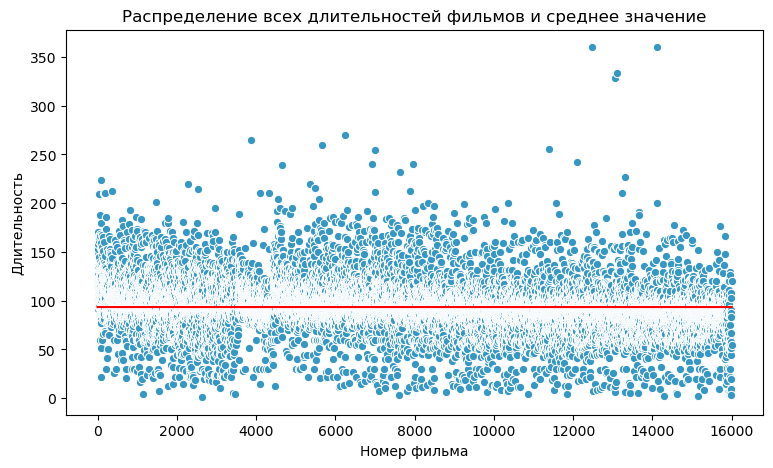

In [110]:
plt.figure(figsize=(9,5))
x_values = pd.Series(range(0,len(data_movies['runtime']))) 
sns.scatterplot(data=data_movies,x=x_values,y='runtime',color=pal[1])
sns.lineplot(x=x_values,y=data_movies['runtime'].mean(),color='r')
plt.title('Распределение всех длительностей фильмов и среднее значение')
plt.ylabel('Длительность')
plt.xlabel('Номер фильма')
plt.show()

На этом здесь все, переходим к следующему типу графиков.

#### Полезные ссылки:
* [Официальная документация по scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
* [Документация по параметрам scatterplot в matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)
* [О диаграммах рассеяния](https://datavizcatalogue.com/RU/metody/diagramma_rassejanija.html)

### <a name='i'>Stripplot и swarmplot</a>

Следующие два графика практически похожи. Начнем со `stripplot`. Данный тип графика похож на диаграмму рассеяния, но одна из переменных у него категориальная. Вызывается такой график функцией `stripplot()`

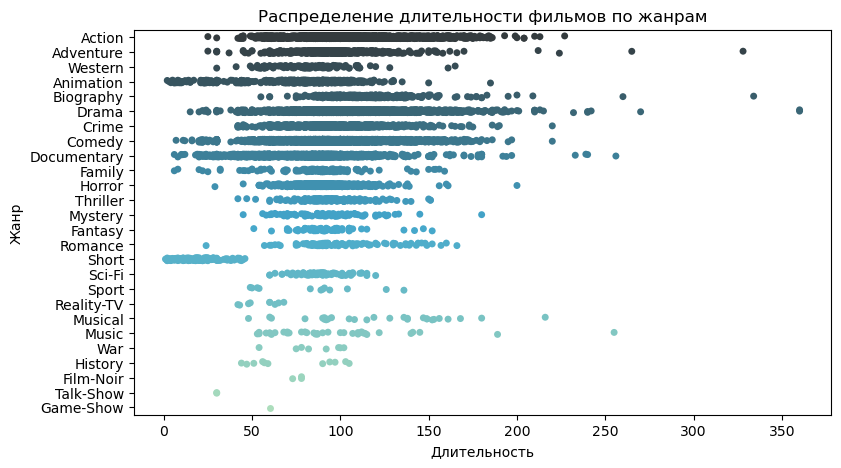

In [111]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d')
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

У `stripplot` есть такой параметр как `jitter`, который может регулировать степень перекрытия точек. Но лучше его не трогат:) Например:

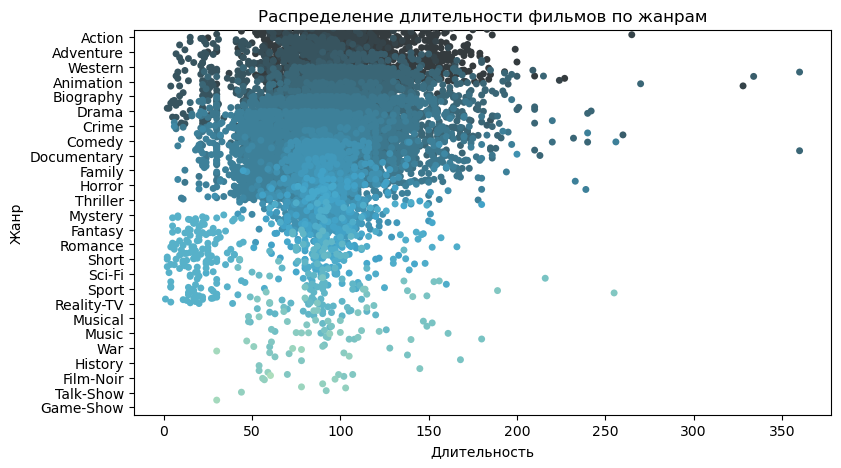

In [112]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d',jitter=3)
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

Иногда можно использовать такие графики в не совсем явных целях. Например нам интересно оценить когда стали появляться те или иные жанры фильмов:

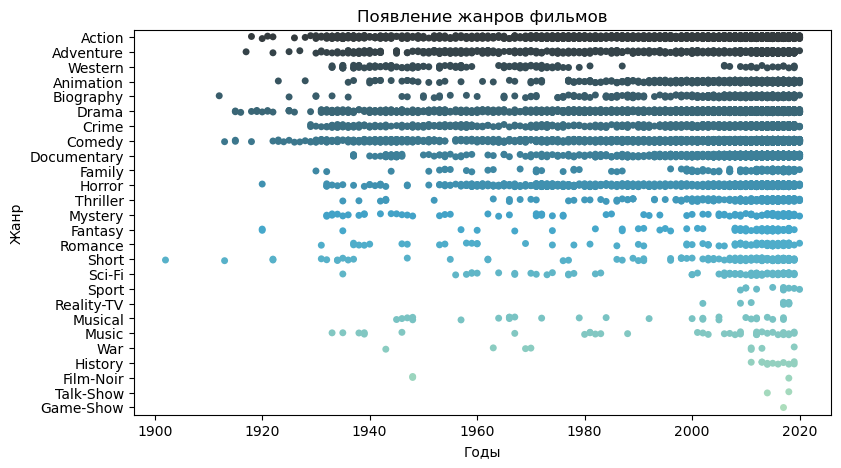

In [113]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_movies,y='first genre',x='year',palette='GnBu_d')
plt.title('Появление жанров фильмов')
plt.xlabel('Годы')
plt.ylabel('Жанр')
plt.show()

Как видим, некоторые жанры фильмов совсем "мододые")

Также мы можем разбить наши данные по категориальному признаку. Параметр `hue` снова в деле)

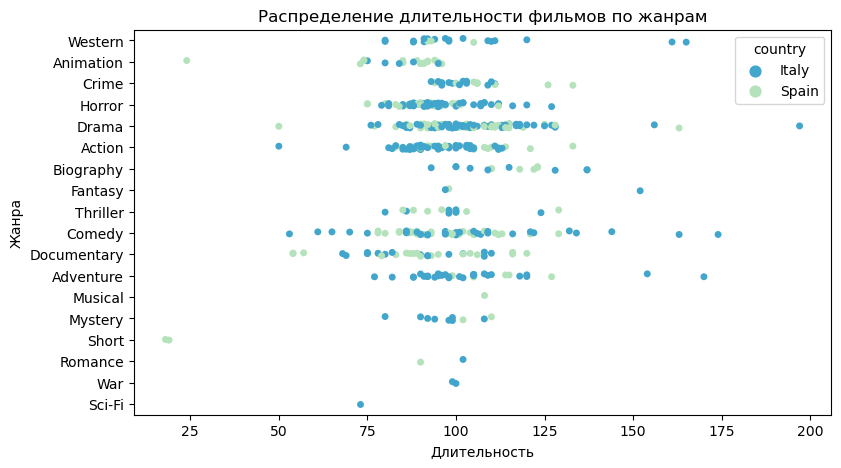

In [114]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_italy_spain,y='first genre',x='runtime',palette='GnBu_r',hue='country')
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанра')
plt.show()

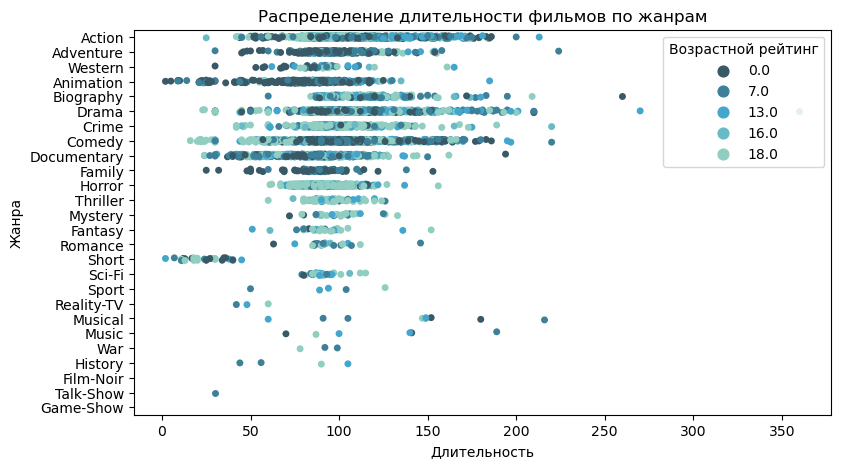

In [115]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d',hue='age+')
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанра')
plt.legend(title='Возрастной рейтинг',loc='upper right')
plt.show()

Есть еще один параметр, который называется `dodge`, он позволяет отделить на графике категориальные признаки друг от друга (если используем `hue`):

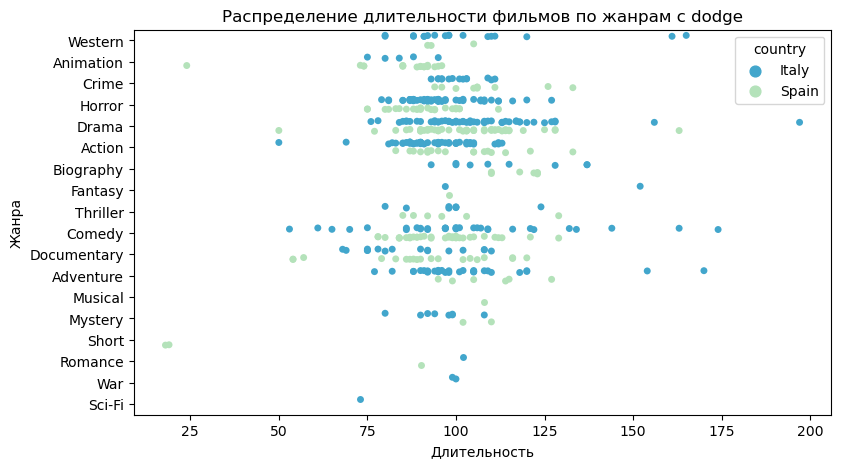

In [116]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_italy_spain,y='first genre',x='runtime',palette='GnBu_r',hue='country',dodge=True)
plt.title('Распределение длительности фильмов по жанрам c dodge')
plt.xlabel('Длительность')
plt.ylabel('Жанра')
plt.show()

К слову сказать `striplot` интересен тем, что его хорошо накладывать на другие графики. Например сделаем так:

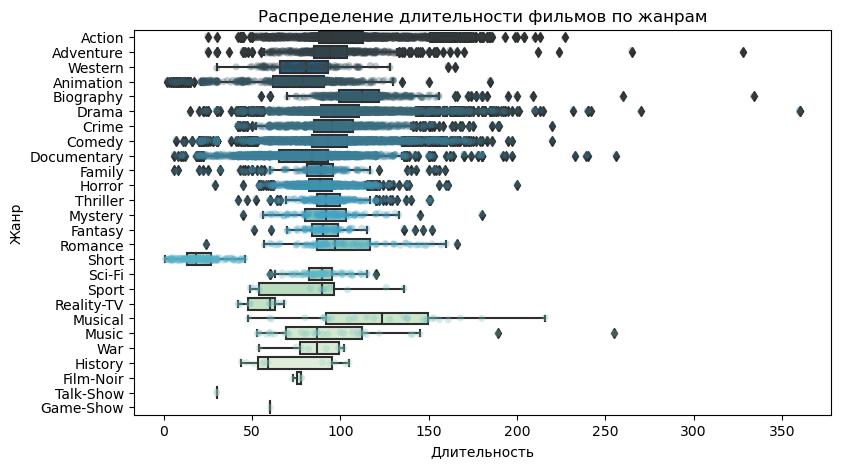

In [117]:
plt.figure(figsize=(9,5))
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d',alpha=0.3)
sns.boxplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_r')
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

Или так:

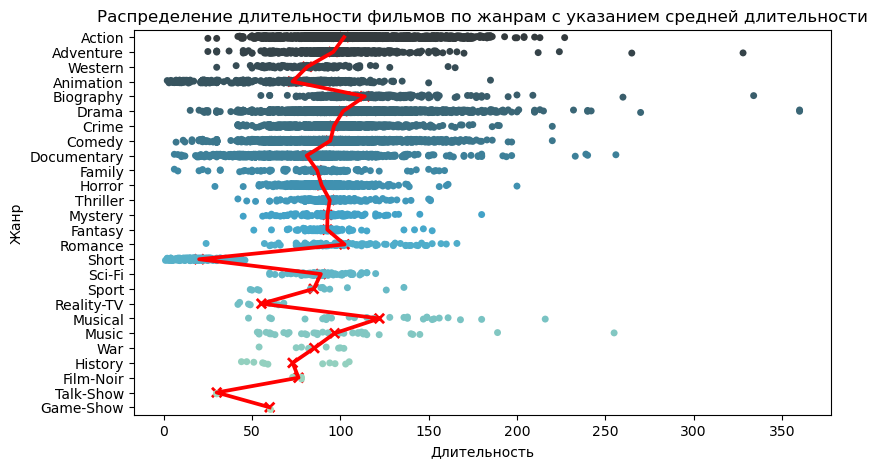

In [118]:
plt.figure(figsize=(9,5))
sns.pointplot(data=data_movies,y='first genre',x='runtime',color='red',join=True, markers="x", scale=1,ci=None)
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d',zorder=1)
plt.title('Распределение длительности фильмов по жанрам c указанием средней длительности')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

Тут у нас неожиданно появляется еще один тип графика, который называется `poitplot`. На мой взгляд это график несет больше вспомогательный характер, который показывает меры центральной тенденции для исследуемого признака, а также рассчитывает доверительные интервалы. Какие параметры у данного типа графика нас могут интересовать:
* `estimator` - мера центральной тенденции
* `join` - соединить ли точки или нет
* `ci`- значение доверительного интервала
* `markers`- тип точки
* `linestyle`- тип линии 


Допустим теперь мы хотим указать медианные значения длительностей фильмов по жанрам:

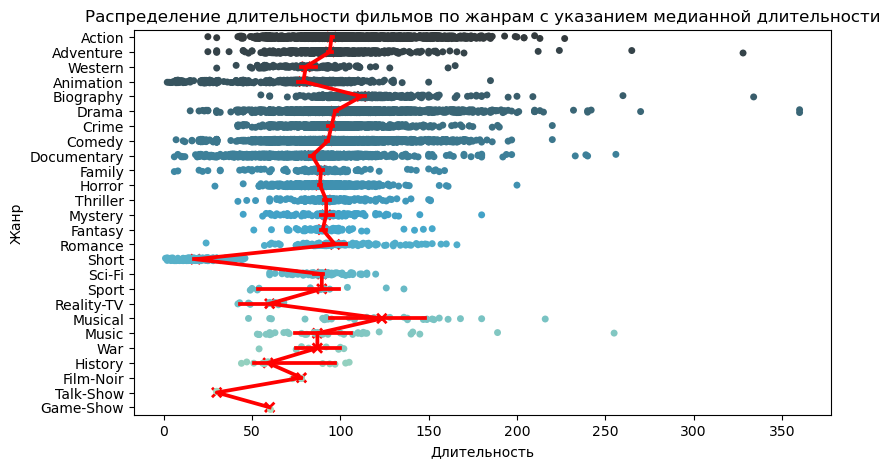

In [119]:
plt.figure(figsize=(9,5))
sns.pointplot(data=data_movies,y='first genre',x='runtime',color='red',join=True, markers="x", estimator=np.median)
sns.stripplot(data=data_movies,y='first genre',x='runtime',palette='GnBu_d',zorder=1)
plt.title('Распределение длительности фильмов по жанрам c указанием медианной длительности')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

Следующий тип графика называется `swarmplot`- он делает ровно тоже самое, что и `striplot`, но точки значений не накладываются друг на друга. Рассмотрим пример:

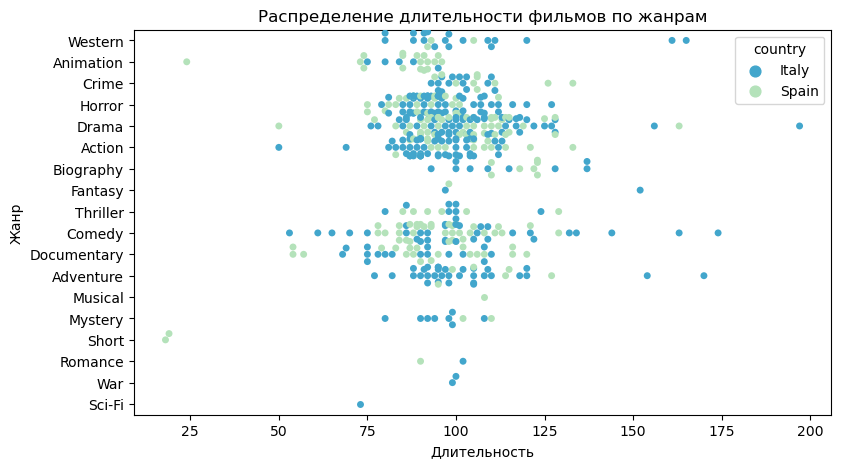

In [120]:
plt.figure(figsize=(9,5))
sns.swarmplot(data=data_italy_spain,y='first genre',x='runtime',palette='GnBu_r',hue='country')
plt.title('Распределение длительности фильмов по жанрам')
plt.xlabel('Длительность')
plt.ylabel('Жанр')
plt.show()

Как видим, каждая точка отделена от другой, ничего друг друга не перекрывает)

В остальном оба типа графика почти идентичны и какой из них использовать - дело вашего вкуса) 

#### Полезные ссылки:
* [Официальная документация по strpplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplothttps://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)
* [Официальная документация по swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)
* [Официальная документация по pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)

### <a name='j'>Сложные и множественные графики (pairplots, jointplots)</a>

Пришло время посмотреть на уникальные графики `seaborn`. Как правило такие графики позволяют строить несколько графиков на одном графике. Да знаю запутанно и тавтология) Но дальше станет понятнее)

Мы начнем с `jointplot` такой график позволяет отобразить зависимость между двумя величинами, а также одновременно построить их распределения ( и не только:))Вызывается функцией `jointplot()`

<Figure size 900x500 with 0 Axes>

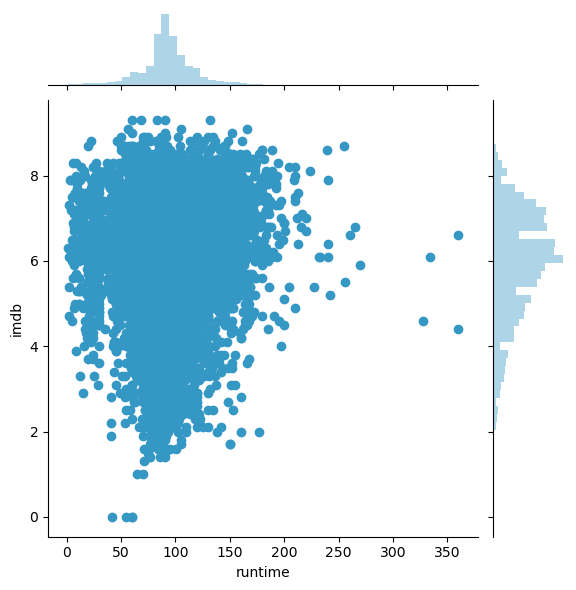

In [121]:
plt.figure(figsize=(9,5))
sns.jointplot(data=data_movies,x='runtime',y='imdb',color=pal[1])
plt.show()

Посмотрите на этот уникальный график, мало того, что я построил диаграмму рассеяния между длительностью фильма и рейтингом imdb, так еще для каждого из этих признаков были построены гистограммы. Очень удобно)

Но это еще не все) Можно поменять тип диаграммы рассеяния, За это отвечает параметр `kind`

<Figure size 900x500 with 0 Axes>

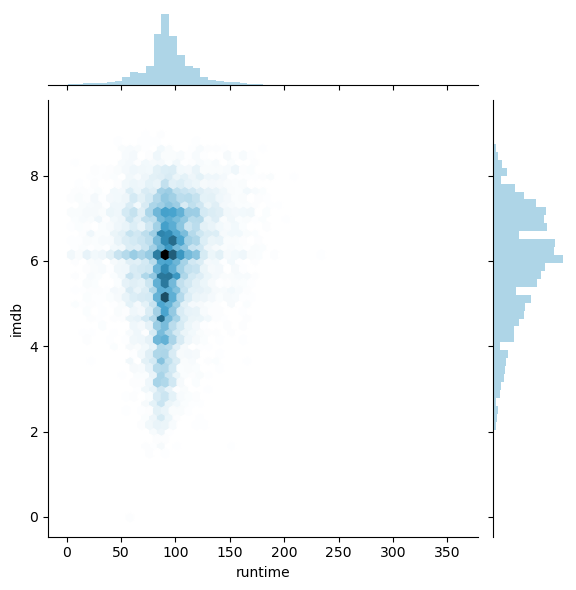

In [122]:
plt.figure(figsize=(9,5))
sns.jointplot(data=data_movies,x='runtime',y='imdb',kind='hex',color=pal[1])
plt.show()

Как видите, в таком формате удобно смотреть каких значений больше всего.

Можно построить совместное распределение плотностей вероятности:

<Figure size 900x500 with 0 Axes>

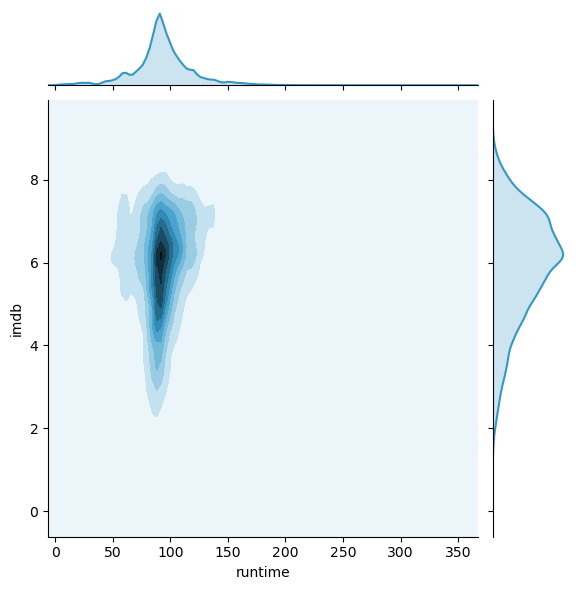

In [123]:
plt.figure(figsize=(9,5))
sns.jointplot(data=data_movies,x='runtime',y='imdb',kind='kde',color=pal[1])
plt.show()

Следующий тип графика называется `pairplot`. Он похож на `jointplot`, но строит отношение между всеми парами переменных. Вызывается функцией `pairplot()`

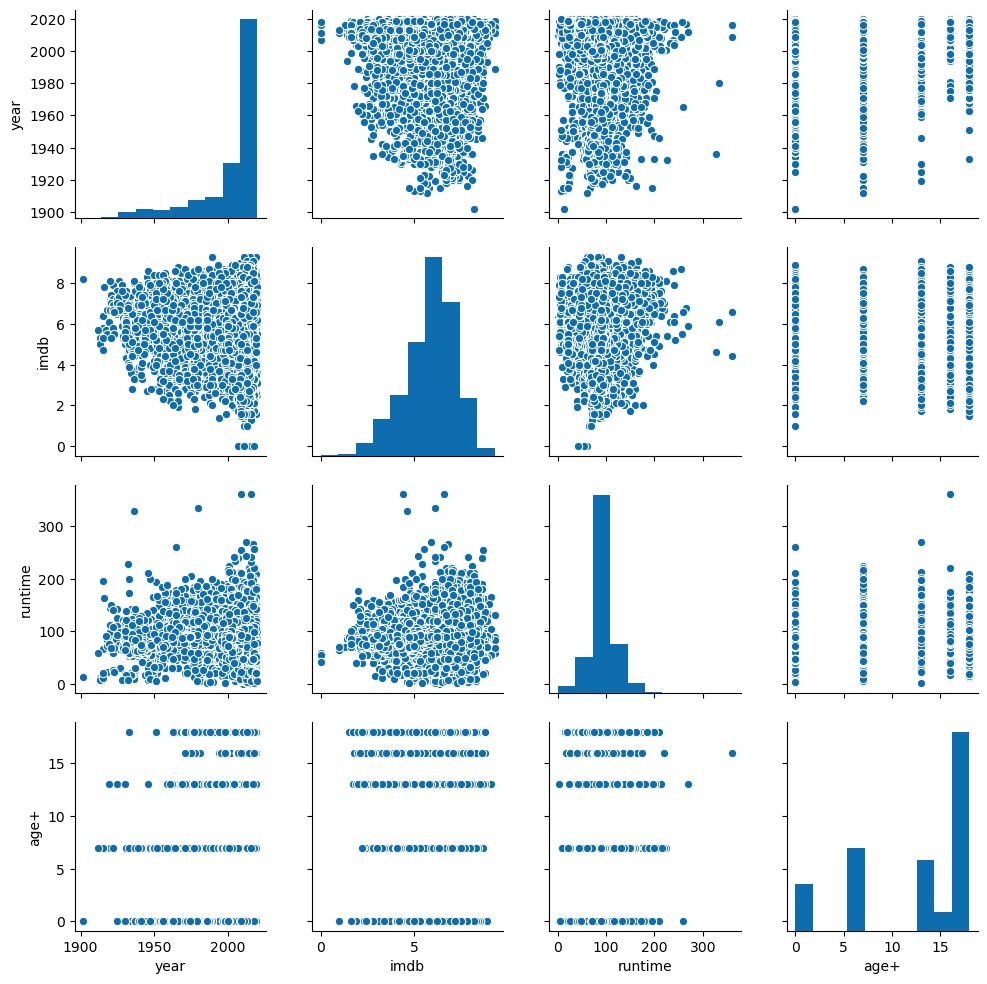

In [124]:
sns.pairplot(data_movies[['year','imdb','runtime','age+']])

Как видите, у нас получился вот такой большой график где попарно отображены зависимости между всеми признаками.

Мы можем указать как тип зависимости между величинами нам интересует. Для этого используется параметр `kind`. По умолчанию установлен `scatter`

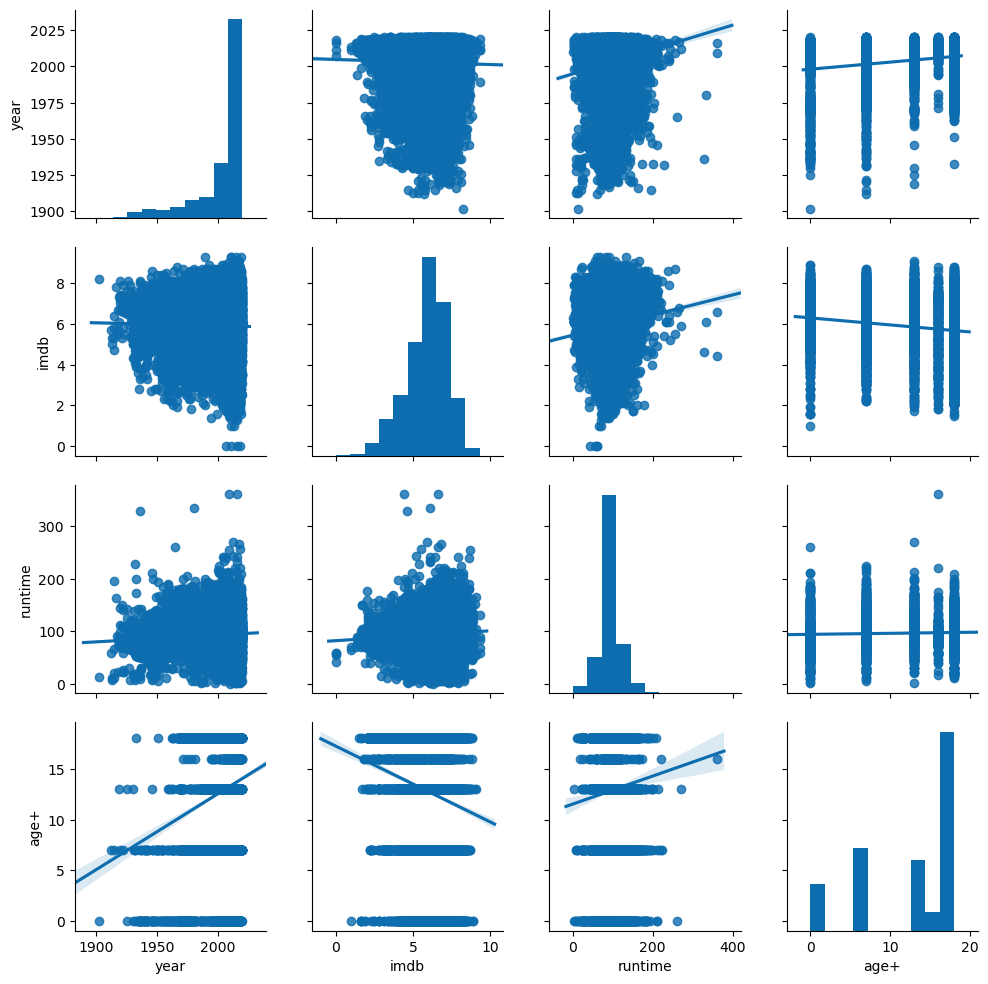

In [125]:
sns.pairplot(data_movies[['year','imdb','runtime','age+']],kind='reg')

Так же мы можем указать, какой график будет строится по диагонали. За это отвечает параметр `diag_kind`

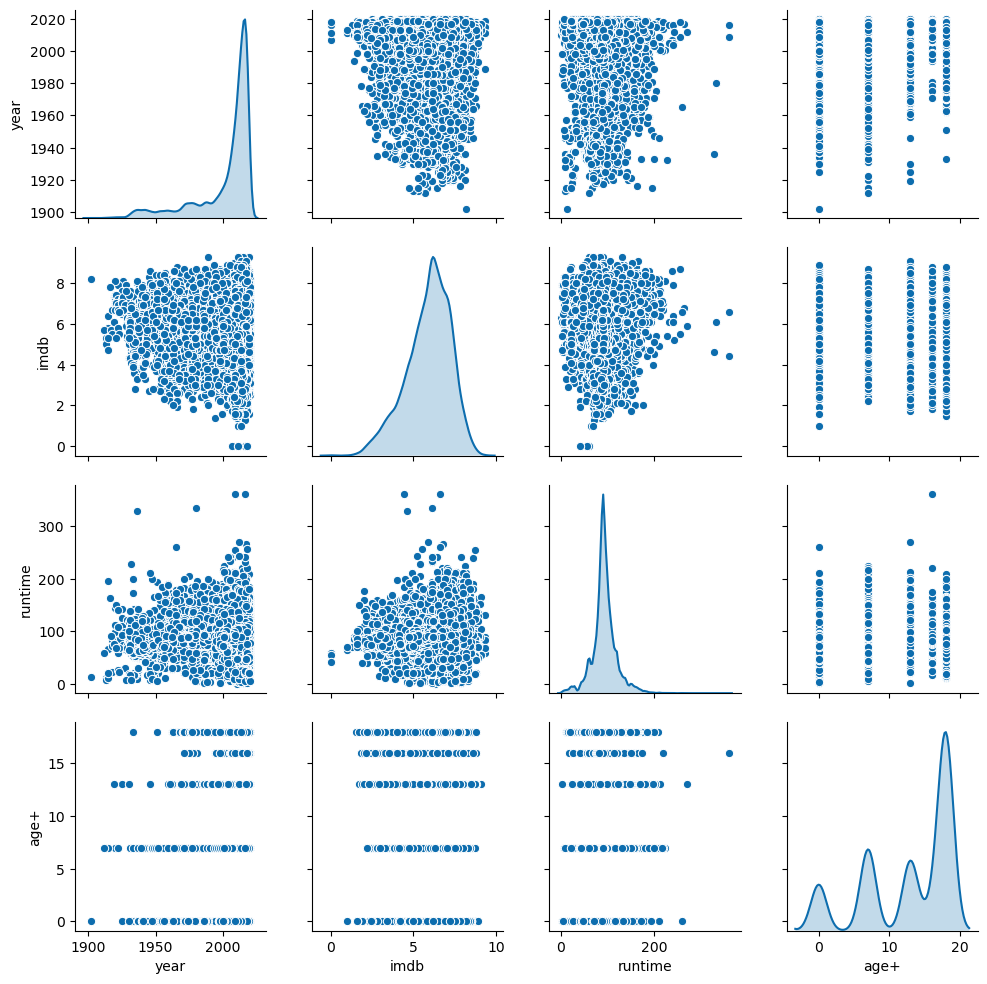

In [126]:
sns.pairplot(data_movies[['year','imdb','runtime','age+']],diag_kind='kde')

Ну и опять же никто нам не мешает строить график разбитый по категориям. Параметр `hue` твоя очередь)

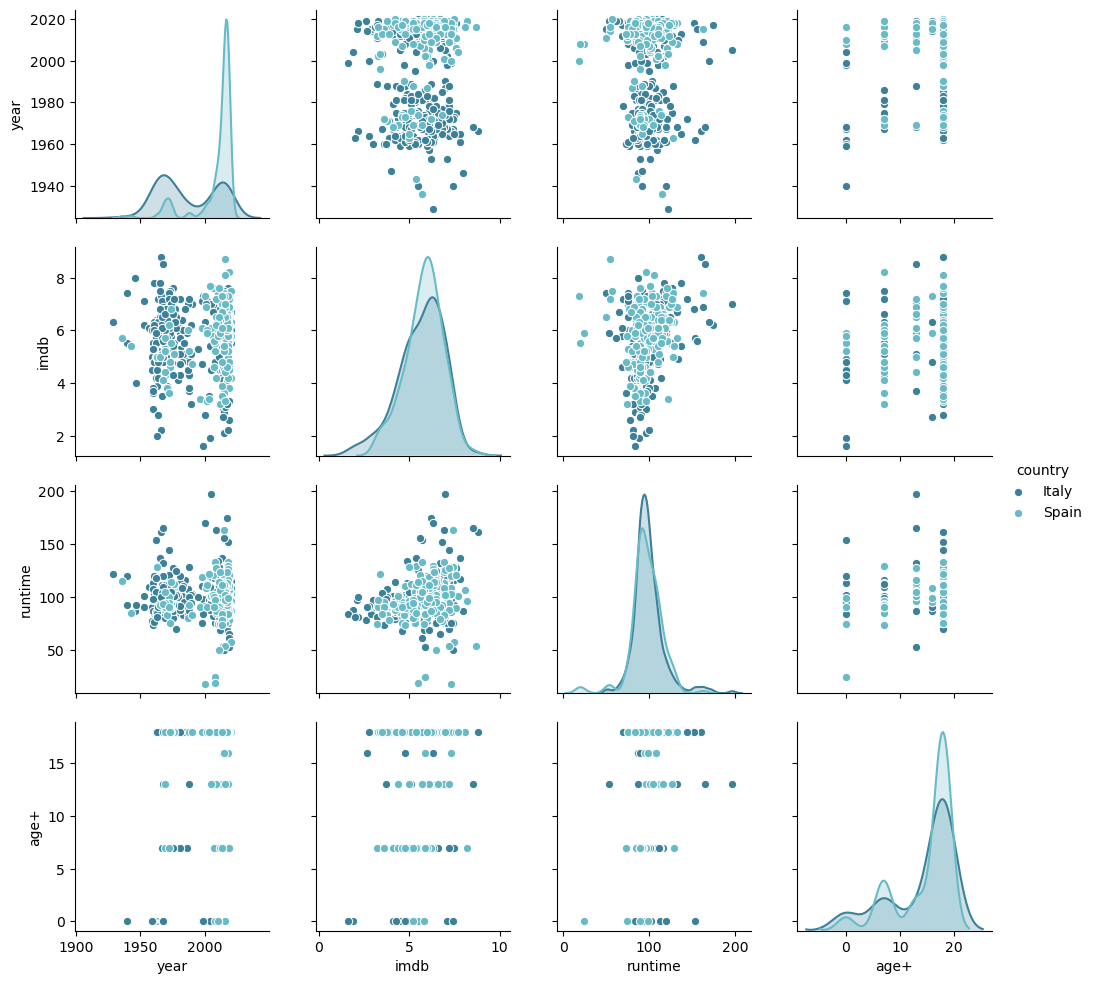

In [127]:
sns.pairplot(data_italy_spain[['year','imdb','runtime','age+','country']],hue='country',palette='GnBu_d')

Пока закончим с подобными графиками, но мы еще вернемся к ним, когда будем изучать множественные и составные графики.

#### Полезные ссылки:
* [Официальная документация по jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)
* [Официальная документация по pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)


### <a name='k'>Тепловые карты</a>

Настало время тепловых карт) Очень удобный и наглядный инструмент для визуализации данных. В `seaborn` тепловая карта строится функцией `heatmap()`. Но для начала, чтобы построить более наглядную тепловую карту, поработаем с нашим датасетом. Для этого определим топ-5 жанров и посмотрим сколько фильмов из этих жанров выходило за 2015-2019 гг. 

In [128]:
top_5_genres = list(data_movies['first genre'].value_counts().head().index)

In [129]:
data_genres_top = data_movies[(data_movies['first genre'].isin(top_5_genres)) & ((data_movies['year']>=2015) & (data_movies['year']<=2019))]

In [130]:
data_genres_top = data_genres_top.pivot_table(index='first genre',columns='year',values='id',aggfunc='count') 

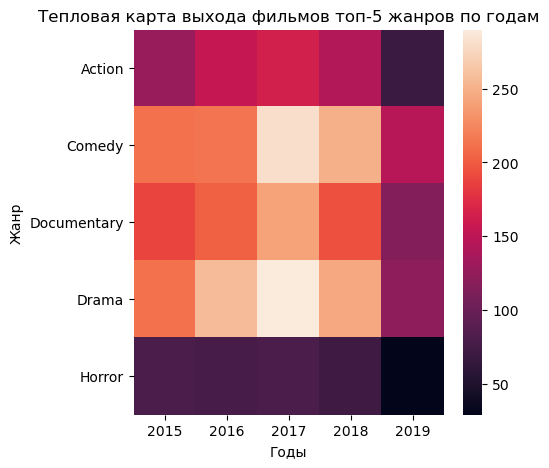

In [131]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top)
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Мы получили тепловую карту. Можем изменить палитру. За это отвечает параметр `cmap`

<div style= "background-color: #fc8381;padding: 20px">Важно! Если у вас установлена версия библиотеки matplotlib 1.3.11, то при построении тепловых карт, ваш график будет некорректно отображаться. Будет уплывать текст и т.д. Чтобы это исправить, необходимо откатиться назад к версии 1.3.10 либо поставить более свежую версию</div>

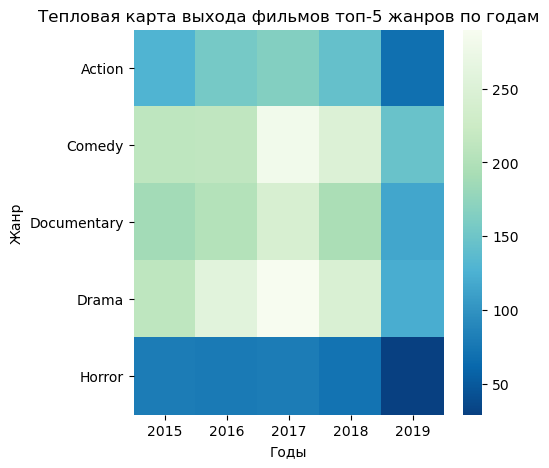

In [132]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r')
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Можно добавить подписи значений в каждой ячейке, за это отвечает параметр `annot`

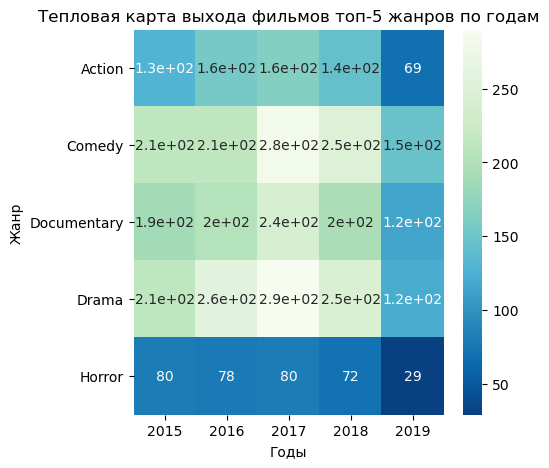

In [133]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',annot=True)
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Чтобы привести данные к более читаемому формату, воспользуемся параметром `fmt`

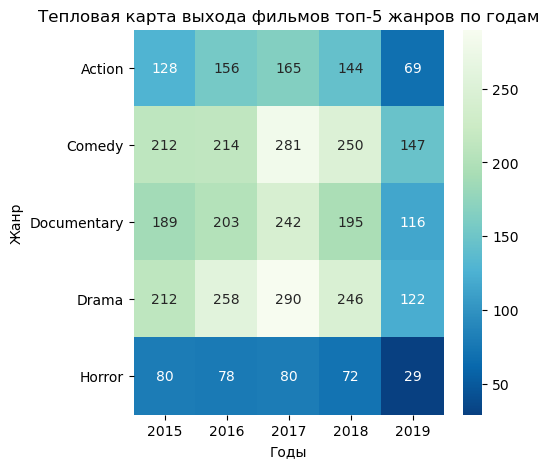

In [134]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',annot=True,fmt="d")
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Мы можем сдвинуть центр тепловой карты, указав позицию откуда она будет окрашиваться. За это отвечает параметр `center`

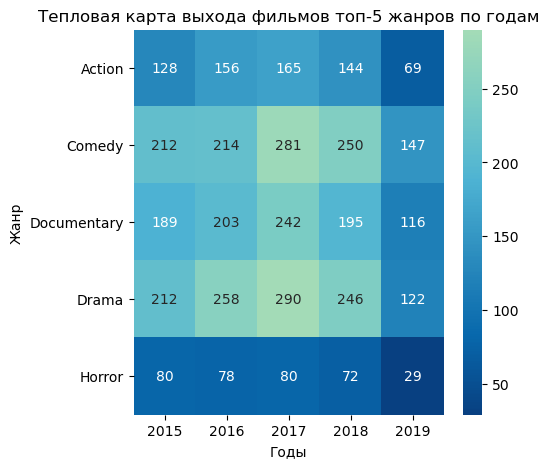

In [135]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',center=data_genres_top.loc['Documentary',2017],annot=True,fmt="d")
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Можем отключить легенду справа. За это отвечает параметр `cbar`

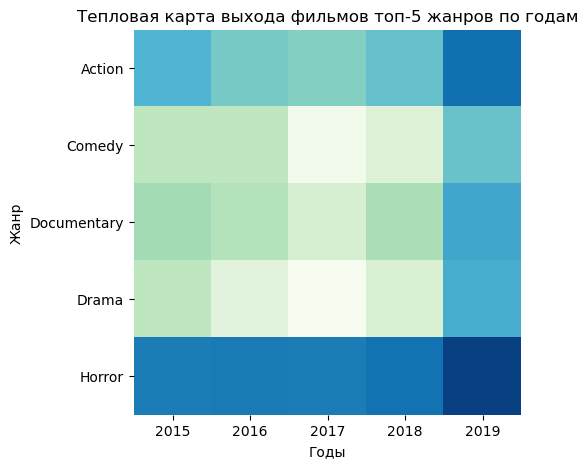

In [136]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',cbar=False)
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Можем ограничить значения тепловой карты сверху и снизу. Тем самым выделив цветом только интересующие нас значения. За это отвечают параметры `vmin,vmax`. Например на тепловой карте мы хотим выделить только те жанры, в которых выпускается более 150 фильмов в год.

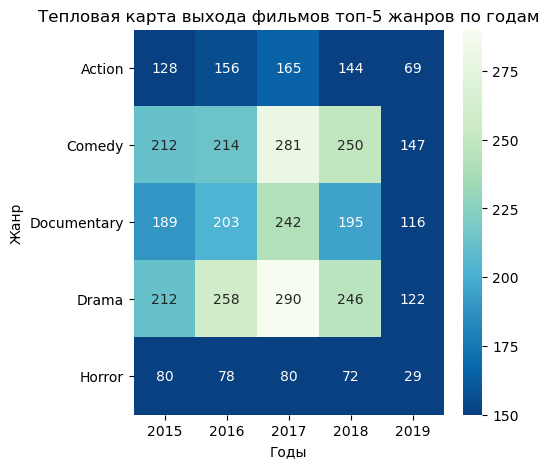

In [137]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',vmin=150,annot=True,fmt="d")
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Можем поменять ширину и цвет линий. Параметры `linewidths` и `linecolor` соответственно:

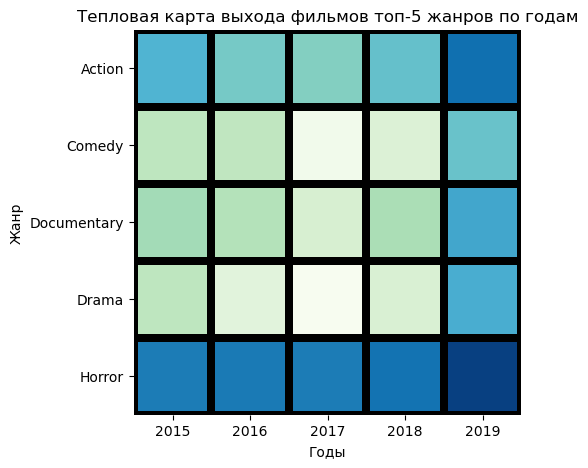

In [138]:
plt.figure(figsize=(5,5))
sns.heatmap(data_genres_top,cmap='GnBu_r',cbar=False,linewidths=5,linecolor='black')
plt.title("Тепловая карта выхода фильмов топ-5 жанров по годам")
plt.xlabel("Годы")
plt.ylabel("Жанр")
plt.show()

Закончим с тепловыми картами и перейдем к заключительному разделу

#### Полезные ссылки:
* [Официальная документация по heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции](https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii)


### <a name='l'>JointGrid и PairGrid</a>

Теперь настало время строить свои пользовательские графики используя различные конструкции. Помните мы использовали такие графики как `jointplot` и `pairplot`. На самом деле это один из видов графиков `jointgrid` и `pairgrid` эти конструкции предлагают каркас в который вы можете поместить нужные вам графики

<img src=https://seaborn.pydata.org/_images/JointGrid_9_0.png>
<img src=https://i.stack.imgur.com/xqNE9.png>

Посмотрите! При инициализации метода `JointGrid` или `PairGrid` у вас создается каркас с пустыми полями, куда вы можете вставить свои собственнные графики. Рассмотрим на примере. Для начала поработаем с конструкцией `JointGrid`. Несколько примеров ниже:

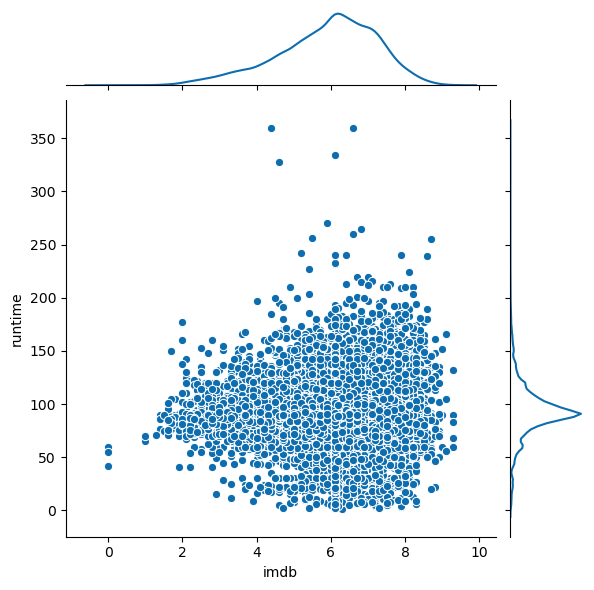

In [139]:
g = sns.JointGrid(data=data_movies, x='imdb',y='runtime')
g.plot(sns.scatterplot,sns.kdeplot)

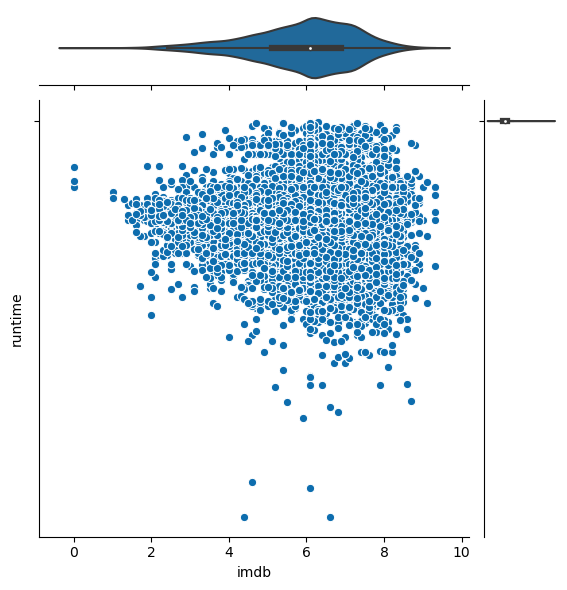

In [140]:
g = sns.JointGrid(data=data_movies, x='imdb',y='runtime')
g.plot(sns.scatterplot,sns.violinplot)

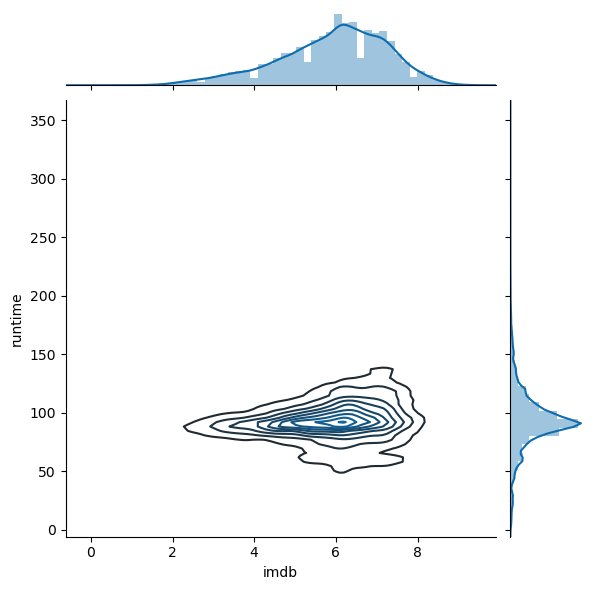

In [141]:
g = sns.JointGrid(data=data_movies, x='imdb',y='runtime')
g.plot(sns.kdeplot,sns.distplot)

Как видите в начале я создал конструкцию `JointGrid`, передал ей необходимые параметры, а потом вызвал метод `plot` где указал какие графики я хочу построить

Можно пойти другим путем и применить функции `plot_joint`, которая отвечает за построение графика в центре и функцию `plot_marginals`, которая отвечает за построение графиков вверху и сбоку. В таком случае мы можем еще передать параметры (цвет,маркеры и тд.) в строящиеся графики.

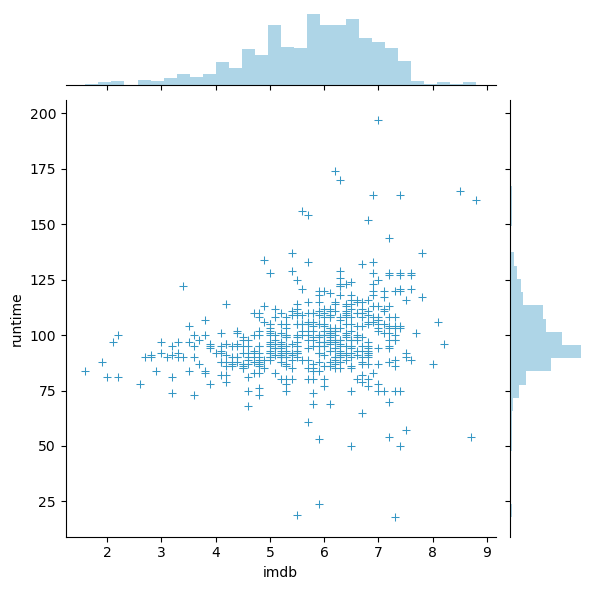

In [142]:
g = sns.JointGrid(data=data_italy_spain, x='imdb',y='runtime')
g.plot_joint(sns.scatterplot, color=pal[1],marker='+')
g.plot_marginals(sns.distplot, kde=False, color=pal[1],bins=30)

Теперь поговорим о `PairGrid`, по сути настраивается он примерно одинаково. Но здесь мы можем решить, что будем строить по диагонали, что в верхнем треугольнике, а что в нижнем.

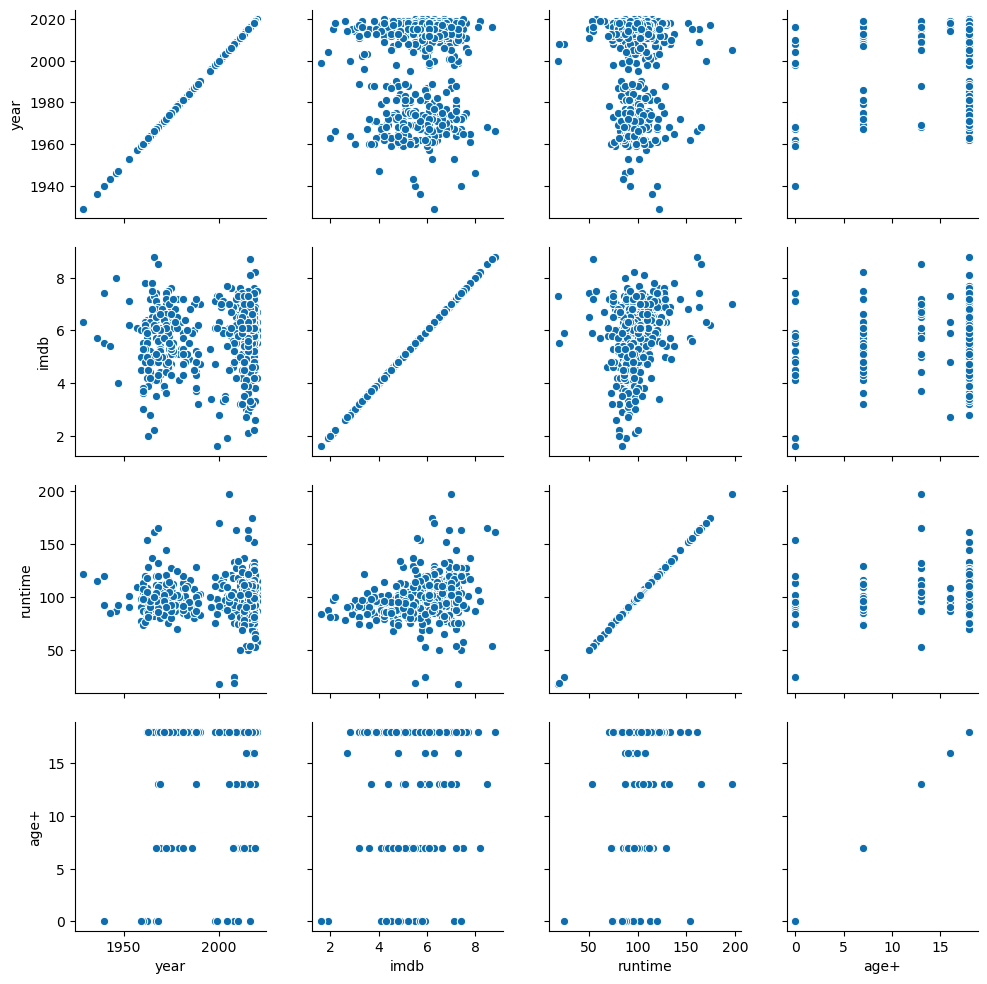

In [143]:
g = sns.PairGrid(data_italy_spain[['year','imdb','runtime','age+','country']],palette='GnBu_r')
g.map(sns.scatterplot)

Выше, вначале я создал свой каркас `PairGrid`,куда передал датасет, а потом вызвал фунцию `map`, куда передал параметр какой график должен быть в каждой ячейке. В данном случае у меня везде построились диаграммы рассеяния.

Как я уже говорил, можно более тонко настроить нашу конструкцию передав ей указания, что строить в какой части каркаса

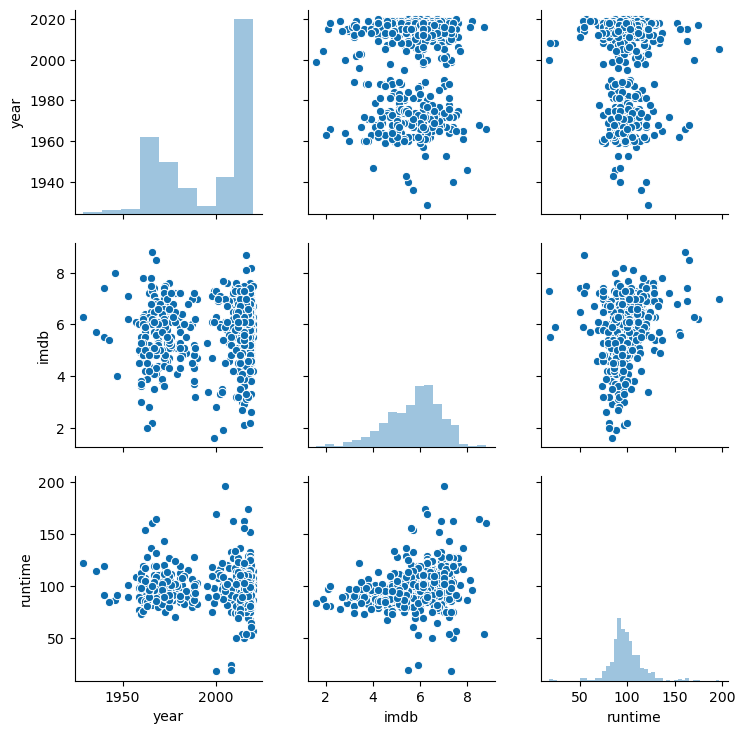

In [144]:
g = sns.PairGrid(data_italy_spain[['year','imdb','runtime']])
g.map_diag(sns.distplot,kde=False)
g.map_offdiag(sns.scatterplot)

`map_diag` отвечает за диагональ. `map_offdiag`отвечает за все вне диагонали. Конено же мы можем разбить наш график по категориям. 

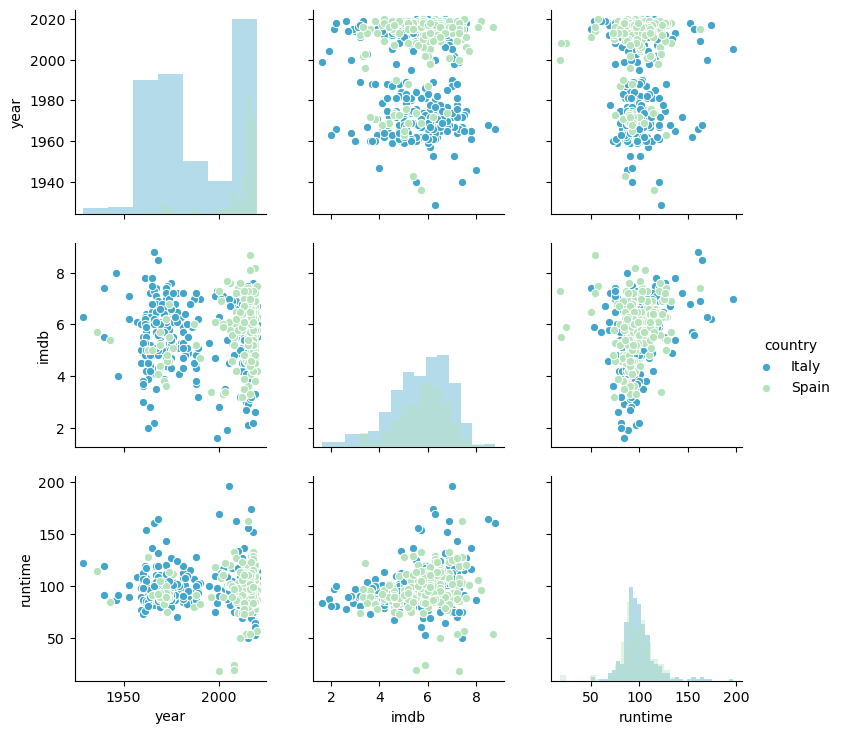

In [145]:
g = sns.PairGrid(data_italy_spain[['year','imdb','runtime','country']],hue='country',palette='GnBu_r')
g.map_diag(sns.distplot,kde=False)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Но это еще не все) Мы можем указать, что будет строиться выше диагонали, а что ниже)

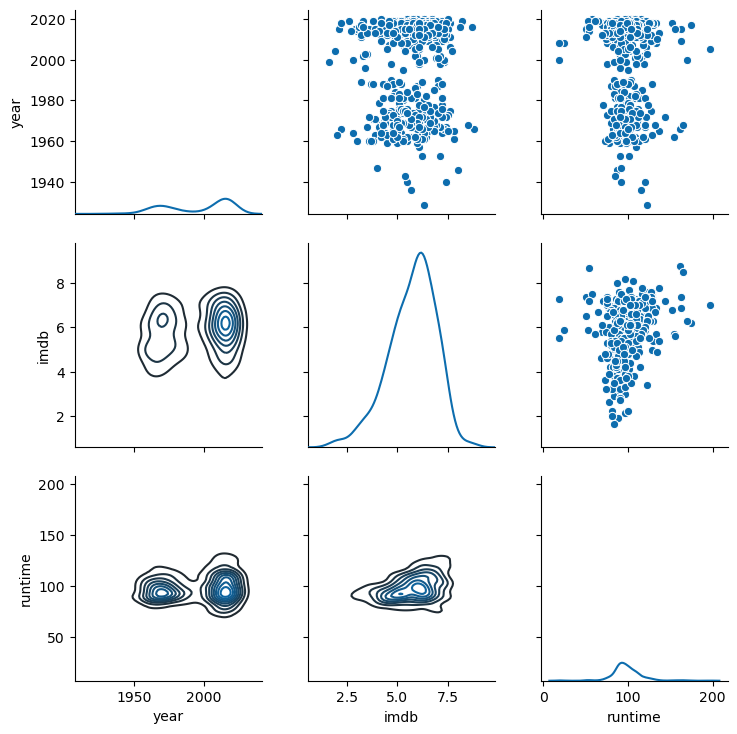

In [146]:
g = sns.PairGrid(data_italy_spain[['year','imdb','runtime','country']])
g.map_diag(sns.distplot,hist=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

Закончим с этими графиками и двигаемся дальше)

#### Полезные ссылки:
- [Официальная документация по PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)
- [Официциальная документация по JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)

### <a name='m'>FacetGrid</a>

Теперь настала очередь `FacetGrid`, с помощью такого графика мы можем строить распределение между отдельными признаками по нескольким категориям. В целом это также каркас, но он уже состоит из строк и столбцов

<img src='http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/_images/seaborn-FacetGrid-1.png'>

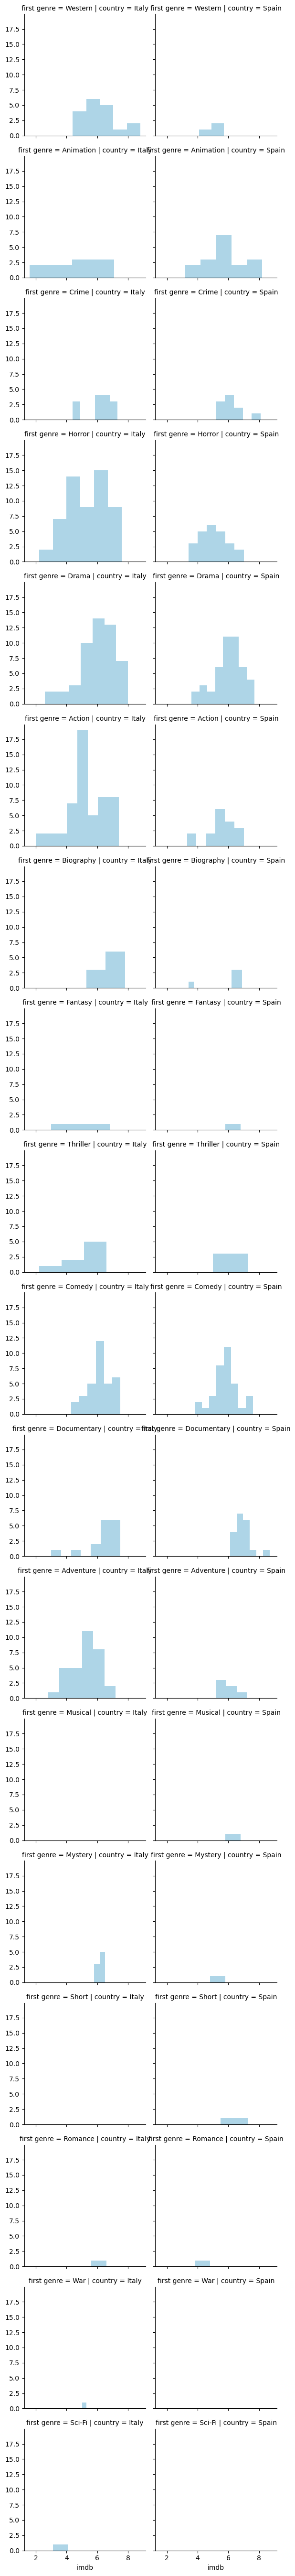

In [147]:
g = sns.FacetGrid(data_italy_spain[['year','imdb','runtime','country','first genre']], col="country", row="first genre")
g = g.map(sns.distplot, "imdb", kde=False, color=pal[1])


Здесь тоже самое, вначале мы создаем каркас, но помимо датасета указываем два параметра: `row` и `col` - это строки и столбцы соответственно. В данном примере в строках у нас стоят жанры, в столбцах две страны из датасета. Далее вызываем функцию `map` в параметрах которой указываем какой график будет строить. Тем самым у нас получилась вот такая большая конструкция, где мы для каждой стран и каждого жанра смогли построить гистограмму рейтингов фильмов. 

Или мы хотим оценить динамику выпуска фильмов в топ-5 жанрах за последние 5 лет. Оставим здесь только строки:

In [148]:
data_genres_top = data_movies[(data_movies['first genre'].isin(top_5_genres)) & ((data_movies['year']>=2015) & (data_movies['year']<=2019))]

In [149]:
data_genres_top = data_genres_top.groupby(['year','first genre'])['id'].count().reset_index()

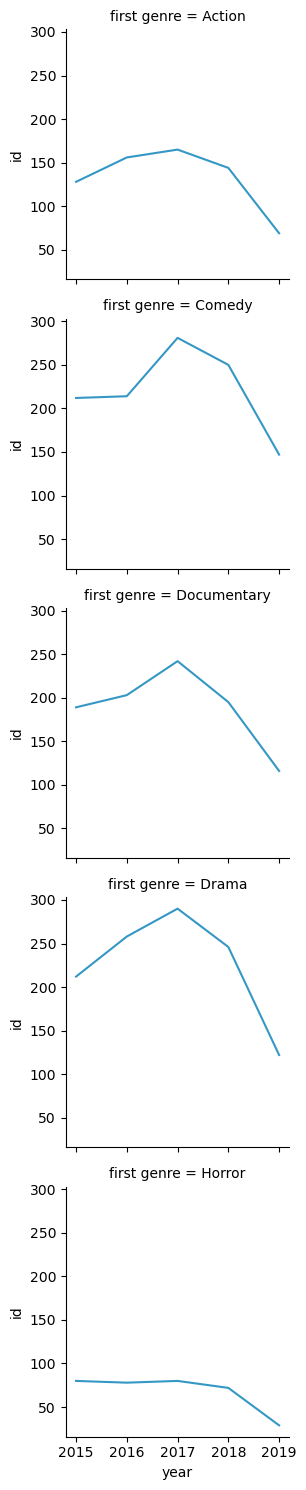

In [150]:
g = sns.FacetGrid(data_genres_top, row='first genre')
g.map(sns.lineplot,'year','id', color=pal[1]).add_legend()



Мы можем оставить только столбцы:

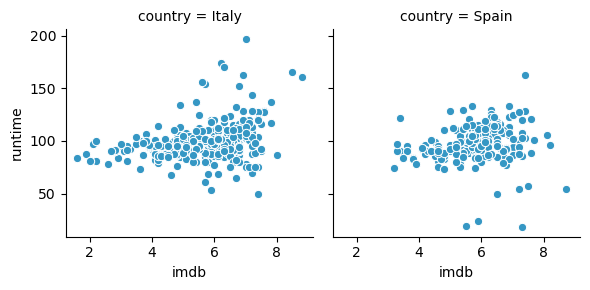

In [151]:
g = sns.FacetGrid(data_italy_spain[['year','imdb','runtime','country','first genre']], col="country")
g = g.map(sns.scatterplot, "imdb",'runtime', color=pal[1])


График в каждой ячейке можем разбить по категорильному признаку:

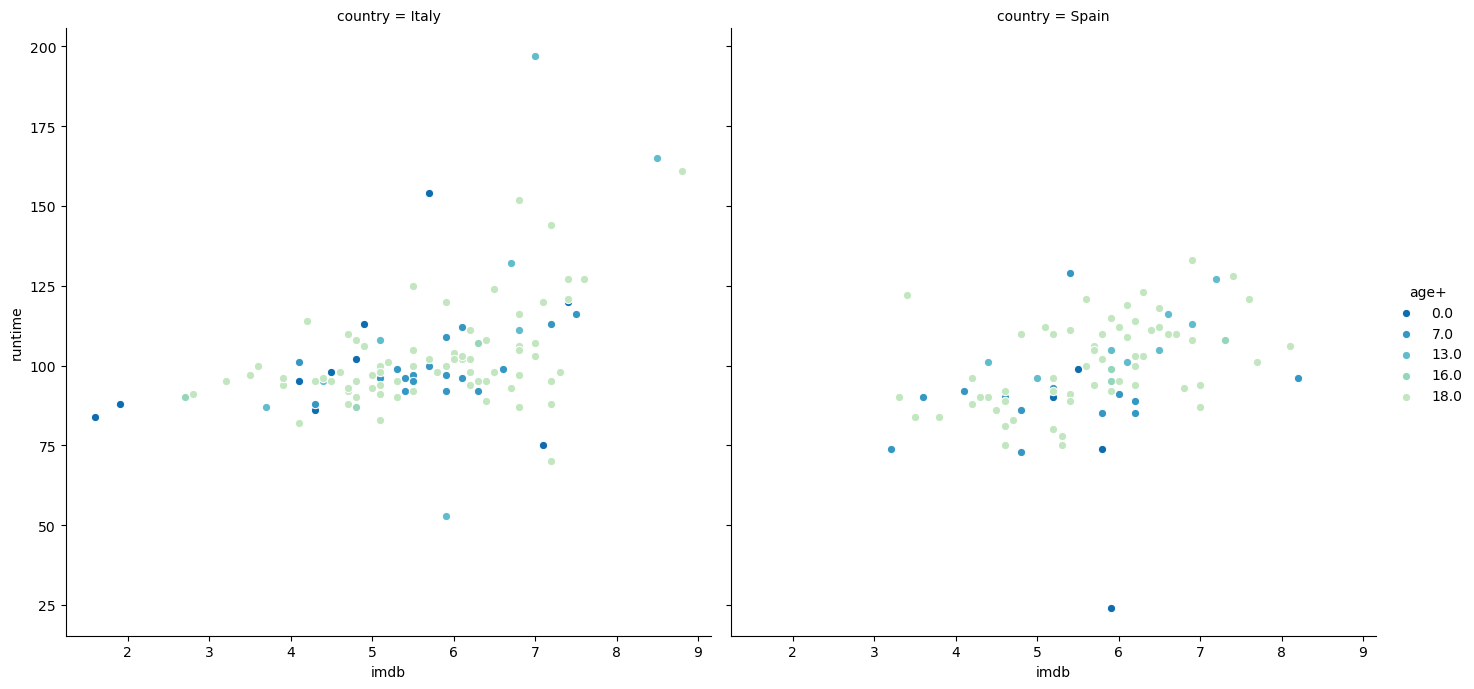

In [152]:
g = sns.FacetGrid(data_italy_spain[['year','imdb','runtime','country','first genre','age+']], col='country',hue='age+',height=7)
g.map(sns.scatterplot, "imdb",'runtime',palette='GnBu_r').add_legend()


Можем управлять размерами графиков, параметр `height`,`aspect`:

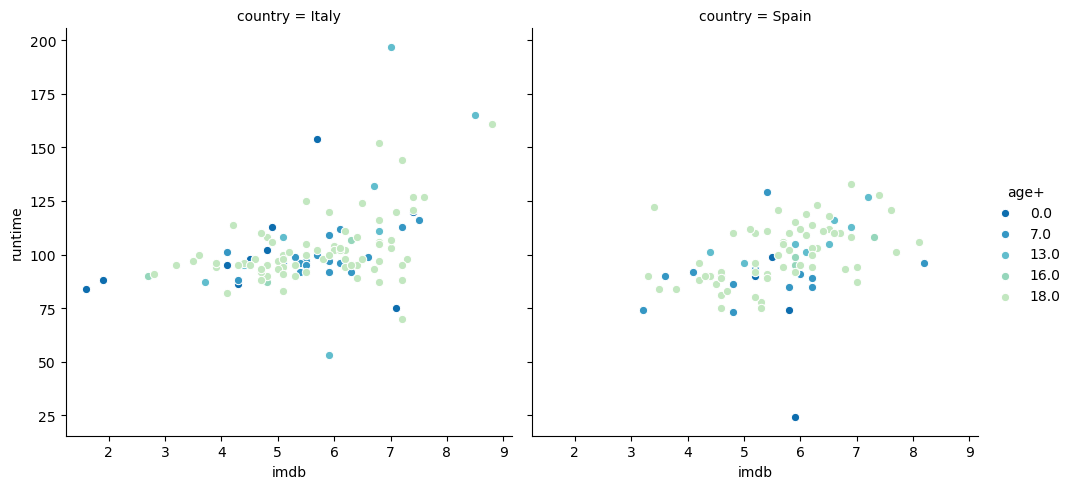

In [153]:
g = (sns.FacetGrid(data_italy_spain[['year','imdb','runtime','country','first genre','age+']], 
                   col='country',hue='age+',height=5)
    )
g.map(sns.scatterplot, "imdb",'runtime',palette='GnBu_r').add_legend()


Базовую часть мы рассмотрели, остальные фишки и более тонкая настройка находится в документации. И наконец мы переходим к последнему типу графика)

#### Полезные ссылки:
- [Официальная документация по FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)
- [Официциальная документация по multiple charts](https://seaborn.pydata.org/tutorial/axis_grids.html)


### <a name='n'>Catplot</a>

Ура! У нас остался последний график, который называется `Catplot`. Этот график основан на `FacetGrid` и позволяет создать конструкцию, в которой мы можем отображать различные категориальные графики. То есть мы сами можем указать, какой график хотим нарисовать в нашем каркасе. Но в отличии от `FacetGrid` набор графиков ограничен)
Вызывается функцией `catplot()`, и здесь есть ключевой параметр `kind`, отвечающий за тип графика.

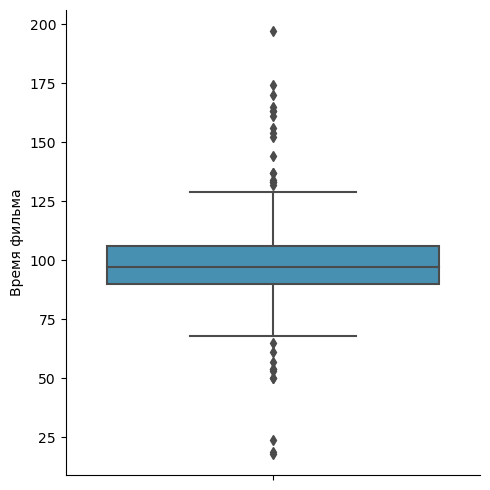

In [154]:
sns.catplot(data=data_italy_spain,y='runtime',kind='box', color=pal[1])
plt.ylabel('Время фильма')
plt.show()

Как видите, здесь я указал в параметре `kind`, что хочу строить боксплот

Можем также разбить по столбцам наш график. Ниже приведены примеры:

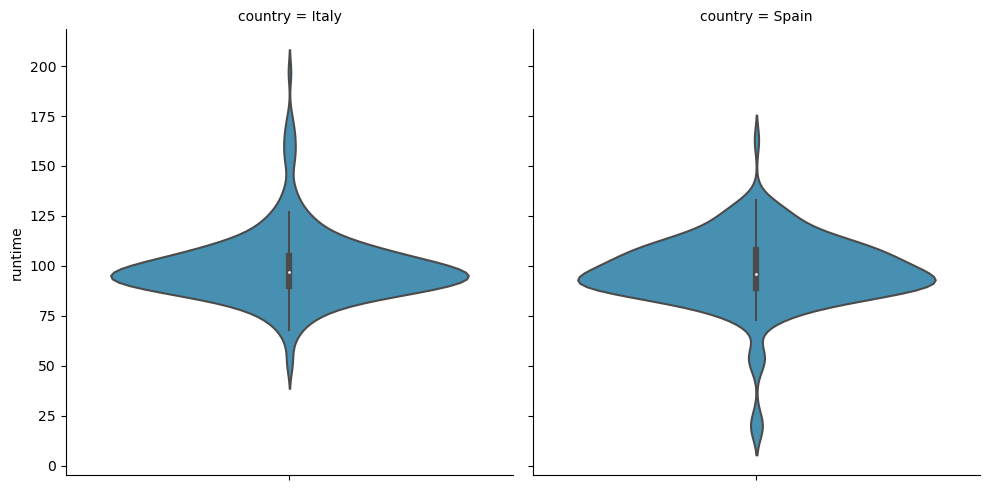

In [155]:
sns.catplot(data=data_italy_spain,y='runtime',kind='violin',col='country', color=pal[1])


А можем выводить строки и столбцы:

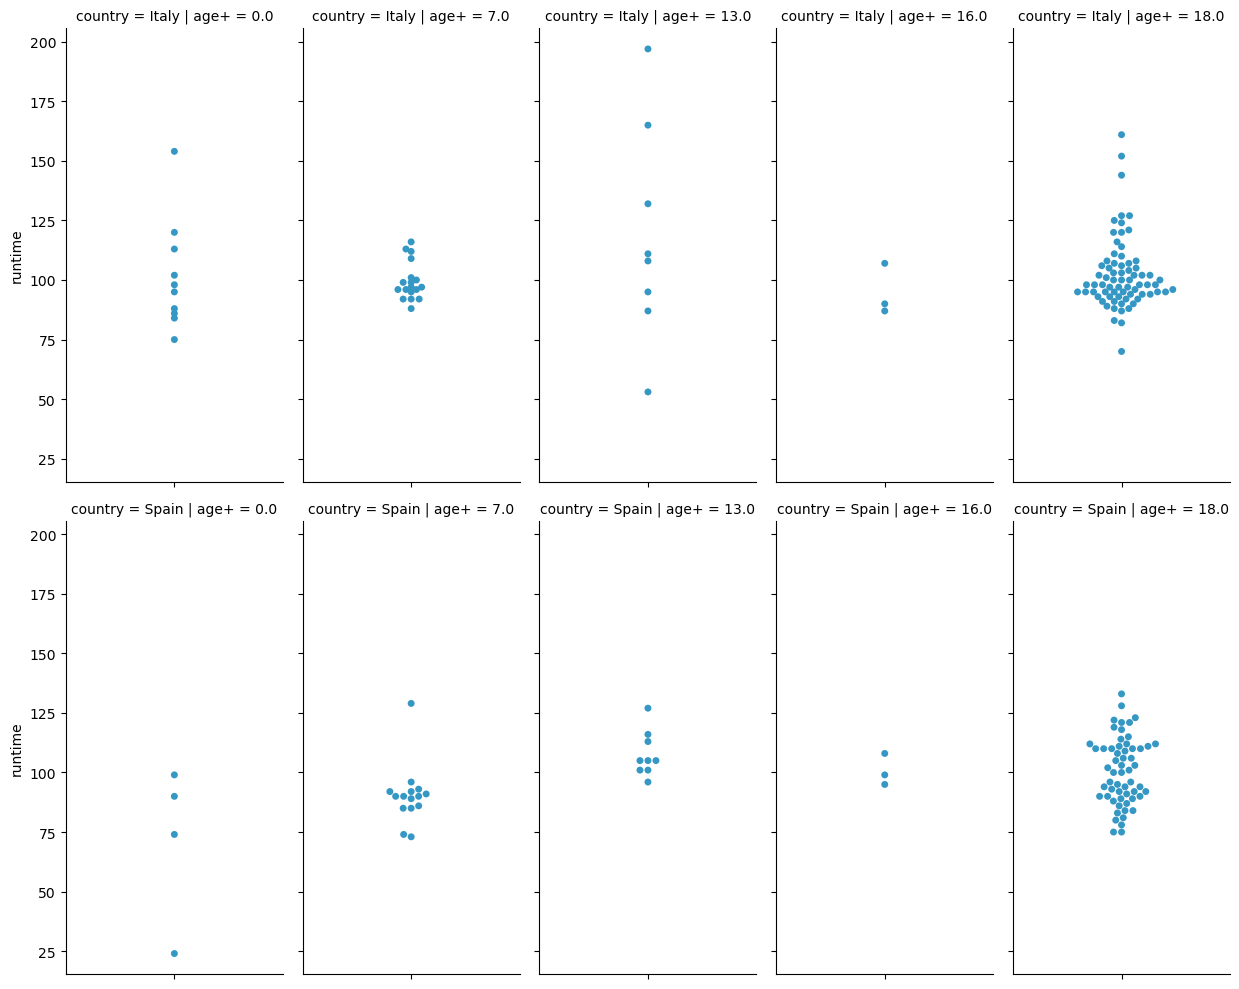

In [156]:
sns.catplot(data=data_italy_spain,y='runtime',kind='swarm',row='country',col='age+',aspect=0.5,color=pal[1])


Ура! Мы закончили. Осталось чуть оценить новую версию библиотеки и все)

#### Полезные ссылки:
- [Официальная документация по Catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)


### <a name='o'>Что нового в seaborn 0.11.0</a>

Как я уже говорил, мы использовали библиотеку 0.9.0, но время не стоит на месте и уже вышла библиотека версии 0.11.0. Функионал в целом не поменялся, но добавились новые графики и некоторые приятные мелочи, которых не было  ранее. Далее мы рассмотрим основные ( на мой взгляд изменения)

<div style= "background-color: #fc8381;padding: 20px">Хочу отметить, что если в вашем окружении есть возможность использовать более свежую библиотеку, то смело устанавливайте но будьте внимательны. Не все версии разных библиотек "дружат" между собой) </div>

И так что интересного в новой версии:
1. Гистограммы теперь умеют работать с пропусками
2. В графиках распределений появился параметр `hue` и теперь нам не нужно строить по несколько графиков.
3. Графики распределений стали уметь работать с параметрами X и Y. То есть раньше я писал `sns.distplot(data_movies['imdb'],color=pal[1])` и только так, сейчас же я могу написать, что будет отложено по X, что по Y( при необходимости) и т.д.
4. Расширилась линейка графиков распределений, теперь можно строить отдельно гистограммы (`histplot`), отдельно эмпирическую функцию распределения (`ecdfplot`), отдельно `rugplot`.
5. Что интересно, теперь появился аналог `catplot` но для графиков распределений числовых величин. Называется этот график `displot`. В его параметрах можно указать, что мы хотим построить гистограмму, плотность распределения и т.д.
6. Меня раздражало в версии 0.9.0, то, что одна и таже палитра в некоторых графиках поддерживалась, а в других нет. Очень странное решение). Но по моим ощущения в 0.11.0 это исправили
7. В `JointGrid`, `PairGrid` появилась возможность использовать больше типов графиков. Например, раньше я не мог в `JointGrid` нарисовать ящики с усами на осях, сейчас можно
8. Очень странно, но в `JointPlot` и `JointGrid` была отключена возможность использовать параметр `hue`. Сейчас это исправили)
9. Добавили больше всяких тонких настроек графиков. Что позволяет вам строить крутые визуализации)
10. Немного изменились функции установки стилевых компонент. Так функция `set()` стала`set_theme()`
11. Добавились новые руководства на сайте.
12. Ну и пофиксили различные баги)
---
<br>Вообще  подробнее об изменениях можно почитать  [здесь](#https://medium.com/@michaelwaskom/announcing-the-release-of-seaborn-0-11-3df0341af042) и [здесь](#https://seaborn.pydata.org/whatsnew.html)

---
<div style= "background-color: #fc8381;padding: 20px">Так же хочу предупредить, что обновив библиотеку до 0.11.0 есть риск, что кое какие графики построенные в 0.9.0 у вас не заработают) особенно это касается всяких Joint и Pair. Ну а в целом, на стандартных графиках совместимость версий полная. </div>



### <a name='p'>Заключение</a>

Я надеюсь, что данный туториал поможет вам быстро и безболезненно строить графики. Надеюсь, что библиотека seaborn займет место в вашем арсенале инструментов анализа и визуализации данных. Конечно же мы рассмотрели только самое основное. Возможности библиотеки очень большие, а уж о возможностях matplotlib и говорить не приходится. Если хотите настроить совсем тонко свой график, добавить больше функционала, то тут не обойтись без детального изучения matplotlib. Но как показывает практика, основного функционала seaborn, который был рассмотрен выше, хватает с лихвой)
В дальнейшем руководство будет обновляться по мере выхода новых версий, возникновения задач и т.д.
Всем успехов в визуализации! 
